# **CODIGO COMPLETO TFM**
---
- **Diseño e implementación de modelos de Inteligencia Artificial para la identificación temprana de pacientes con riesgo de sufrir ataques cardíacos**
---
- **Elaborado por Jon Maestre Escobar**
- **Máster Universitario en Inteligencia Artificial**
- **Universidad Alfonso X El Sabio**

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

heartAttackPrediction_India = pd.read_csv('../Codigo/heart_attack_prediction_india.csv')
heartAttackPrediction_India.fillna(0, inplace=True)
heartAttackPrediction_India.head()

Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access  \
0                       1               0             4                  0   
1                       0               0             7                  0   
2                       0               1            10                  1   
3                       0               0             1                  1   
4                       0               0             9                  0   

   Heart_Attack_History  Emergency_Response_Time  Annual_Income  \
0                     0                      157         611025   
1                     0                      331         174527   
2                     0                      186        1760112   
3                     1                      324        1398213   
4                     0                      209          97987   

   Health_Insurance  Heart_Attack_Risk  
0                 0                  0  
1                 0                  0  
2                 1                  0  
3                 0                  0  
4                 0                  1  

[5 rows x 26 columns]

In [4]:
# Tamaño del dataset
print(f"Número de filas: {heartAttackPrediction_India.shape[0]}")
print(f"Número de columnas: {heartAttackPrediction_India.shape[1]}")

# Información general de los tipos de datos
heartAttackPrediction_India.info()

Número de filas: 10000
Número de columnas: 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64

In [5]:
# Estadísticos generales para variables numéricas
heartAttackPrediction_India.describe()

# Verificar valores únicos en variables categóricas
for col in heartAttackPrediction_India.columns:
    if heartAttackPrediction_India[col].nunique() < 10:
        print(f"{col}: {heartAttackPrediction_India[col].unique()}")


Gender: ['Female' 'Male']
Diabetes: [0 1]
Hypertension: [0 1]
Obesity: [1 0]
Smoking: [1 0]
Alcohol_Consumption: [0 1]
Physical_Activity: [0 1]
Air_Pollution_Exposure: [1 0]
Family_History: [0 1]
Healthcare_Access: [0 1]
Heart_Attack_History: [0 1]
Health_Insurance: [0 1]
Heart_Attack_Risk: [0 1]


In [6]:
# Recuento de valores nulos por columna
heartAttackPrediction_India.isnull().sum()

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64

In [7]:
# Tipos de datos por columna
heartAttackPrediction_India.dtypes

Patient_ID                  int64
State_Name                 object
Age                         int64
Gender                     object
Diabetes                    int64
Hypertension                int64
Obesity                     int64
Smoking                     int64
Alcohol_Consumption         int64
Physical_Activity           int64
Diet_Score                  int64
Cholesterol_Level           int64
Triglyceride_Level          int64
LDL_Level                   int64
HDL_Level                   int64
Systolic_BP                 int64
Diastolic_BP                int64
Air_Pollution_Exposure      int64
Family_History              int64
Stress_Level                int64
Healthcare_Access           int64
Heart_Attack_History        int64
Emergency_Response_Time     int64
Annual_Income               int64
Health_Insurance            int64
Heart_Attack_Risk           int64
dtype: object

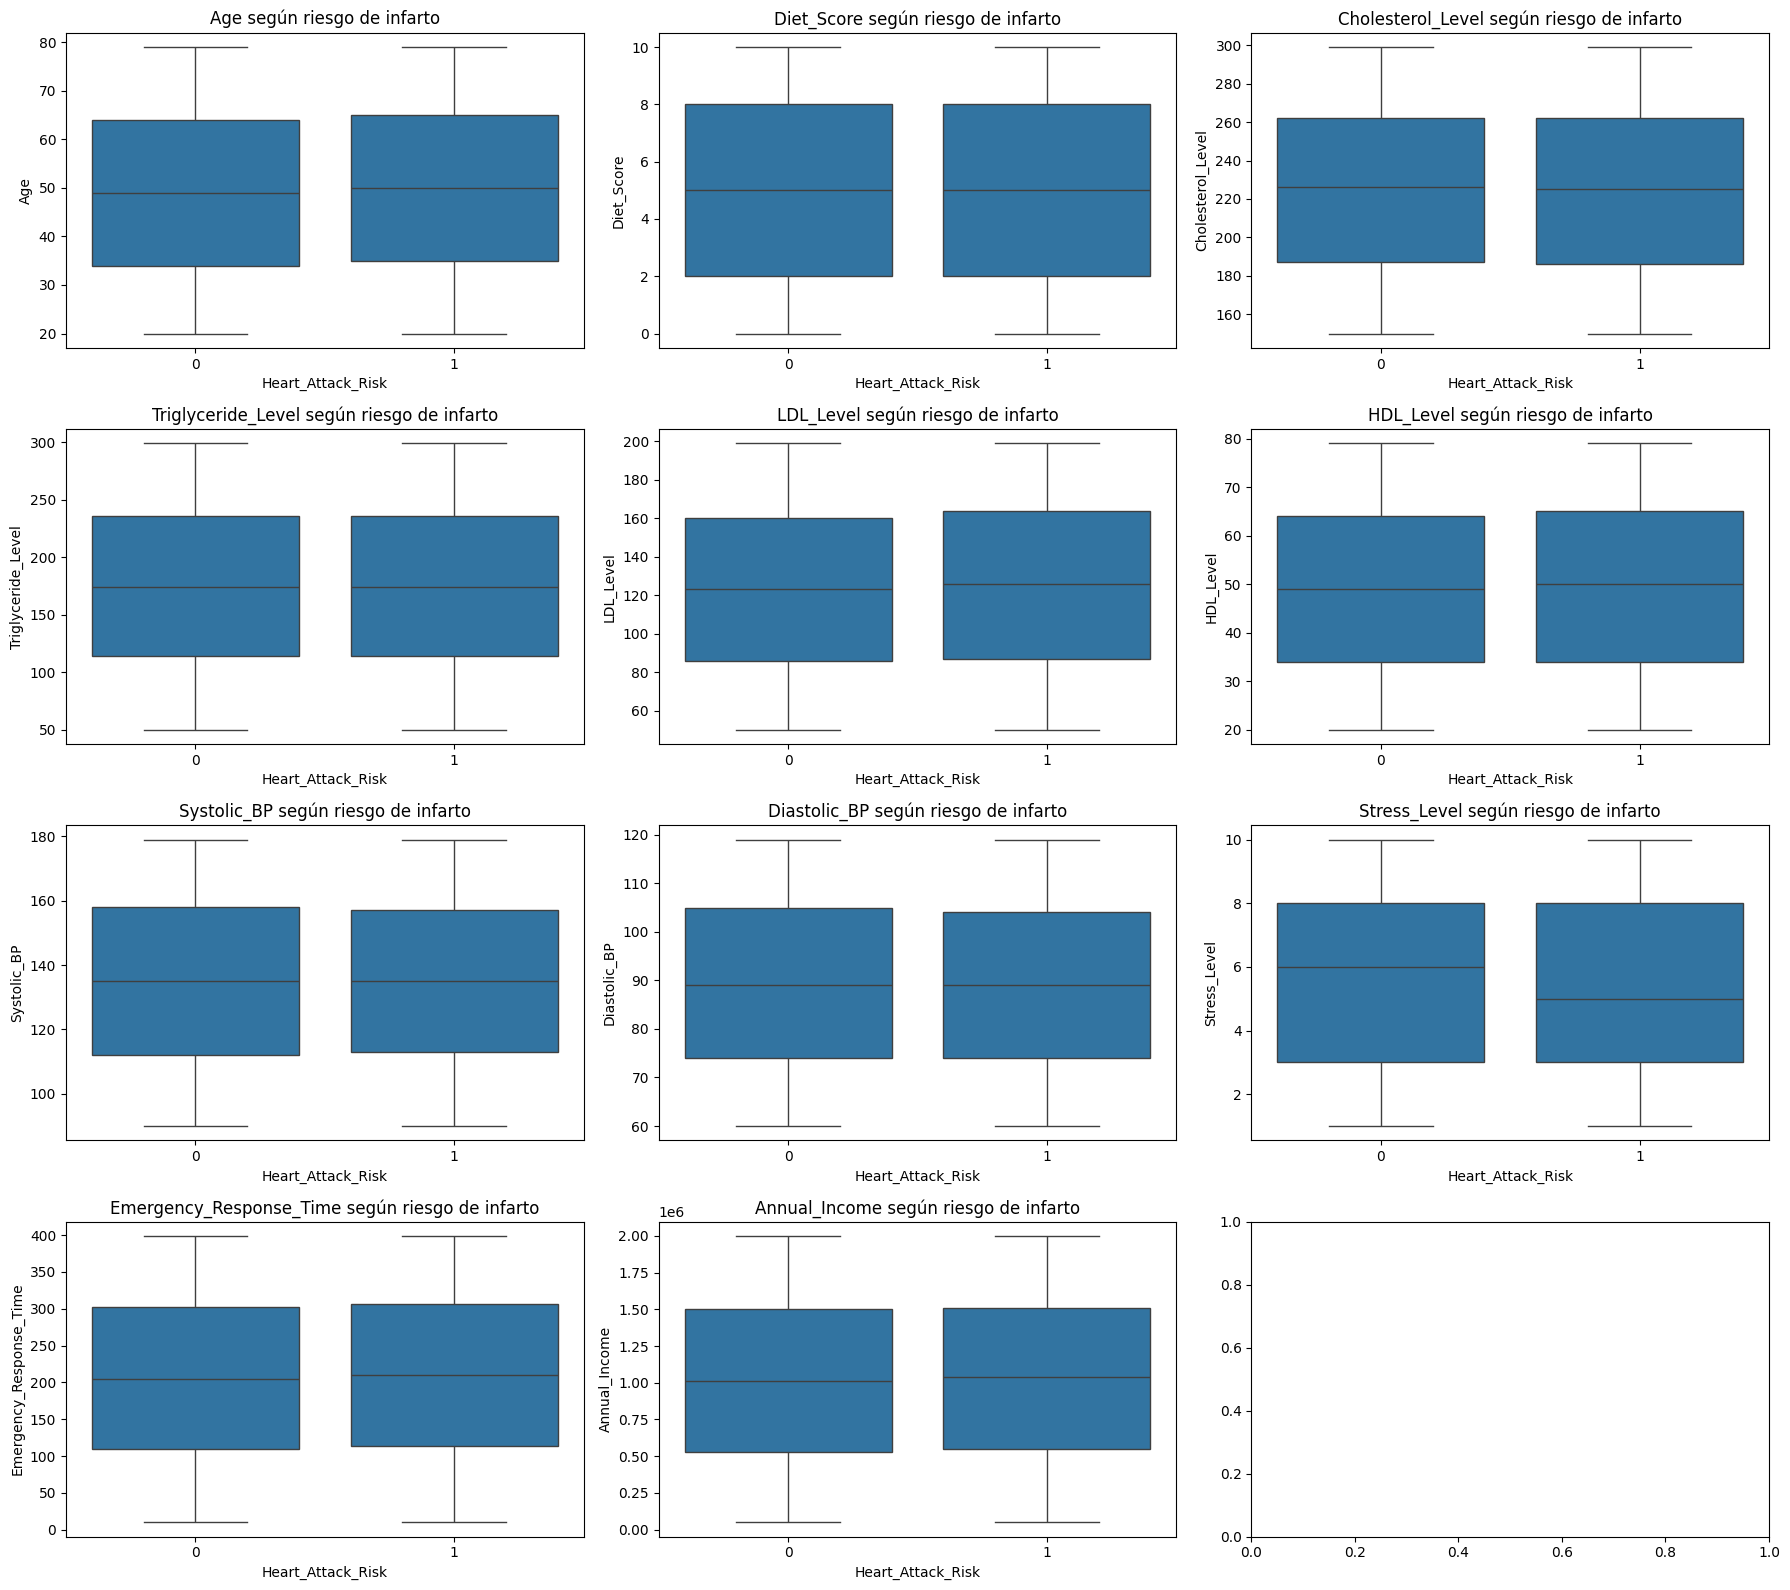

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas binarias (0/1)
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Variables numéricas continuas
numeric_vars = [
    'Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
    'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level',
    'Emergency_Response_Time', 'Annual_Income'
]

# Comparar variables numéricas por riesgo de infarto
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='Heart_Attack_Risk', y=var, data=heartAttackPrediction_India, ax=axes[i])
    axes[i].set_title(f'{var} según riesgo de infarto')
    axes[i].set_xlabel('Heart_Attack_Risk')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

---
---
---
---

## **GRÁFICOS DE DISTRIBUCIONES - HISTOGRAMAS**

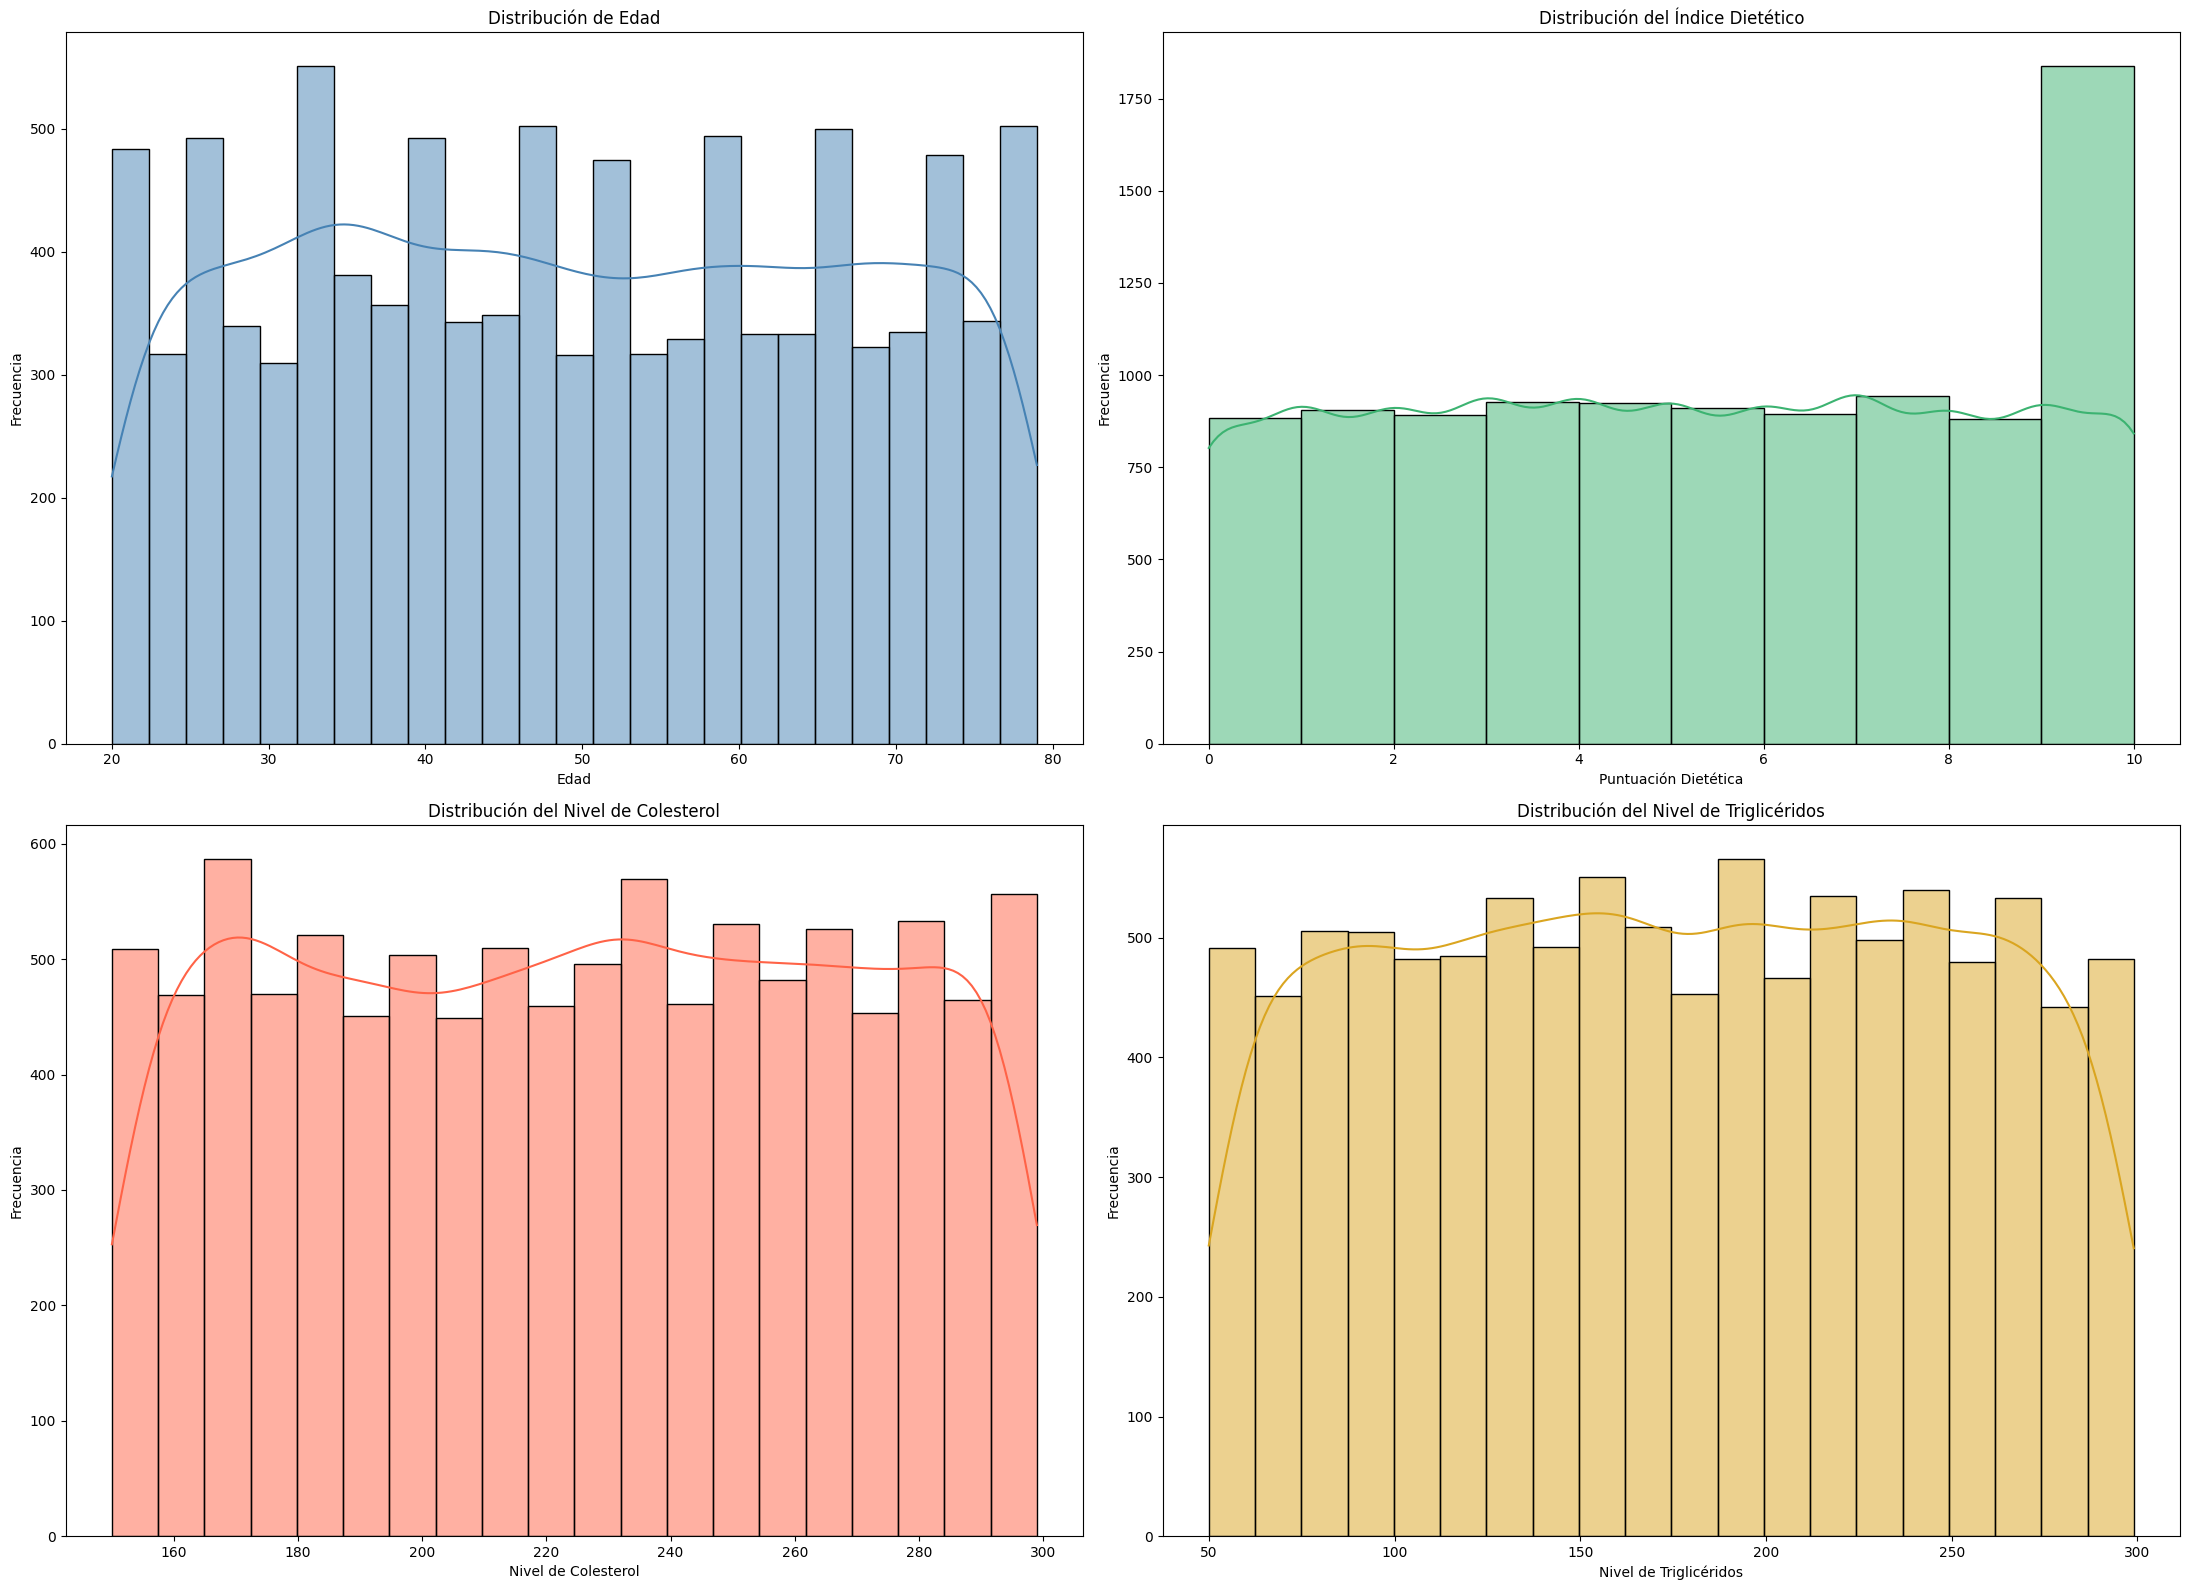

GRÁFICO 1: Distribución de la Edad
    - Valor máximo de Edad: 79
    - Valor medio de Edad: 49.3949
    - Valor mediano de Edad: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Índice Dietético
    - Valor máximo del Índice Dietético: 10
    - Valor medio del Índice Dietético: 5.0217
    - Valor mediano del Índice Dietético: 5.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución del Nivel de Colesterol
    - Valor máximo del Nivel de Colesterol: 299
    - Valor medio del Nivel de Colesterol: 224.753
    - Valor mediano del Nivel de Colesterol: 226.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Distribución del Nivel de Triglicéridos
    - Valor máximo del Nivel de Triglicéridos: 299
    - Valor medio del Nivel de Triglicéridos: 174.7333
    - Valor mediano del Nivel de Triglicéridos

In [88]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Plot 1: Distribución de Edad
sns.histplot(data=heartAttackPrediction_India, x='Age', bins=25, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución de Edad')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# Plot 2: Distribución del Diet Score
sns.histplot(data=heartAttackPrediction_India, x='Diet_Score', bins=10, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Índice Dietético')
axs[0, 1].set_xlabel('Puntuación Dietética')
axs[0, 1].set_ylabel('Frecuencia')

# Plot 3: Distribución del Colesterol
sns.histplot(data=heartAttackPrediction_India, x='Cholesterol_Level', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución del Nivel de Colesterol')
axs[1, 0].set_xlabel('Nivel de Colesterol')
axs[1, 0].set_ylabel('Frecuencia')

# Plot 4: Distribución de los Triglicéridos
sns.histplot(data=heartAttackPrediction_India, x='Triglyceride_Level', bins=20, kde=True, ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Distribución del Nivel de Triglicéridos')
axs[1, 1].set_xlabel('Nivel de Triglicéridos')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución de la Edad')
print(f'    - Valor máximo de Edad: {heartAttackPrediction_India["Age"].max()}')
print(f'    - Valor medio de Edad: {heartAttackPrediction_India["Age"].mean()}')
print(f'    - Valor mediano de Edad: {heartAttackPrediction_India["Age"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Índice Dietético')
print(f'    - Valor máximo del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].max()}')
print(f'    - Valor medio del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].mean()}')
print(f'    - Valor mediano del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución del Nivel de Colesterol')
print(f'    - Valor máximo del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].max()}')
print(f'    - Valor medio del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Distribución del Nivel de Triglicéridos')
print(f'    - Valor máximo del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].max()}')
print(f'    - Valor medio del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].median()}')

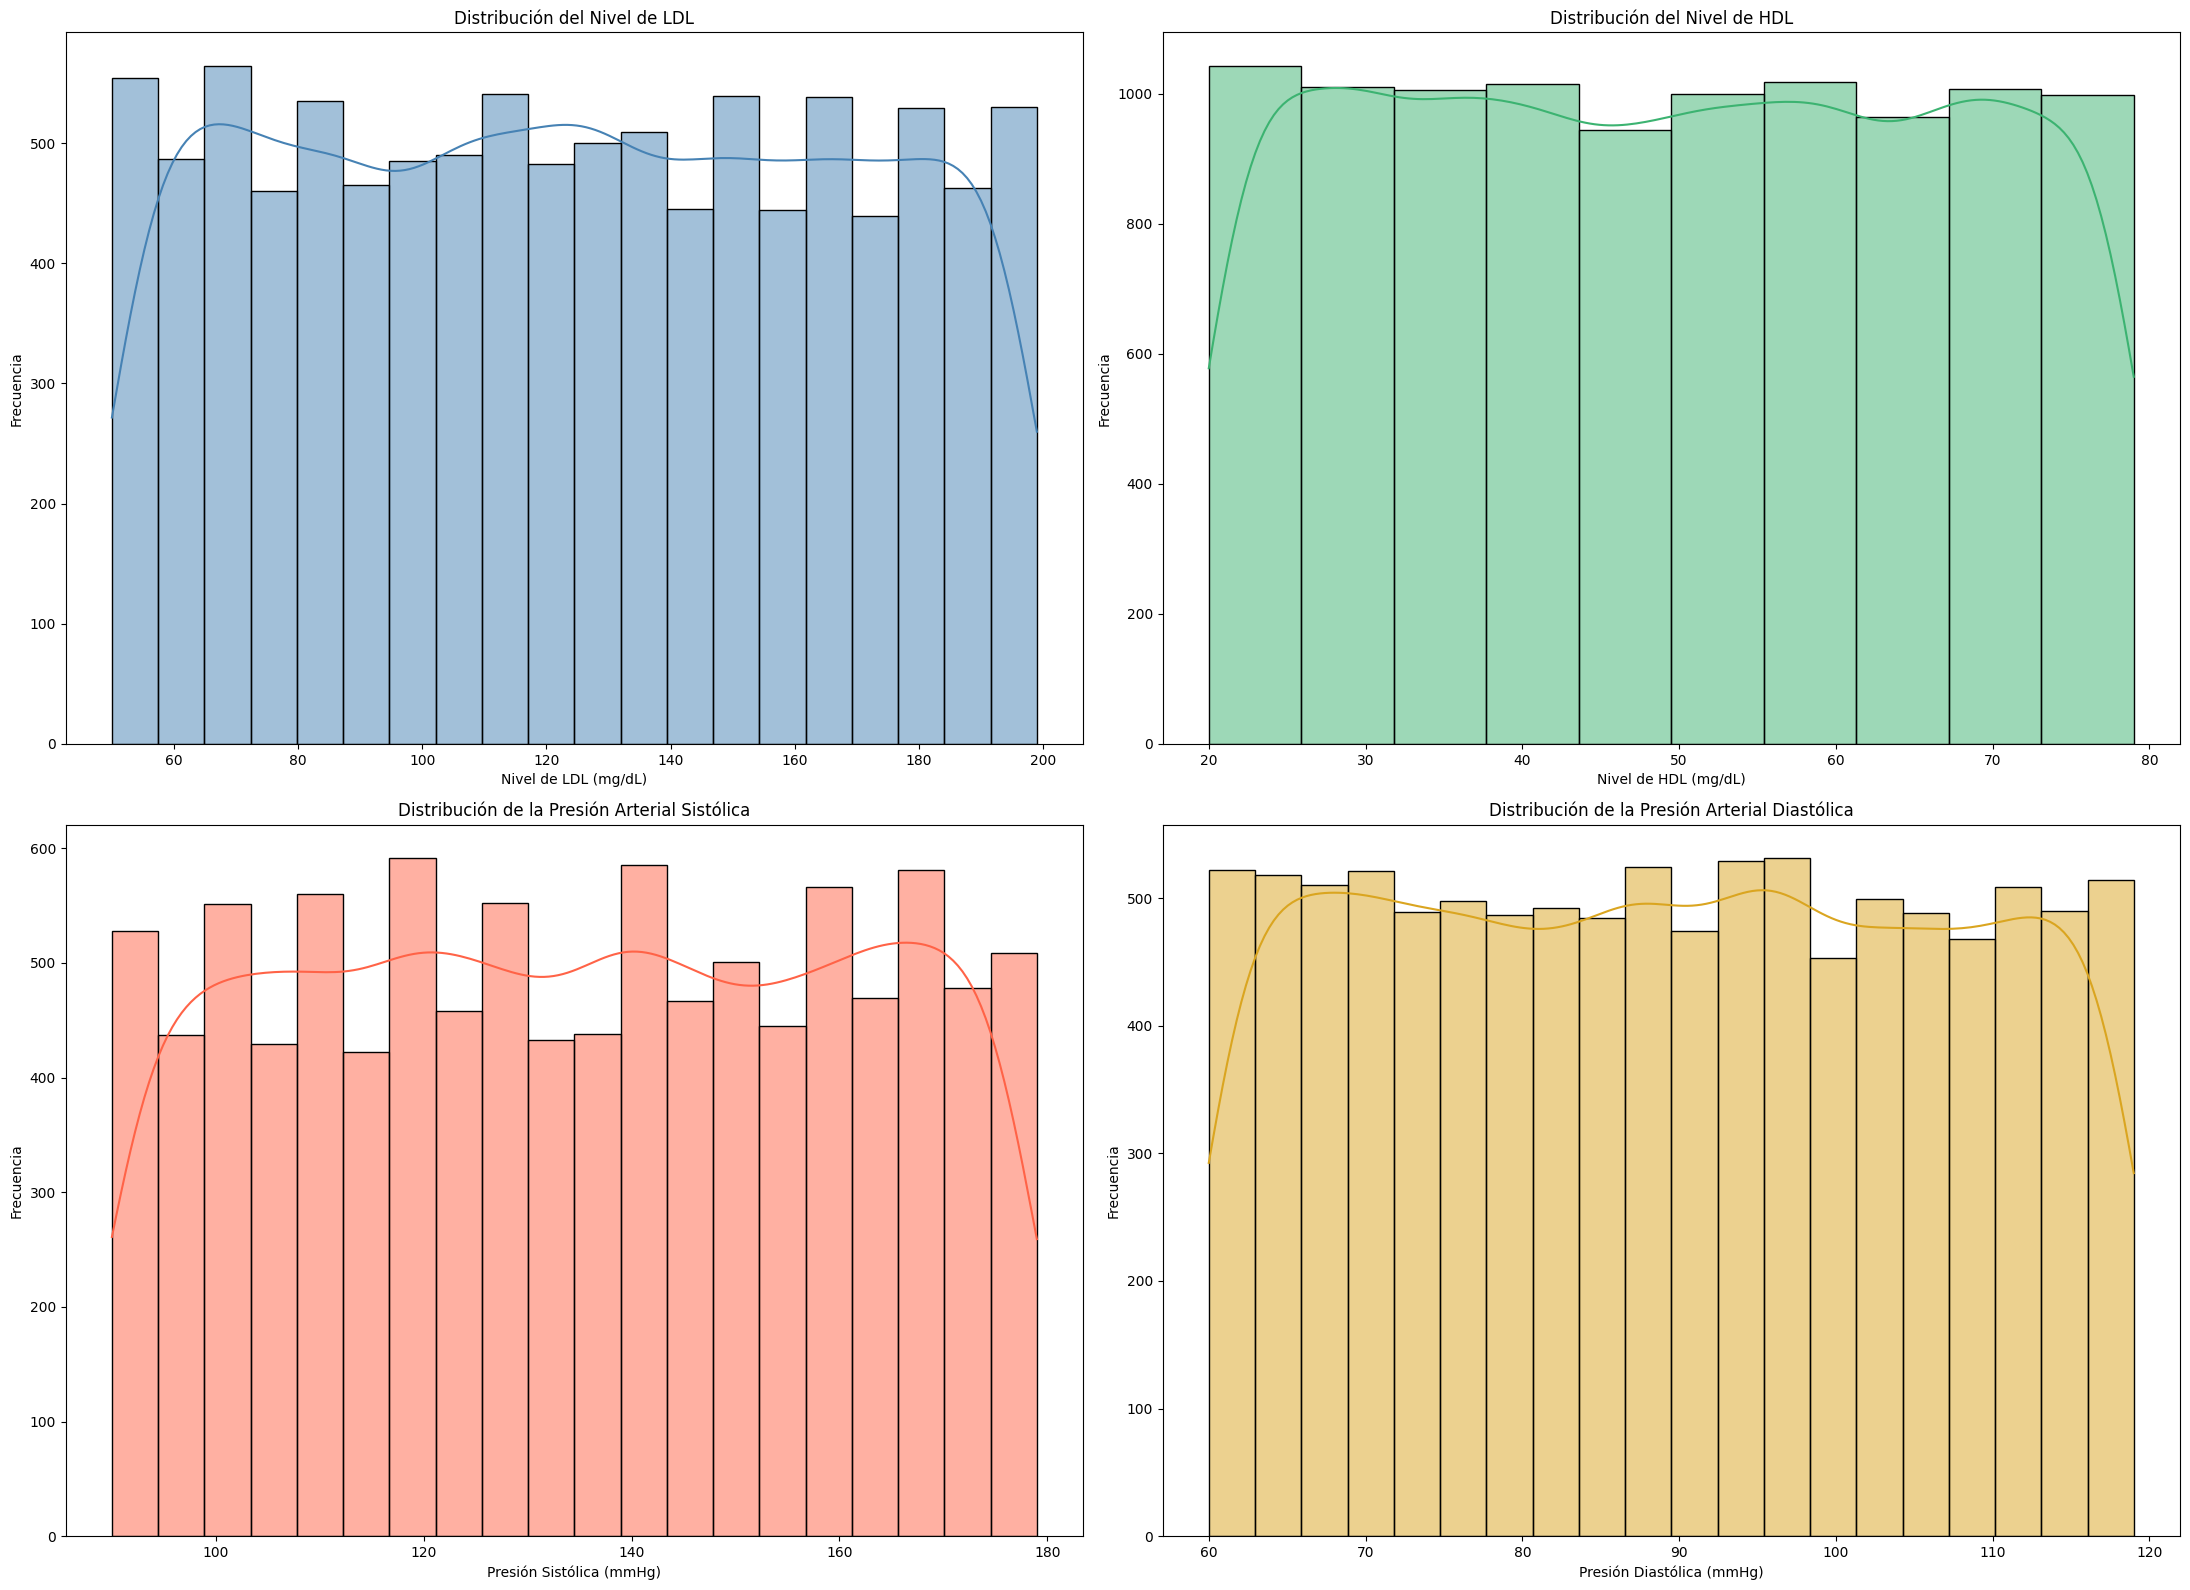

GRÁFICO 1: Distribución del Nivel de LDL
    - Valor máximo de LDL: 199
    - Valor medio de LDL: 123.8721
    - Valor mediano de LDL: 124.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Nivel de HDL
    - Valor máximo de HDL: 79
    - Valor medio de HDL: 49.3355
    - Valor mediano de HDL: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución de la Presión Arterial Sistólica
    - Valor máximo de Presión Sistólica: 179
    - Valor medio de Presión Sistólica: 134.7259
    - Valor mediano de Presión Sistólica: 135.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Distribución de la Presión Arterial Diastólica
    - Valor máximo de Presión Diastólica: 119
    - Valor medio de Presión Diastólica: 89.312
    - Valor mediano de Presión Diastólica: 89.0


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Gráfico 1: Distribución de LDL
sns.histplot(data=heartAttackPrediction_India, x='LDL_Level', bins=20, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución del Nivel de LDL')
axs[0, 0].set_xlabel('Nivel de LDL (mg/dL)')
axs[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Distribución de HDL
sns.histplot(data=heartAttackPrediction_India, x='HDL_Level', bins=10, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Nivel de HDL')
axs[0, 1].set_xlabel('Nivel de HDL (mg/dL)')
axs[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Distribución de Presión Sistólica
sns.histplot(data=heartAttackPrediction_India, x='Systolic_BP', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución de la Presión Arterial Sistólica')
axs[1, 0].set_xlabel('Presión Sistólica (mmHg)')
axs[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Distribución de Presión Diastólica
sns.histplot(data=heartAttackPrediction_India, x='Diastolic_BP', bins=20, kde=True, ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Distribución de la Presión Arterial Diastólica')
axs[1, 1].set_xlabel('Presión Diastólica (mmHg)')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución del Nivel de LDL')
print(f'    - Valor máximo de LDL: {heartAttackPrediction_India["LDL_Level"].max()}')
print(f'    - Valor medio de LDL: {heartAttackPrediction_India["LDL_Level"].mean()}')
print(f'    - Valor mediano de LDL: {heartAttackPrediction_India["LDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Nivel de HDL')
print(f'    - Valor máximo de HDL: {heartAttackPrediction_India["HDL_Level"].max()}')
print(f'    - Valor medio de HDL: {heartAttackPrediction_India["HDL_Level"].mean()}')
print(f'    - Valor mediano de HDL: {heartAttackPrediction_India["HDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución de la Presión Arterial Sistólica')
print(f'    - Valor máximo de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].max()}')
print(f'    - Valor medio de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Distribución de la Presión Arterial Diastólica')
print(f'    - Valor máximo de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].max()}')
print(f'    - Valor medio de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].median()}')

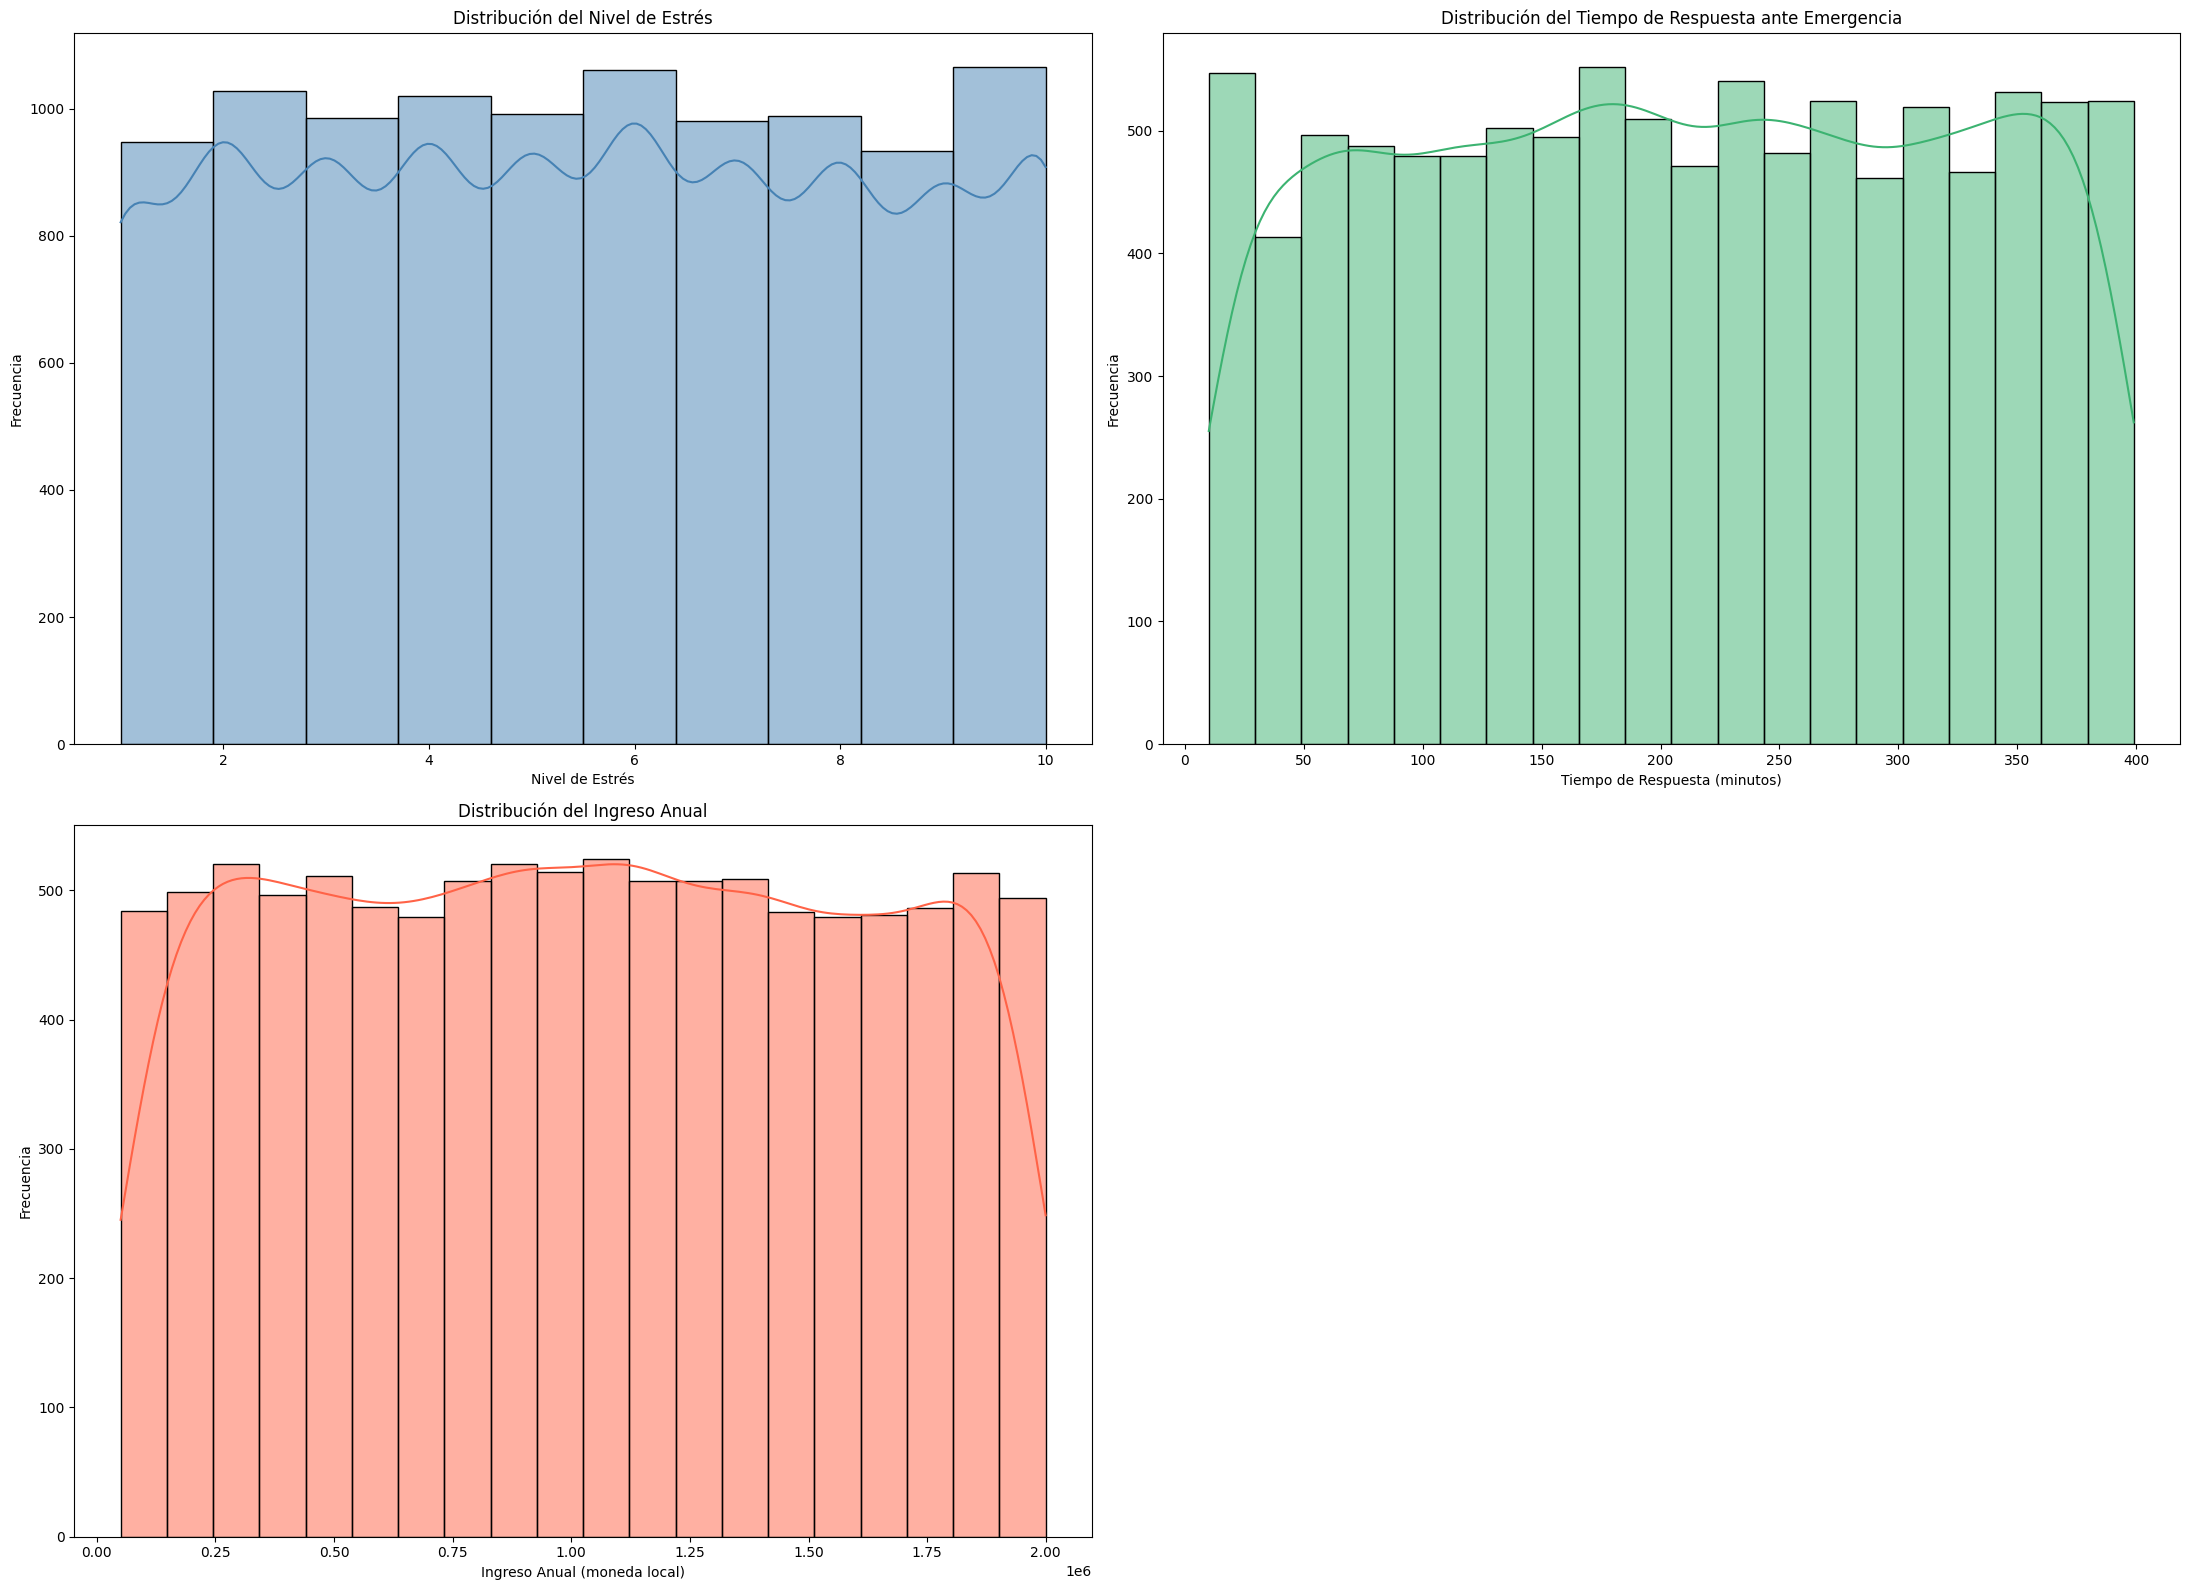

GRÁFICO 1: Distribución del Nivel de Estrés
    - Valor máximo de Estrés: 10
    - Valor medio de Estrés: 5.5188
    - Valor mediano de Estrés: 6.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Tiempo de Respuesta ante Emergencia
    - Valor máximo del Tiempo de Respuesta: 399 minutos
    - Valor medio del Tiempo de Respuesta: 206.3834 minutos
    - Valor mediano del Tiempo de Respuesta: 206.0 minutos
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución del Ingreso Anual
    - Valor máximo del Ingreso Anual: 1999714 rupias indias
    - Valor medio del Ingreso Anual: 1022062.1708 rupias indias
    - Valor mediano del Ingreso Anual: 1021383.0 rupias indias


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Gráfico 1: Nivel de Estrés
sns.histplot(data=heartAttackPrediction_India, x='Stress_Level', bins=10, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución del Nivel de Estrés')
axs[0, 0].set_xlabel('Nivel de Estrés')
axs[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Tiempo de Respuesta ante Emergencia
sns.histplot(data=heartAttackPrediction_India, x='Emergency_Response_Time', bins=20, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Tiempo de Respuesta ante Emergencia')
axs[0, 1].set_xlabel('Tiempo de Respuesta (minutos)')
axs[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Ingreso Anual
sns.histplot(data=heartAttackPrediction_India, x='Annual_Income', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución del Ingreso Anual')
axs[1, 0].set_xlabel('Ingreso Anual (moneda local)')
axs[1, 0].set_ylabel('Frecuencia')

# Dejar el último gráfico en blanco
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución del Nivel de Estrés')
print(f'    - Valor máximo de Estrés: {heartAttackPrediction_India["Stress_Level"].max()}')
print(f'    - Valor medio de Estrés: {heartAttackPrediction_India["Stress_Level"].mean()}')
print(f'    - Valor mediano de Estrés: {heartAttackPrediction_India["Stress_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Tiempo de Respuesta ante Emergencia')
print(f'    - Valor máximo del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].max()} minutos')
print(f'    - Valor medio del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].mean()} minutos')
print(f'    - Valor mediano del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].median()} minutos')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución del Ingreso Anual')
print(f'    - Valor máximo del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].max()} rupias indias')
print(f'    - Valor medio del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].mean()} rupias indias')
print(f'    - Valor mediano del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].median()} rupias indias')

---
---
---
---

## **DIAGRAMAS DE CAJA (BOXPLOTS) - DETECCIÓN DE OUTLIERS**

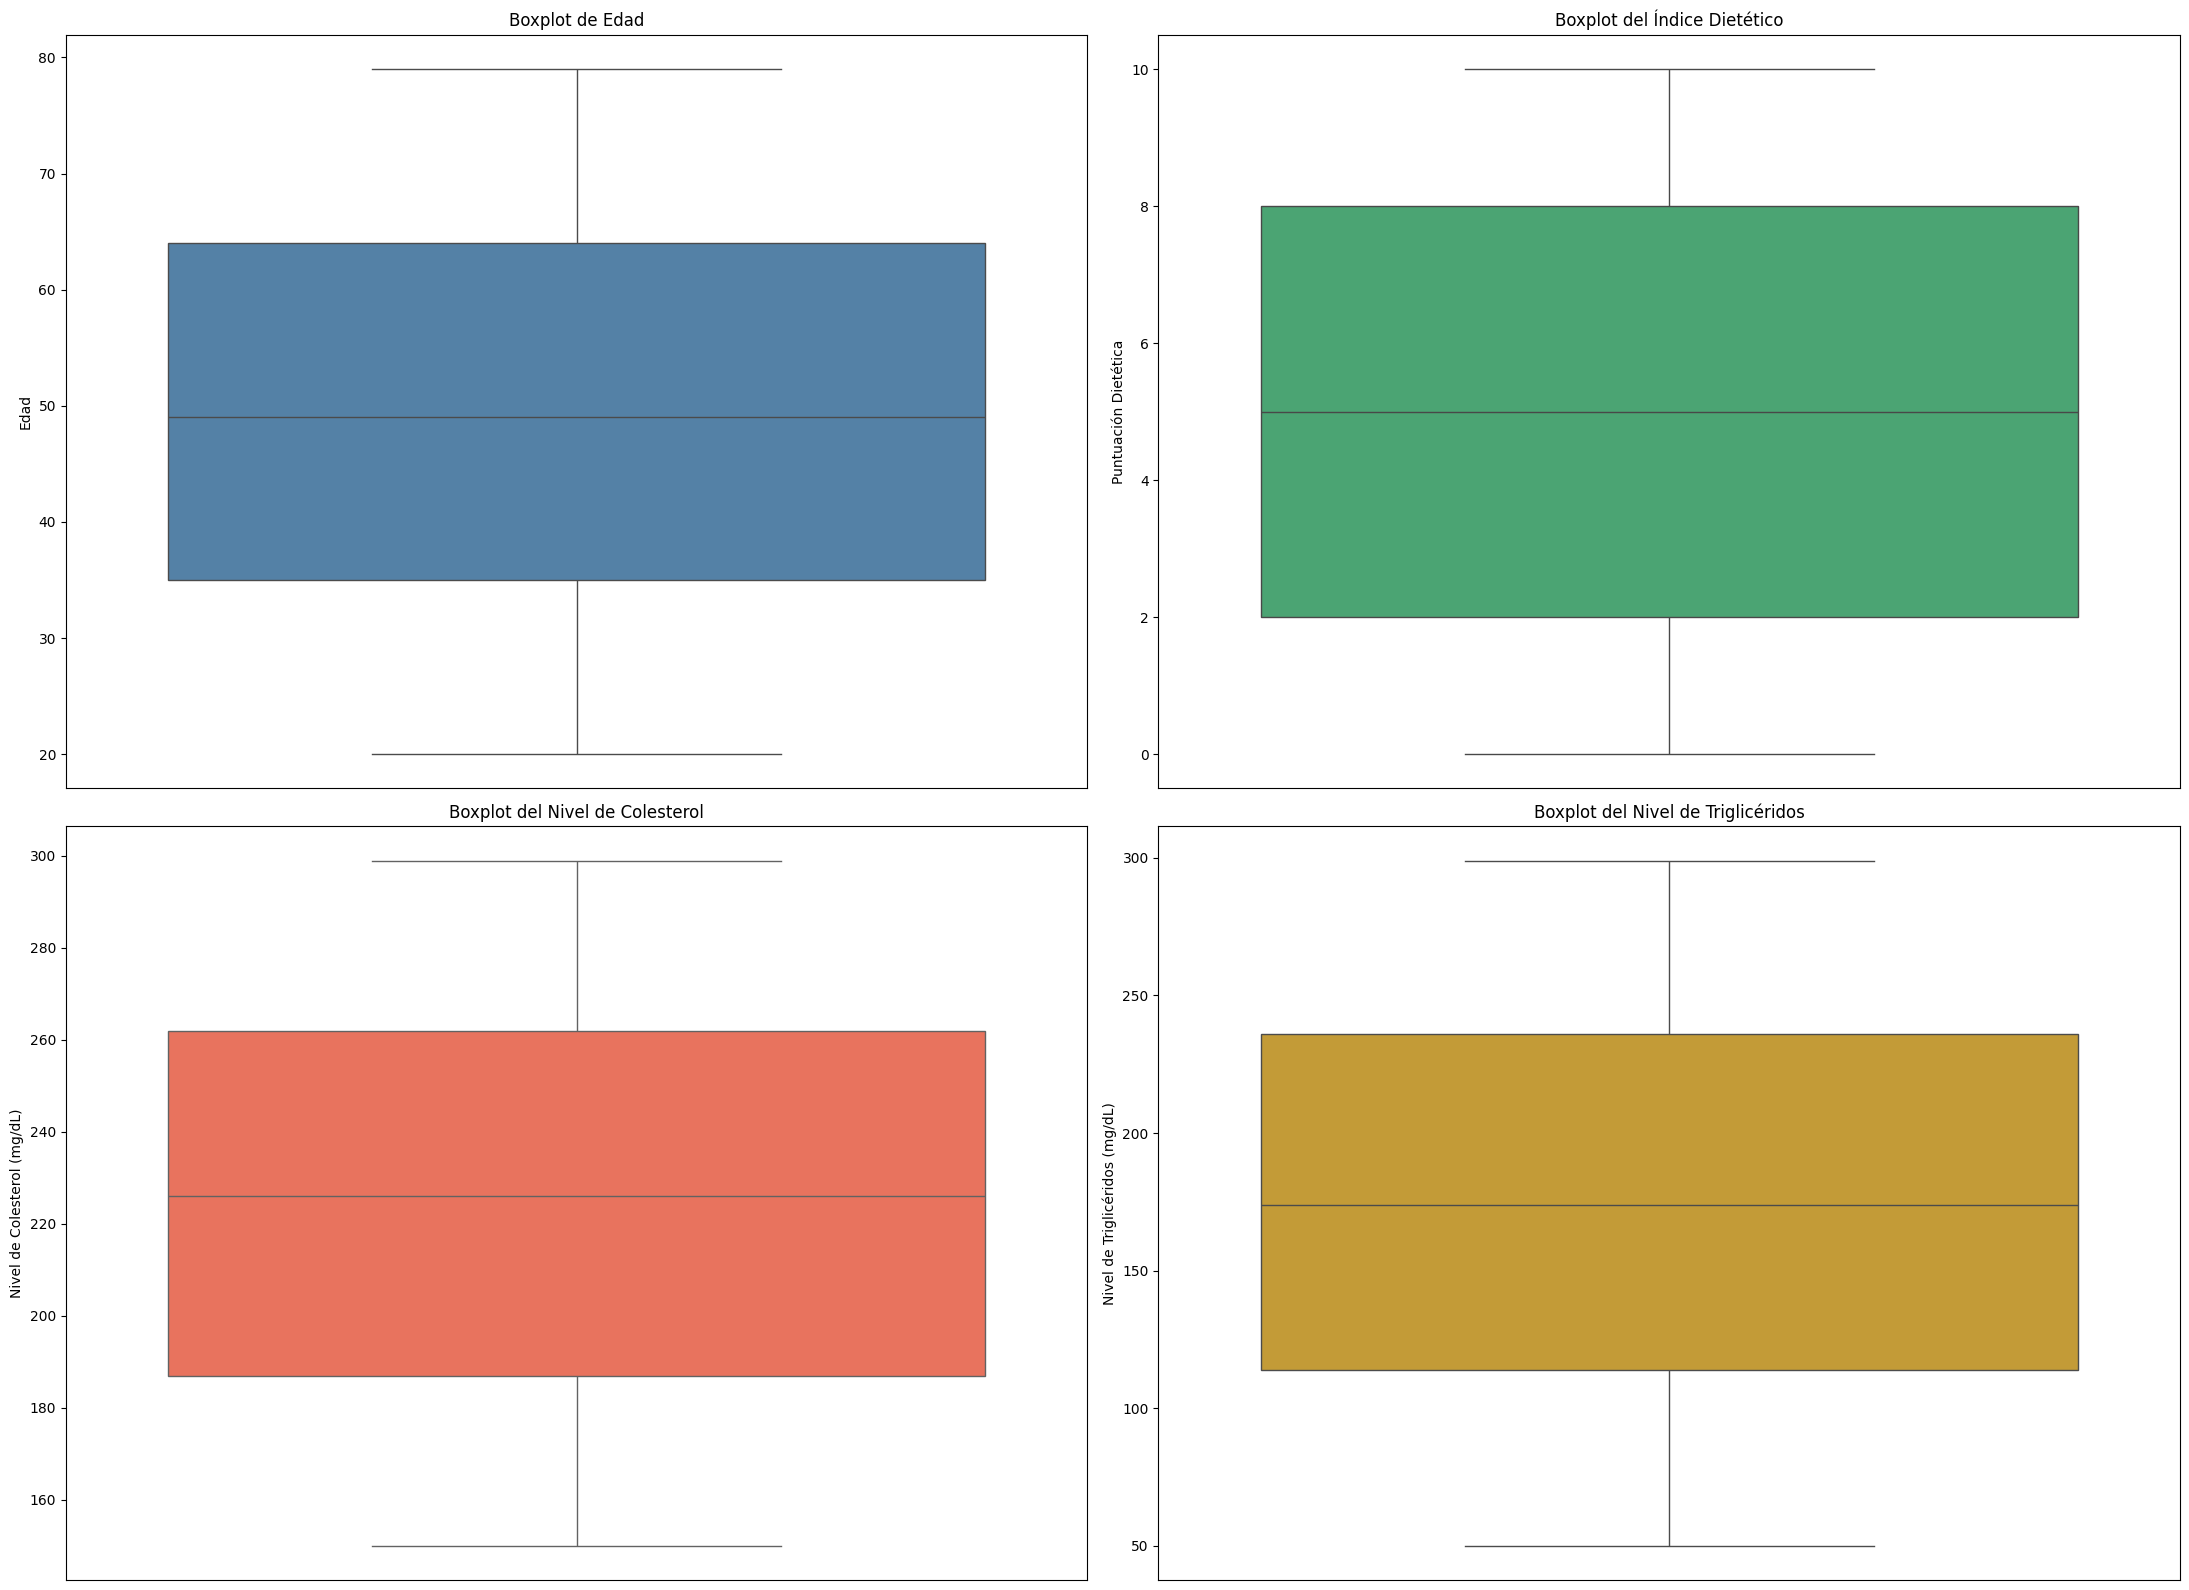

GRÁFICO 1: Boxplot de la Edad
    - Valor máximo de Edad: 79
    - Valor medio de Edad: 49.3949
    - Valor mediano de Edad: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Índice Dietético
    - Valor máximo del Índice Dietético: 10
    - Valor medio del Índice Dietético: 5.0217
    - Valor mediano del Índice Dietético: 5.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot del Nivel de Colesterol
    - Valor máximo del Nivel de Colesterol: 299
    - Valor medio del Nivel de Colesterol: 224.753
    - Valor mediano del Nivel de Colesterol: 226.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Boxplot del Nivel de Triglicéridos
    - Valor máximo del Nivel de Triglicéridos: 299
    - Valor medio del Nivel de Triglicéridos: 174.7333
    - Valor mediano del Nivel de Triglicéridos: 174.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: Edad
sns.boxplot(data=heartAttackPrediction_India, y='Age', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot de Edad')
axs[0, 0].set_ylabel('Edad')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: Índice Dietético
sns.boxplot(data=heartAttackPrediction_India, y='Diet_Score', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Índice Dietético')
axs[0, 1].set_ylabel('Puntuación Dietética')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Colesterol
sns.boxplot(data=heartAttackPrediction_India, y='Cholesterol_Level', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot del Nivel de Colesterol')
axs[1, 0].set_ylabel('Nivel de Colesterol (mg/dL)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Boxplot 4: Triglicéridos
sns.boxplot(data=heartAttackPrediction_India, y='Triglyceride_Level', ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Boxplot del Nivel de Triglicéridos')
axs[1, 1].set_ylabel('Nivel de Triglicéridos (mg/dL)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticks([])

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot de la Edad')
print(f'    - Valor máximo de Edad: {heartAttackPrediction_India["Age"].max()}')
print(f'    - Valor medio de Edad: {heartAttackPrediction_India["Age"].mean()}')
print(f'    - Valor mediano de Edad: {heartAttackPrediction_India["Age"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Índice Dietético')
print(f'    - Valor máximo del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].max()}')
print(f'    - Valor medio del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].mean()}')
print(f'    - Valor mediano del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot del Nivel de Colesterol')
print(f'    - Valor máximo del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].max()}')
print(f'    - Valor medio del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Boxplot del Nivel de Triglicéridos')
print(f'    - Valor máximo del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].max()}')
print(f'    - Valor medio del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].median()}')

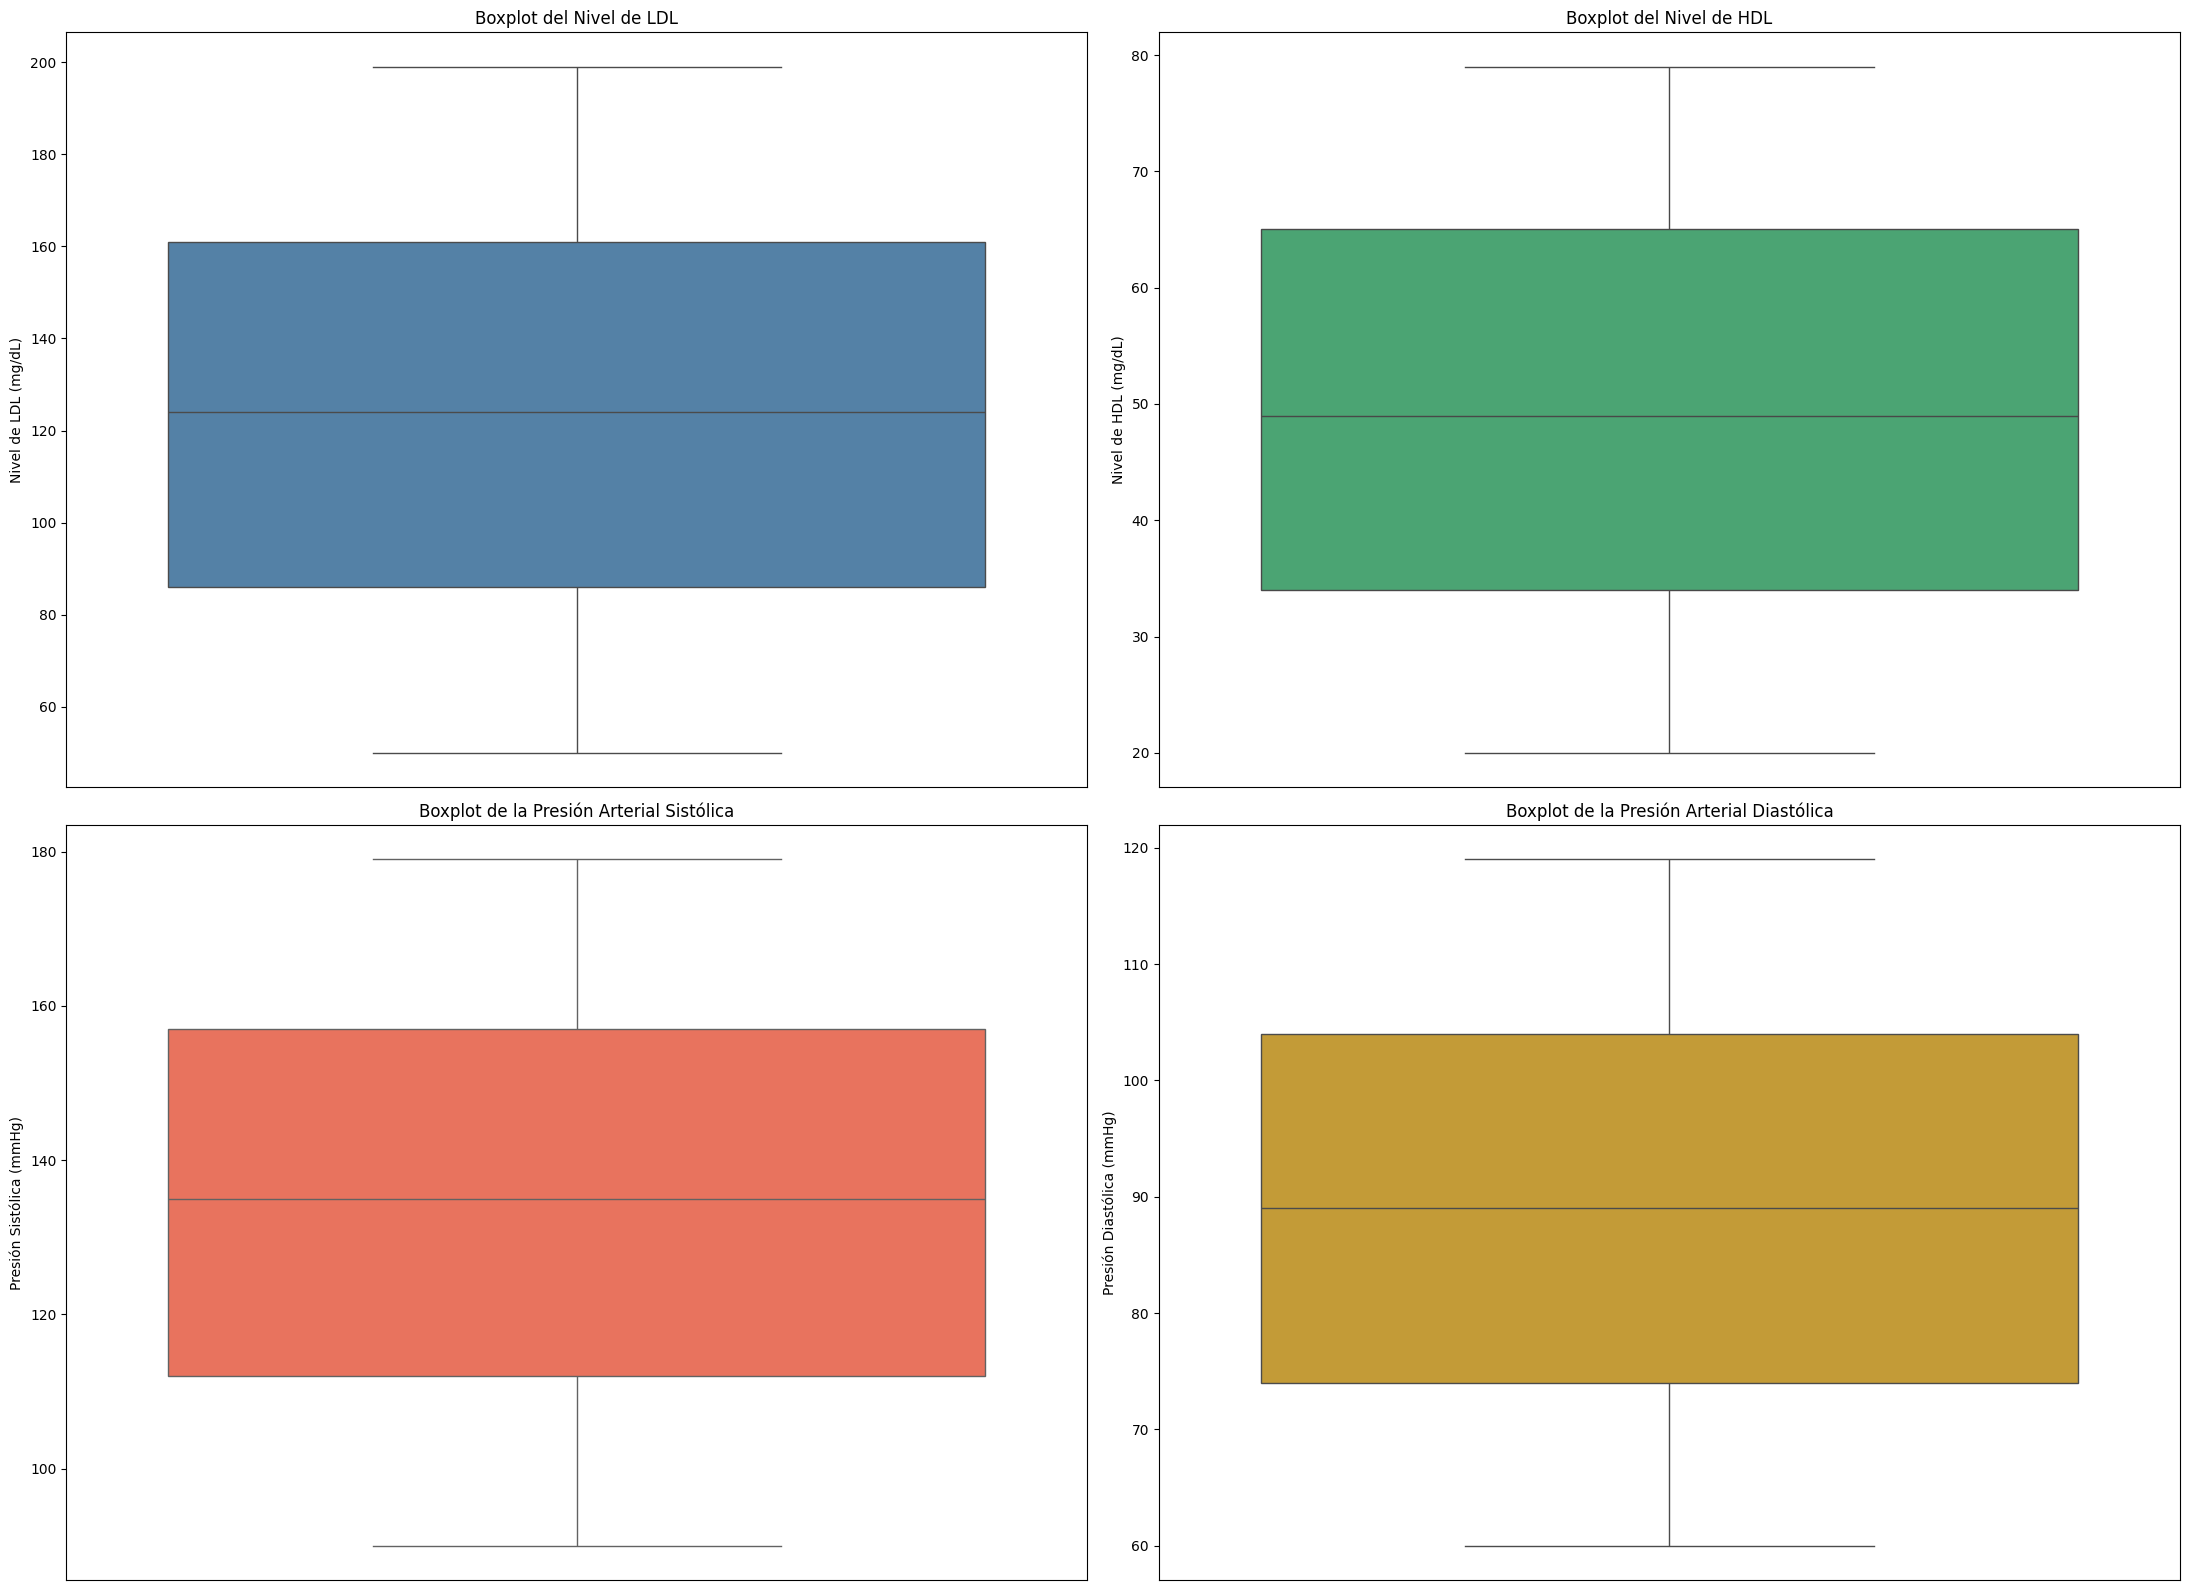

GRÁFICO 1: Boxplot del Nivel de LDL
    - Valor máximo de LDL: 199
    - Valor medio de LDL: 123.8721
    - Valor mediano de LDL: 124.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Nivel de HDL
    - Valor máximo de HDL: 79
    - Valor medio de HDL: 49.3355
    - Valor mediano de HDL: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot de la Presión Arterial Sistólica
    - Valor máximo de Presión Sistólica: 179
    - Valor medio de Presión Sistólica: 134.7259
    - Valor mediano de Presión Sistólica: 135.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Boxplot de la Presión Arterial Diastólica
    - Valor máximo de Presión Diastólica: 119
    - Valor medio de Presión Diastólica: 89.312
    - Valor mediano de Presión Diastólica: 89.0


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: LDL
sns.boxplot(data=heartAttackPrediction_India, y='LDL_Level', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot del Nivel de LDL')
axs[0, 0].set_ylabel('Nivel de LDL (mg/dL)')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: HDL
sns.boxplot(data=heartAttackPrediction_India, y='HDL_Level', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Nivel de HDL')
axs[0, 1].set_ylabel('Nivel de HDL (mg/dL)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Presión Arterial Sistólica
sns.boxplot(data=heartAttackPrediction_India, y='Systolic_BP', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot de la Presión Arterial Sistólica')
axs[1, 0].set_ylabel('Presión Sistólica (mmHg)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Boxplot 4: Presión Arterial Diastólica
sns.boxplot(data=heartAttackPrediction_India, y='Diastolic_BP', ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Boxplot de la Presión Arterial Diastólica')
axs[1, 1].set_ylabel('Presión Diastólica (mmHg)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticks([])

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot del Nivel de LDL')
print(f'    - Valor máximo de LDL: {heartAttackPrediction_India["LDL_Level"].max()}')
print(f'    - Valor medio de LDL: {heartAttackPrediction_India["LDL_Level"].mean()}')
print(f'    - Valor mediano de LDL: {heartAttackPrediction_India["LDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Nivel de HDL')
print(f'    - Valor máximo de HDL: {heartAttackPrediction_India["HDL_Level"].max()}')
print(f'    - Valor medio de HDL: {heartAttackPrediction_India["HDL_Level"].mean()}')
print(f'    - Valor mediano de HDL: {heartAttackPrediction_India["HDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot de la Presión Arterial Sistólica')
print(f'    - Valor máximo de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].max()}')
print(f'    - Valor medio de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Boxplot de la Presión Arterial Diastólica')
print(f'    - Valor máximo de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].max()}')
print(f'    - Valor medio de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].median()}')


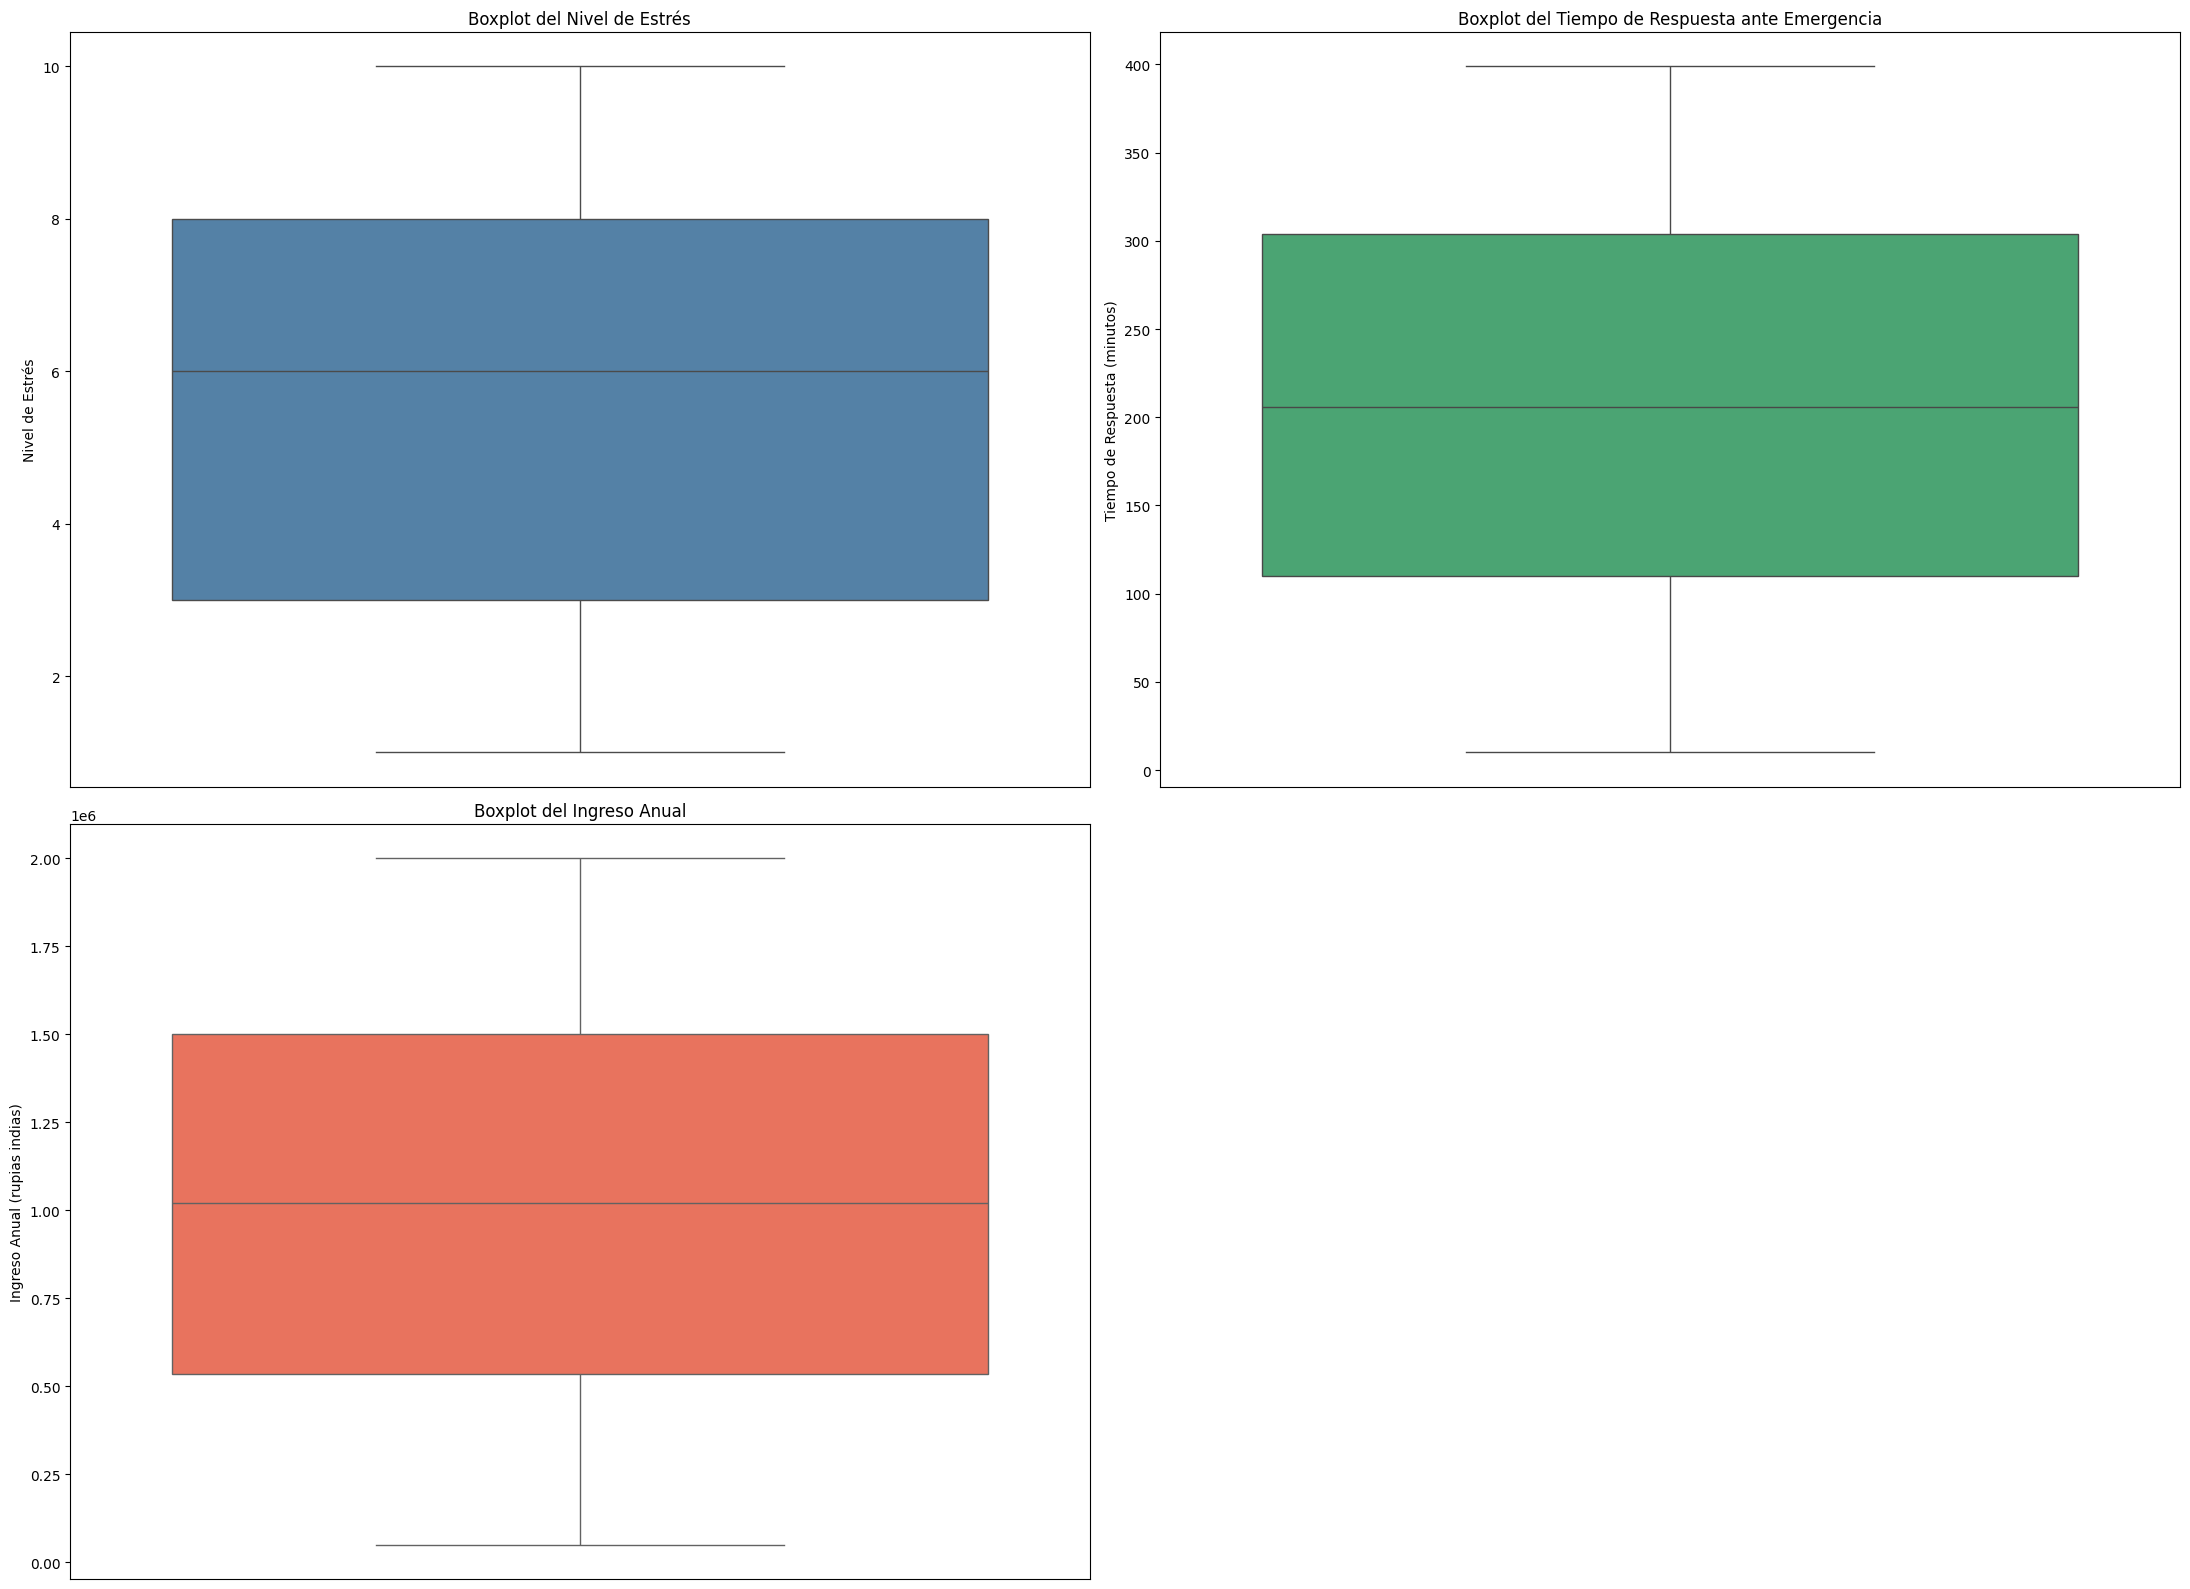

GRÁFICO 1: Boxplot del Nivel de Estrés
    - Valor máximo de Estrés: 10
    - Valor medio de Estrés: 5.5188
    - Valor mediano de Estrés: 6.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Tiempo de Respuesta ante Emergencia
    - Valor máximo del Tiempo de Respuesta: 399 minutos
    - Valor medio del Tiempo de Respuesta: 206.3834 minutos
    - Valor mediano del Tiempo de Respuesta: 206.0 minutos
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot del Ingreso Anual
    - Valor máximo del Ingreso Anual: 1999714 rupias indias
    - Valor medio del Ingreso Anual: 1022062.1708 rupias indias
    - Valor mediano del Ingreso Anual: 1021383.0 rupias indias


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: Nivel de Estrés
sns.boxplot(data=heartAttackPrediction_India, y='Stress_Level', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot del Nivel de Estrés')
axs[0, 0].set_ylabel('Nivel de Estrés')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: Tiempo de Respuesta ante Emergencia
sns.boxplot(data=heartAttackPrediction_India, y='Emergency_Response_Time', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Tiempo de Respuesta ante Emergencia')
axs[0, 1].set_ylabel('Tiempo de Respuesta (minutos)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Ingreso Anual
sns.boxplot(data=heartAttackPrediction_India, y='Annual_Income', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot del Ingreso Anual')
axs[1, 0].set_ylabel('Ingreso Anual (rupias indias)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Dejar el último gráfico vacío
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot del Nivel de Estrés')
print(f'    - Valor máximo de Estrés: {heartAttackPrediction_India["Stress_Level"].max()}')
print(f'    - Valor medio de Estrés: {heartAttackPrediction_India["Stress_Level"].mean()}')
print(f'    - Valor mediano de Estrés: {heartAttackPrediction_India["Stress_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Tiempo de Respuesta ante Emergencia')
print(f'    - Valor máximo del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].max()} minutos')
print(f'    - Valor medio del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].mean()} minutos')
print(f'    - Valor mediano del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].median()} minutos')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot del Ingreso Anual')
print(f'    - Valor máximo del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].max()} rupias indias')
print(f'    - Valor medio del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].mean()} rupias indias')
print(f'    - Valor mediano del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].median()} rupias indias')

---
---
---
---

## **DETECCIÓN DE OUTLIERS**

#### **MÉTODO DEL RANGO INTERCUARTÍLICO (IQR)**

In [ ]:
def detectar_outliers_IQR(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f'Variable: {columna}')
    print(f'  - Q1: {Q1}')
    print(f'  - Q3: {Q3}')
    print(f'  - IQR: {IQR}')
    print(f'  - Límite inferior: {limite_inferior}')
    print(f'  - Límite superior: {limite_superior}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

variables = ['Age', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP',
             'Cholesterol_Level', 'Triglyceride_Level', 'Stress_Level', 'Emergency_Response_Time', 'Annual_Income']

for var in variables:
    detectar_outliers_IQR(heartAttackPrediction_India, var)

Variable: Age
  - Q1: 35.0
  - Q3: 64.0
  - IQR: 29.0
  - Límite inferior: -8.5
  - Límite superior: 107.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Q1: 86.0
  - Q3: 161.0
  - IQR: 75.0
  - Límite inferior: -26.5
  - Límite superior: 273.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Q1: 34.0
  - Q3: 65.0
  - IQR: 31.0
  - Límite inferior: -12.5
  - Límite superior: 111.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Q1: 112.0
  - Q3: 157.0
  - IQR: 45.0
  - Límite inferior: 44.5
  - Límite superior: 224.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Q1: 74.0
  - Q3: 104.0
  - IQR: 30.0
  - Límite inferior: 29.0
  - Límite superior: 149.0
  - Total de outliers detectados: 0
------

#### **Z-score**

In [ ]:
from scipy.stats import zscore
import numpy as np

def detectar_outliers_zscore(df, columna, umbral=3):
    z_scores = zscore(df[columna])
    outliers = df[np.abs(z_scores) > umbral]
    
    print(f'Variable: {columna}')
    print(f'  - Media: {df[columna].mean()}')
    print(f'  - Desviación estándar: {df[columna].std()}')
    print(f'  - Umbral Z-score: ±{umbral}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

variables = ['Age', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP',
             'Cholesterol_Level', 'Triglyceride_Level', 'Stress_Level', 
             'Emergency_Response_Time', 'Annual_Income']

for var in variables:
    detectar_outliers_zscore(heartAttackPrediction_India, var)

Variable: Age
  - Media: 49.3949
  - Desviación estándar: 17.28030135360744
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Media: 123.8721
  - Desviación estándar: 43.41076584269281
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Media: 49.3355
  - Desviación estándar: 17.399896993704854
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Media: 134.7259
  - Desviación estándar: 25.849077095104708
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Media: 89.312
  - Desviación estándar: 17.39648584547975
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
-------------------------------------------------

#### **Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

def detectar_outliers_isolation_forest(df, columna, contamination=0.01):
    model = IsolationForest(contamination=contamination, random_state=42)
    df_filtered = df[[columna]].dropna()
    model.fit(df_filtered)
    df_filtered['outlier'] = model.predict(df_filtered)
    outliers = df_filtered[df_filtered['outlier'] == -1]
    
    print(f'Variable: {columna}')
    print(f'  - Contaminación estimada: {contamination}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

for var in variables:
    detectar_outliers_isolation_forest(heartAttackPrediction_India, var)

Variable: Age
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 77
------------------------------------------------------------
Variable: HDL_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Cholesterol_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 70
------------------------------------------------------------
Variable: Triglyceride_Level
  - Contaminación estimada: 0.01
  - Total de outliers detecta

#### **Local Outlier Factor**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def detectar_outliers_lof(df, columna, n_neighbors=15):
    df_filtered = df[[columna]].dropna()
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    y_pred = lof.fit_predict(df_filtered)
    outliers = df_filtered[y_pred == -1]
    
    print(f'Variable: {columna}')
    print(f'  - Vecinos considerados: {n_neighbors}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

for var in variables:
    detectar_outliers_lof(heartAttackPrediction_India, var)

Variable: Age
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Cholesterol_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Triglyceride_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
-----------------------

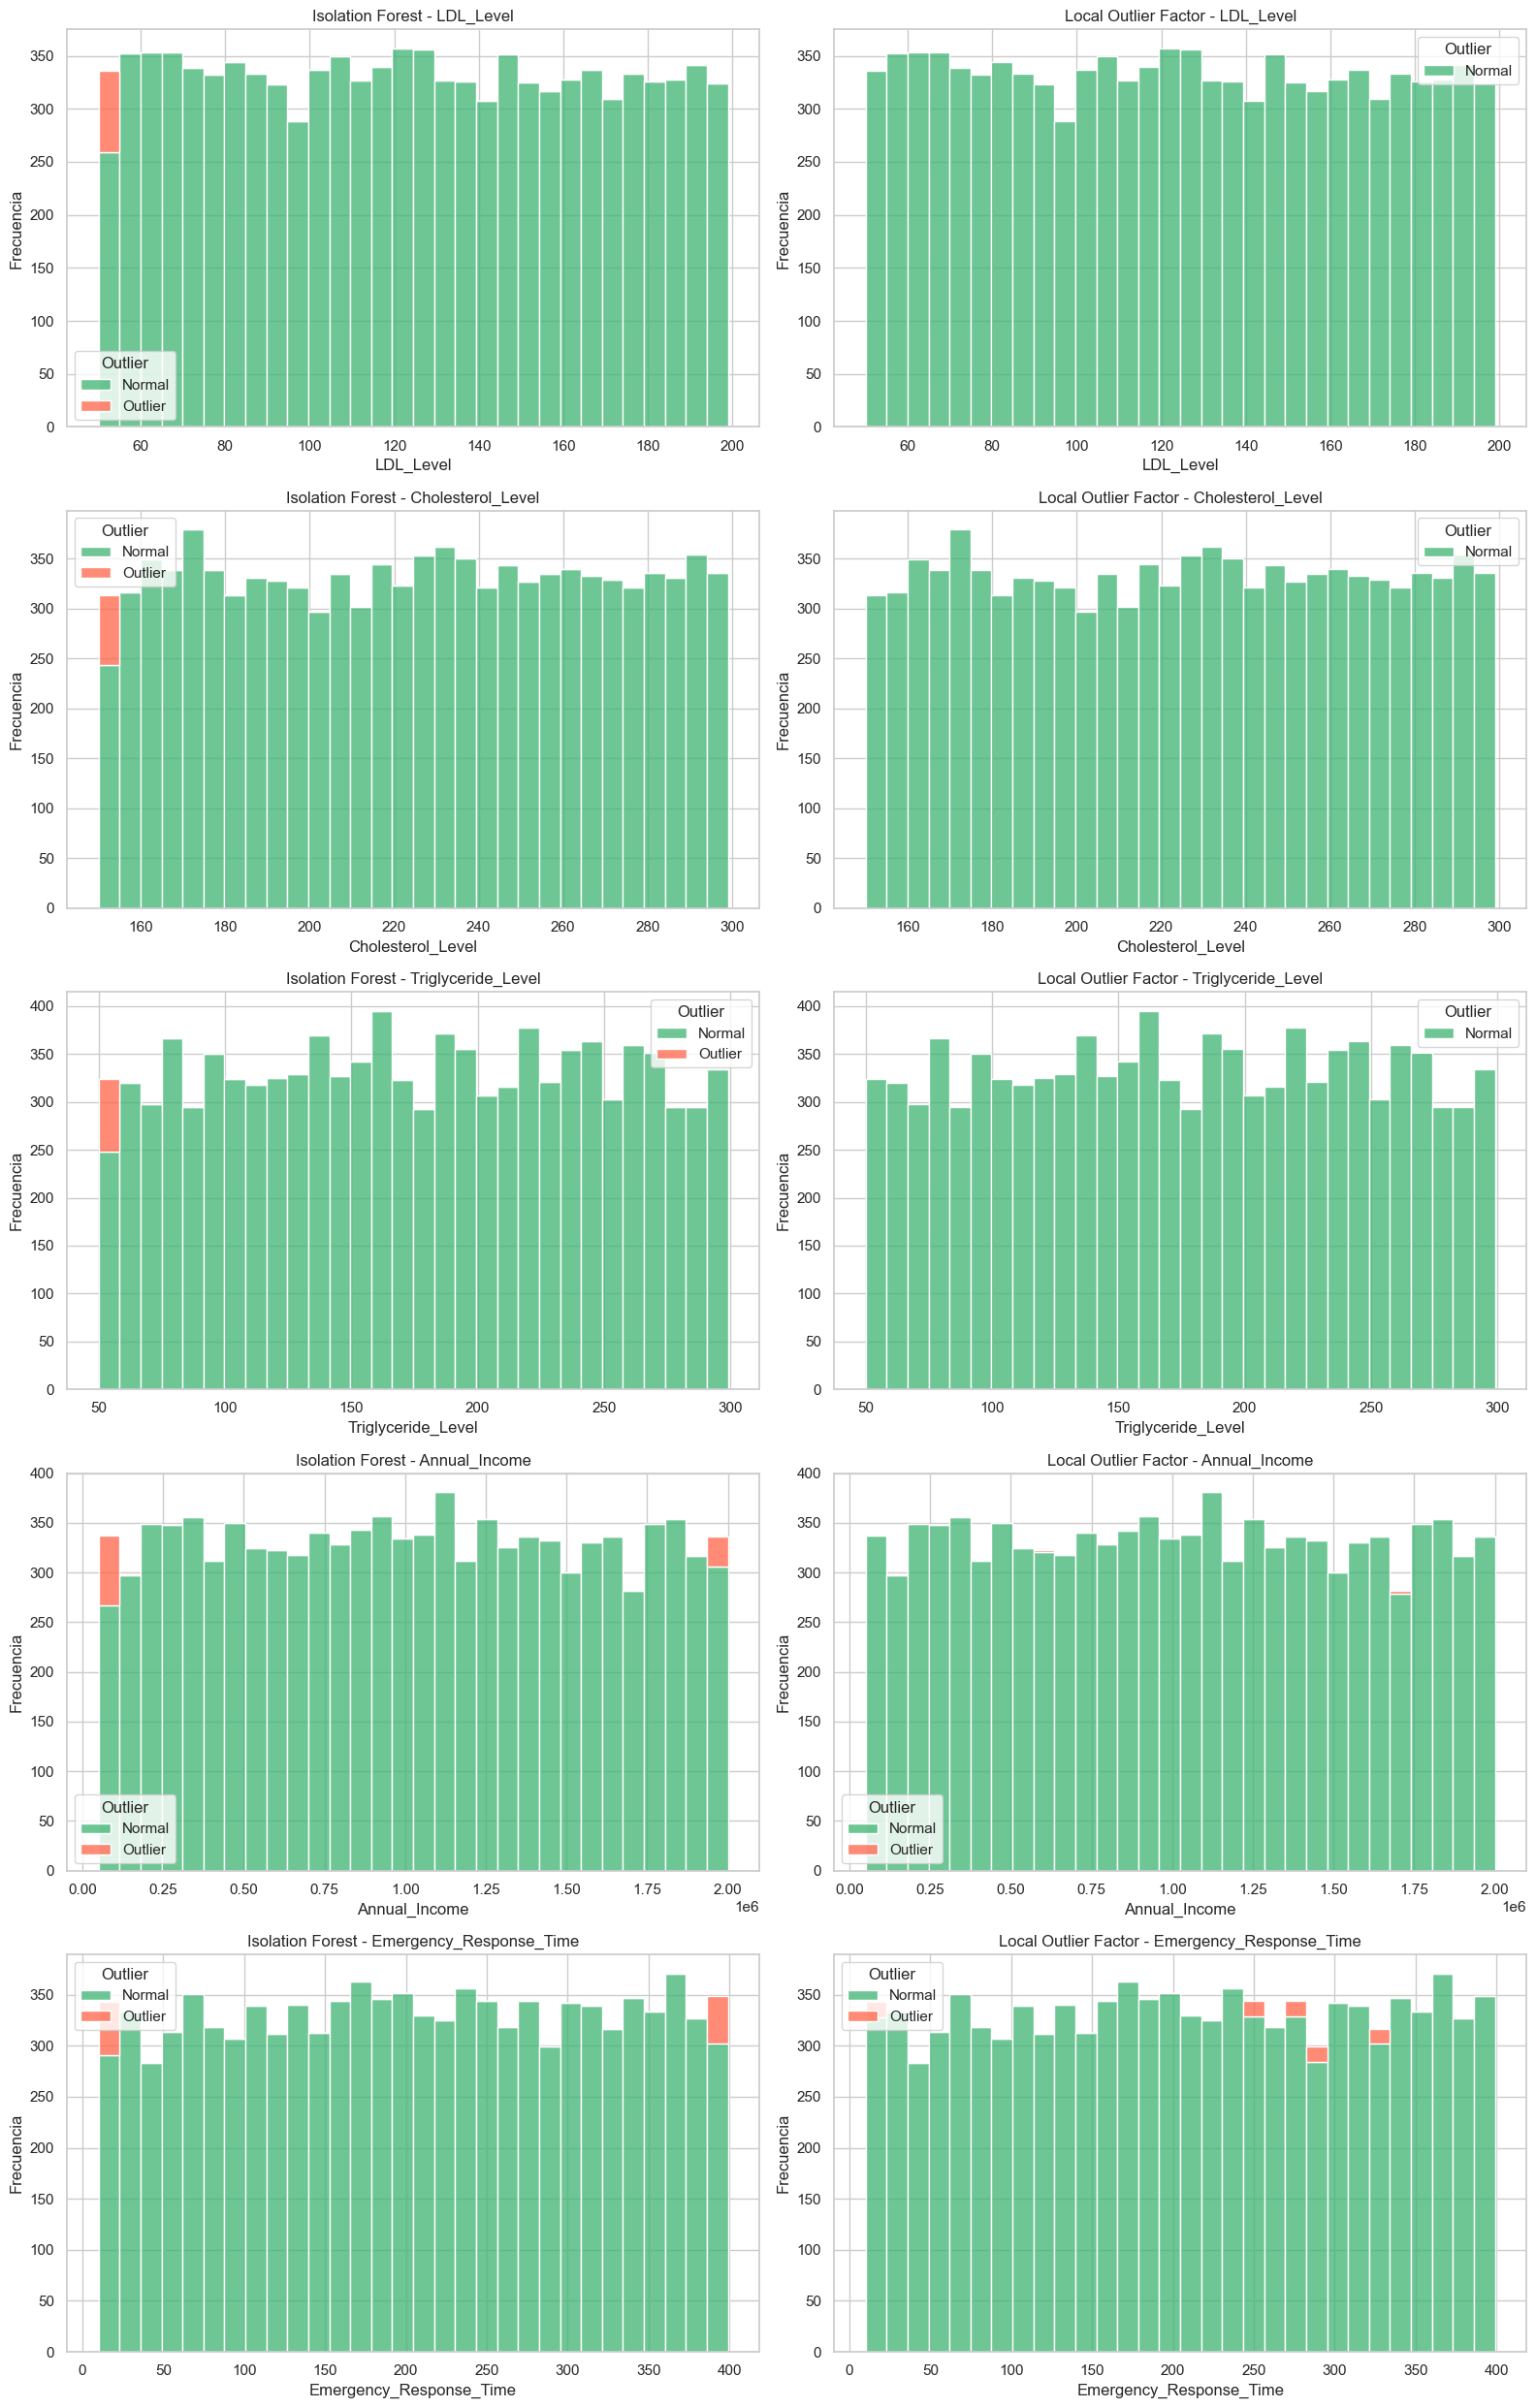

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Variables a evaluar
variables = ['LDL_Level', 'Cholesterol_Level', 'Triglyceride_Level', 'Annual_Income', 'Emergency_Response_Time']

# Crear figura con subplots (5 variables × 2 métodos = 10 subplots)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 25))
axs = axs.flatten()

# Iterar sobre cada variable y método
for i, var in enumerate(variables):
    # --- Isolation Forest ---
    df_iso = heartAttackPrediction_India[[var]].dropna().copy()
    iso = IsolationForest(contamination=0.01, random_state=42)
    df_iso['outlier'] = iso.fit_predict(df_iso[[var]])
    
    sns.histplot(
        data=df_iso, x=var, hue='outlier', multiple='stack',
        palette={1: 'mediumseagreen', -1: 'tomato'}, bins=30, ax=axs[i*2]
    )
    axs[i*2].set_title(f'Isolation Forest - {var}')
    axs[i*2].set_ylabel('Frecuencia')
    axs[i*2].legend(title='Outlier', labels=['Normal', 'Outlier'])

    # --- Local Outlier Factor ---
    df_lof = heartAttackPrediction_India[[var]].dropna().copy()
    lof = LocalOutlierFactor(n_neighbors=15)
    df_lof['outlier'] = lof.fit_predict(df_lof[[var]])

    sns.histplot(
        data=df_lof, x=var, hue='outlier', multiple='stack',
        palette={1: 'mediumseagreen', -1: 'tomato'}, bins=30, ax=axs[i*2+1]
    )
    axs[i*2+1].set_title(f'Local Outlier Factor - {var}')
    axs[i*2+1].set_ylabel('Frecuencia')
    axs[i*2+1].legend(title='Outlier', labels=['Normal', 'Outlier'])

plt.tight_layout()
plt.show()


---
---
---
---

## **Distribucion de las Variables**

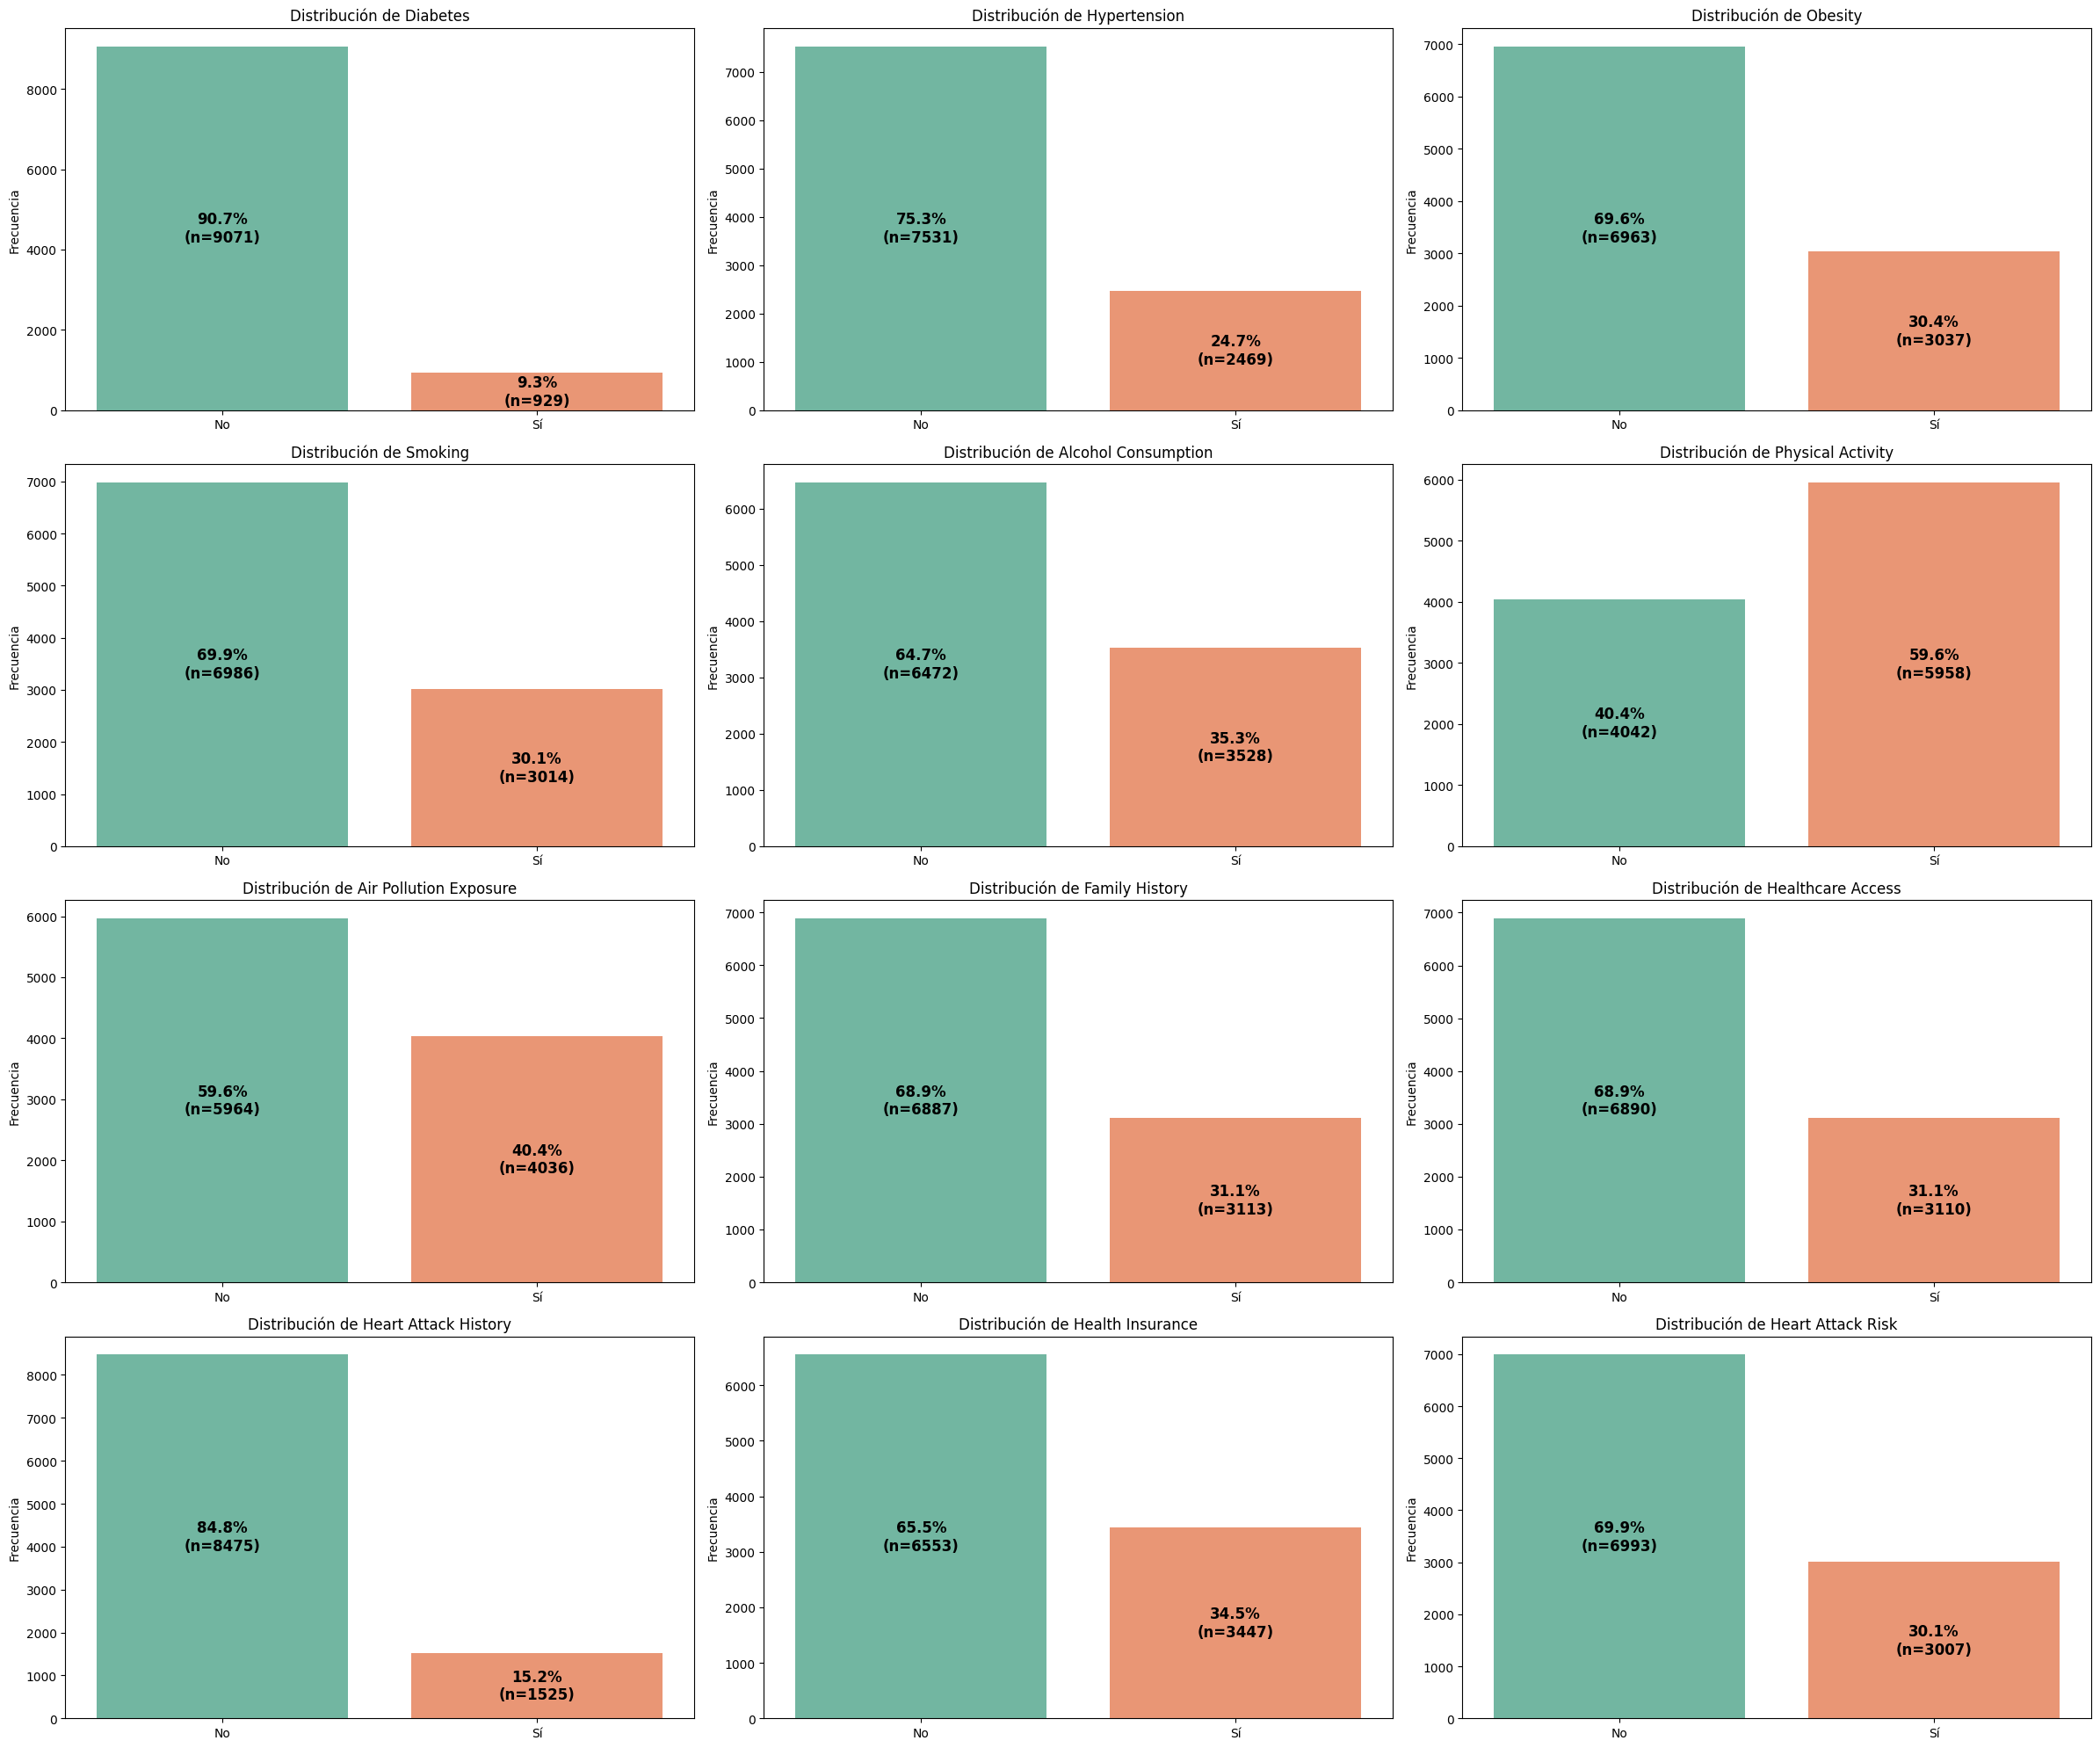

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Crear figura y ejes
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

# Total de registros
total = len(heartAttackPrediction_India)

# Recorrer variables
for i, var in enumerate(binary_vars):
    ax = axs[i]
    data = heartAttackPrediction_India[var].value_counts().sort_index()
    bars = sns.barplot(x=data.index, y=data.values, palette='Set2', ax=ax)

    ax.set_title(f'Distribución de {var.replace("_", " ")}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Añadir porcentaje y n dentro de cada barra
    for j, count in enumerate(data.values):
        percentage = count / total * 100
        ax.text(j, count / 2,
                f'{percentage:.1f}%\n(n={count})',
                ha='center', va='center',
                fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

#### **POR GENERO**

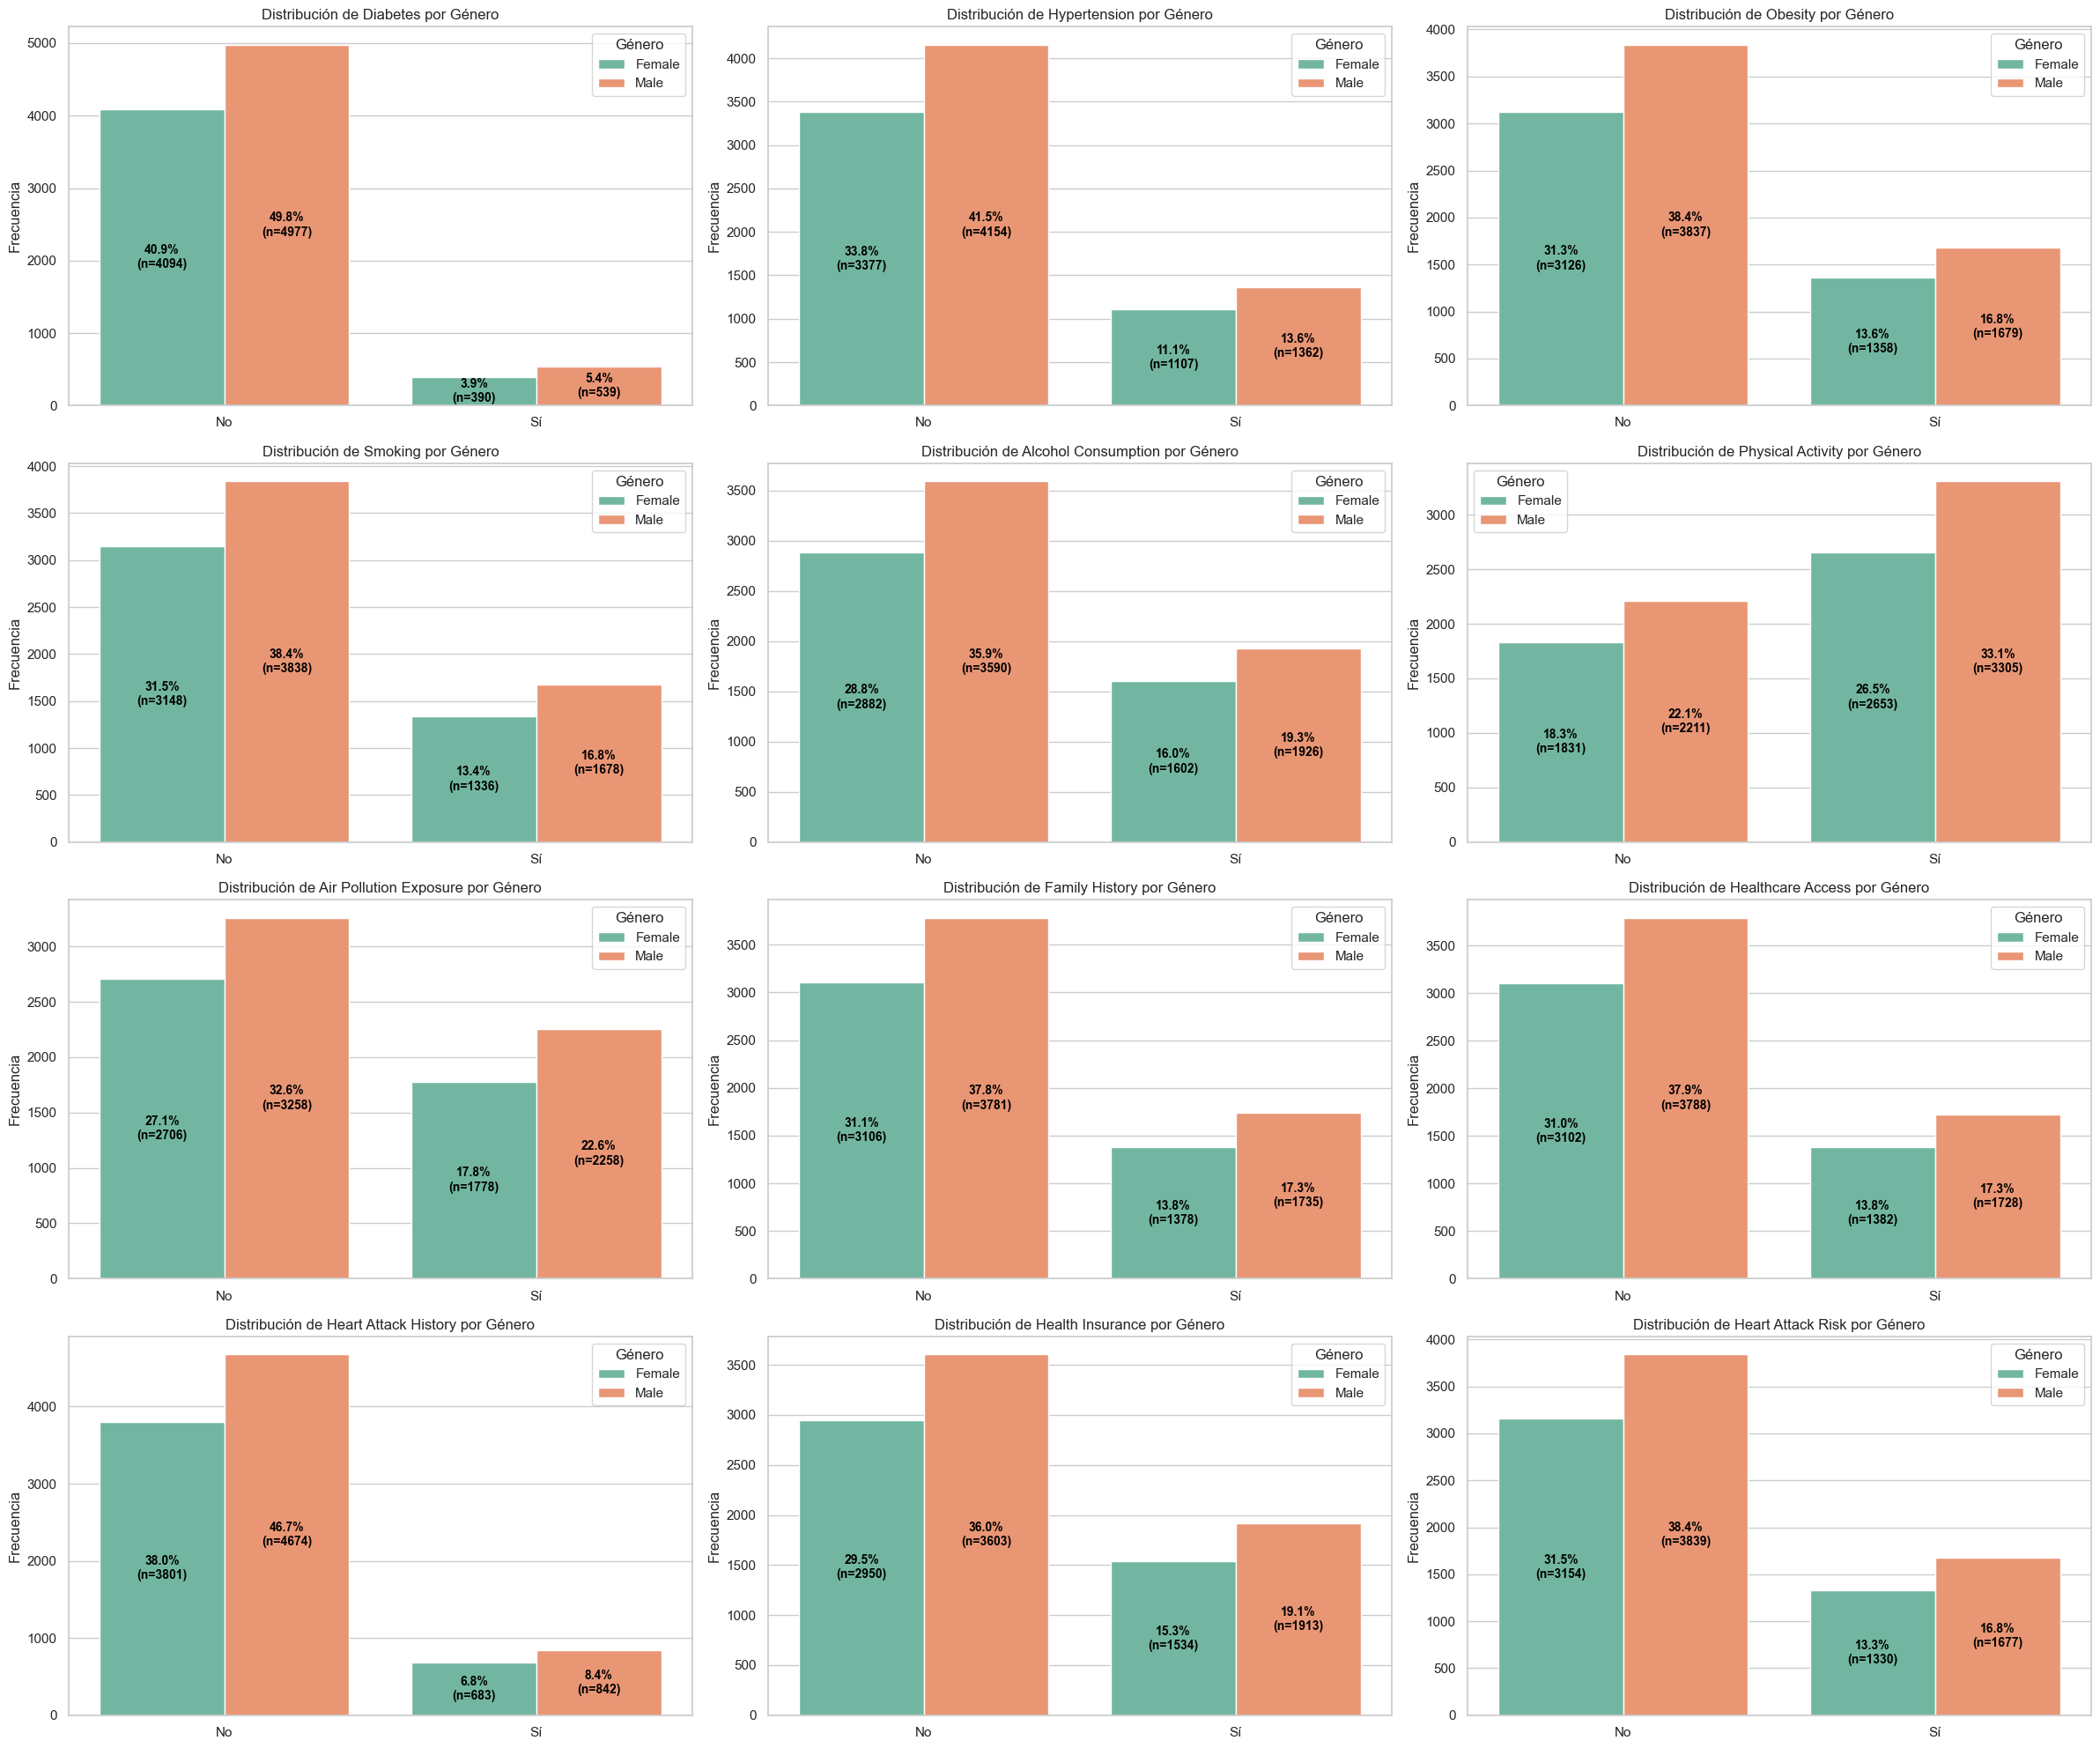

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Paleta fija: Female = verde, Male = naranja
gender_palette = {'Female': '#66c2a5', 'Male': '#fc8d62'}

# Total de pacientes
total_patients = len(heartAttackPrediction_India)

# Crear figura
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

for i, var in enumerate(binary_vars):
    ax = axs[i]

    # Agrupar y calcular porcentaje
    grouped = (
        heartAttackPrediction_India
        .groupby([var, 'Gender'])
        .size()
        .reset_index(name='count')
    )
    grouped['percentage'] = (grouped['count'] / total_patients * 100).round(1)

    # Asegurar orden correcto de categorías
    grouped[var] = pd.Categorical(grouped[var], categories=[0, 1], ordered=True)
    grouped['Gender'] = pd.Categorical(grouped['Gender'], categories=['Female', 'Male'], ordered=True)

    # Gráfico
    sns.barplot(data=grouped, x=var, y='count', hue='Gender', palette=gender_palette, ax=ax)
    ax.set_title(f'Distribución de {var.replace("_", " ")} por Género')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Ajustar manualmente la leyenda con el orden correcto
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=[handles[0], handles[1]], labels=['Female', 'Male'], title='Género')

    # Añadir etiquetas
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f'{(height / total_patients) * 100:.1f}%\n(n={int(height)})',
                    ha='center', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

---
---

### **POR RIESGO DE ATAQUE AL CORAZÓN**

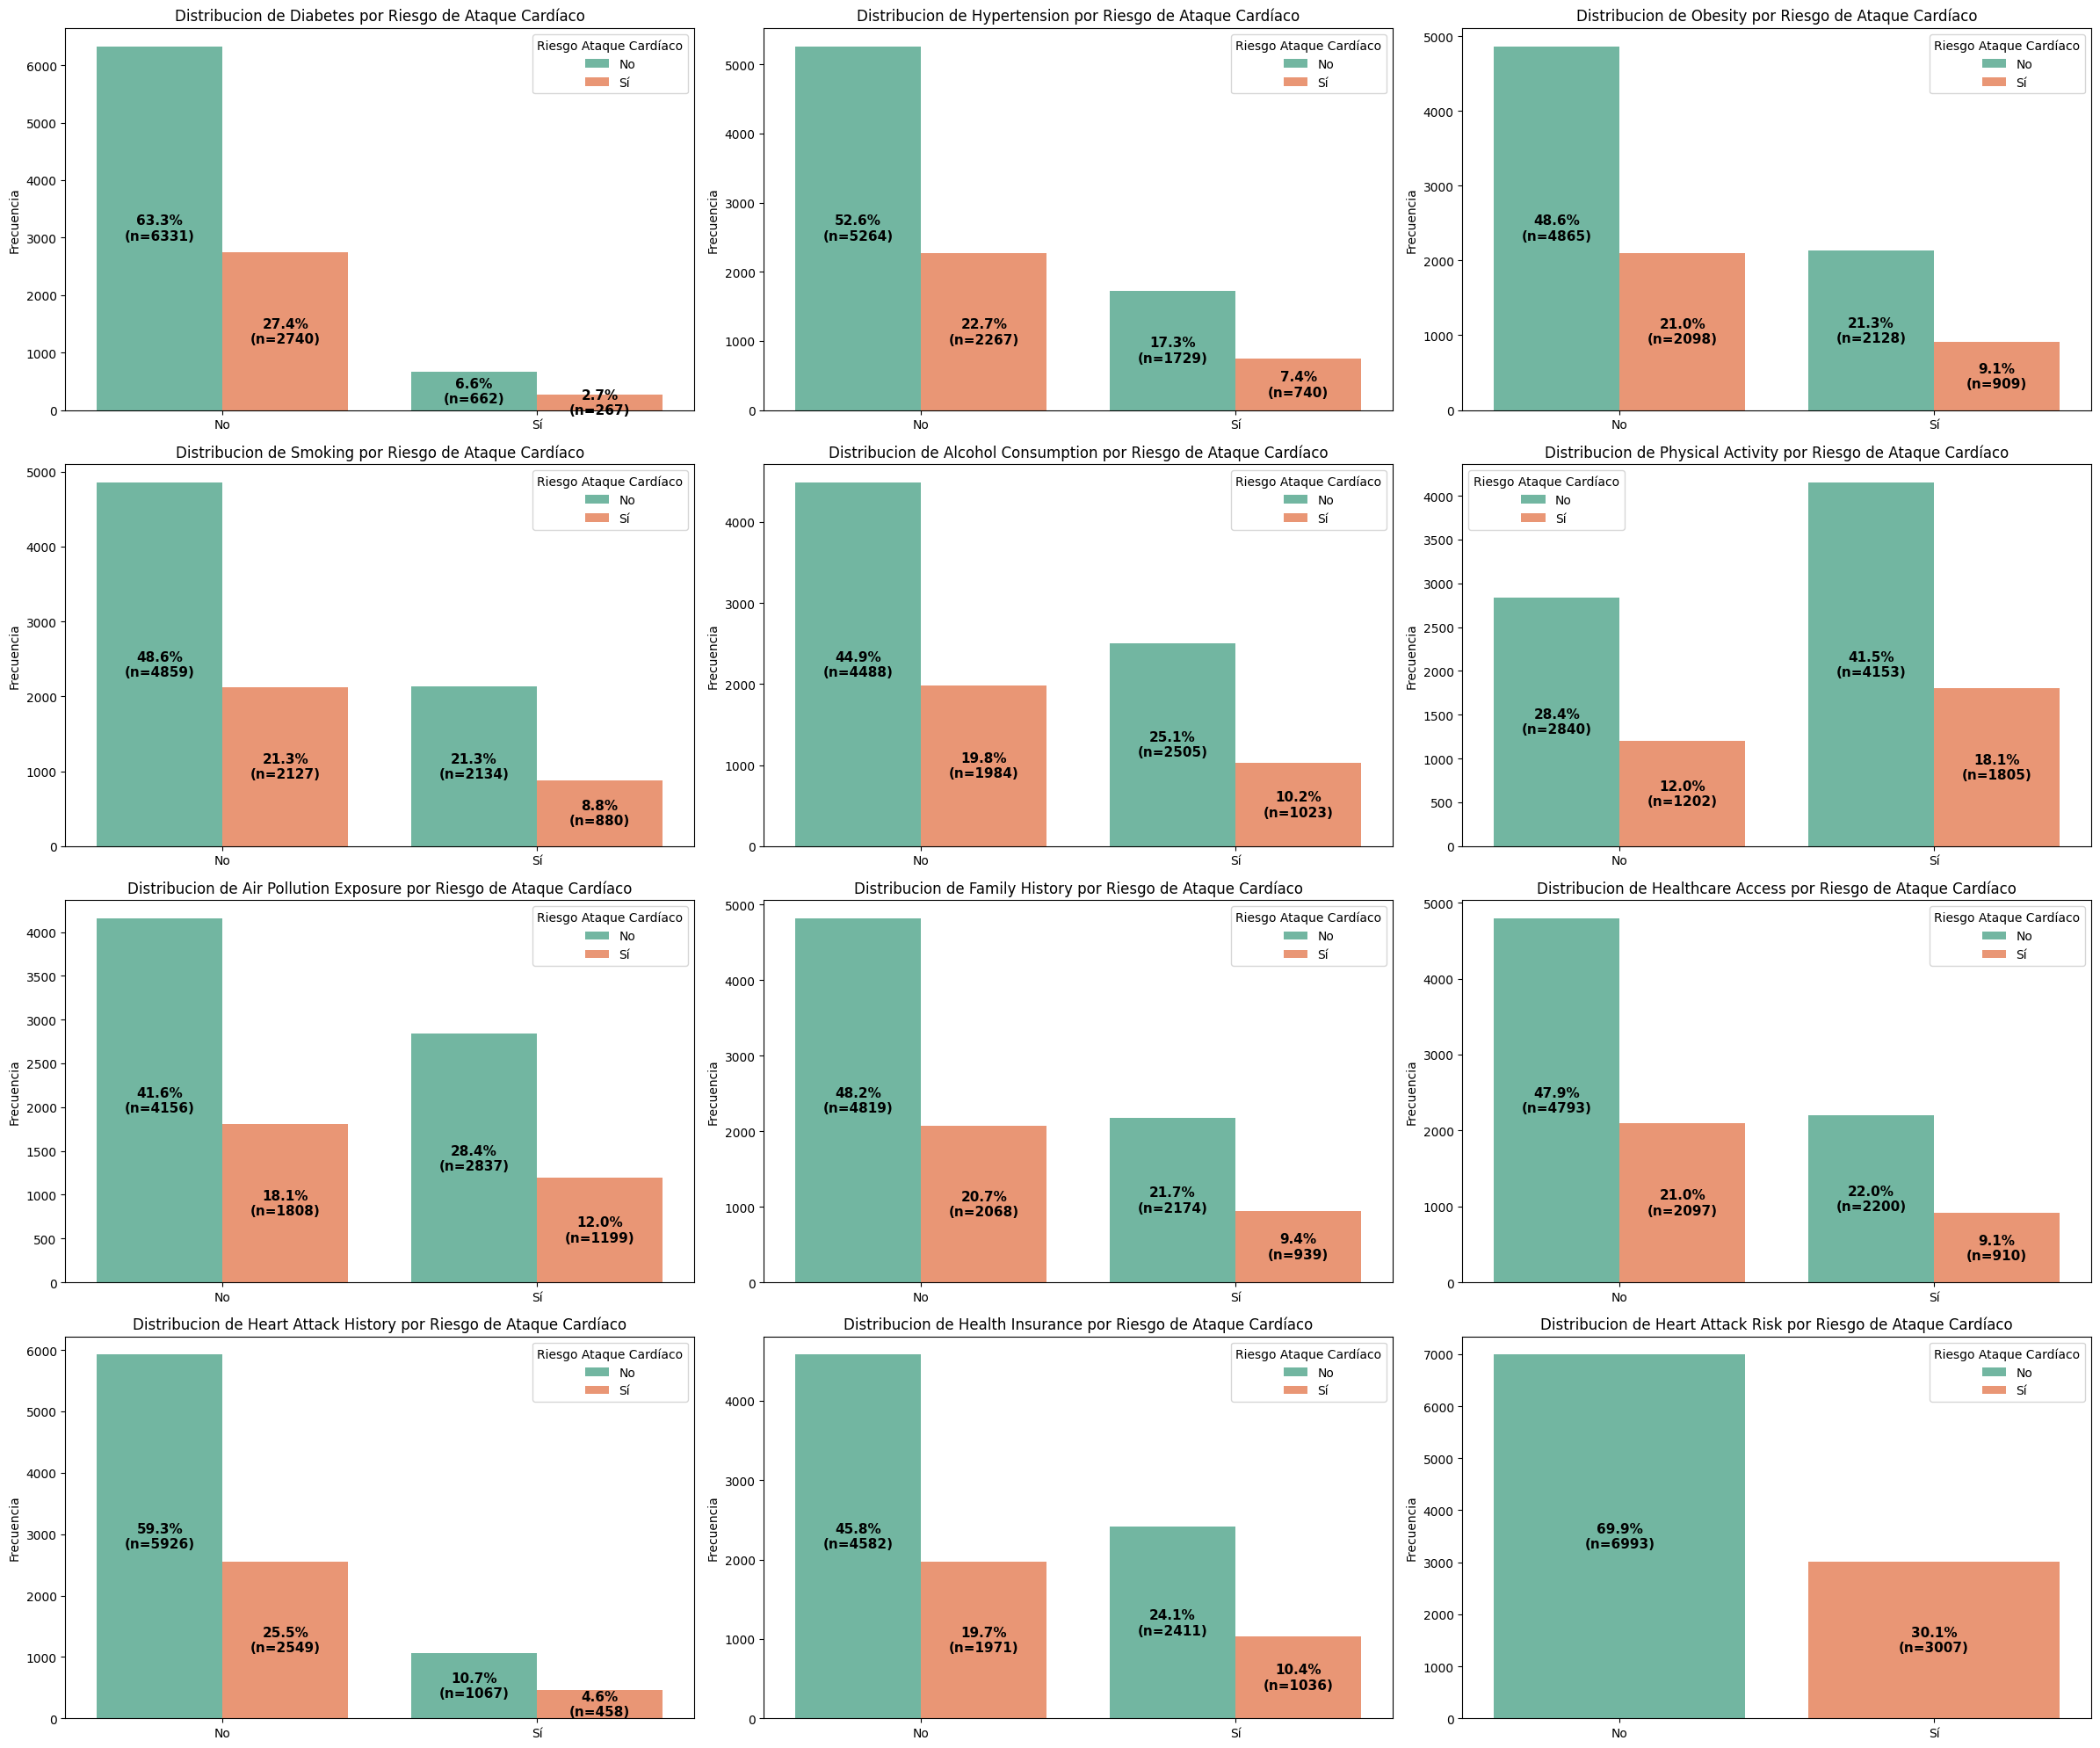

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Crear figura
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

# Conteo total de pacientes
total_patients = len(heartAttackPrediction_India)

for i, var in enumerate(binary_vars):
    ax = axs[i]

    sns.countplot(data=heartAttackPrediction_India, x=var, hue='Heart_Attack_Risk', palette='Set2', ax=ax)
    ax.set_title(f'Distribucion de {var.replace("_", " ")} por Riesgo de Ataque Cardíaco')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Riesgo Ataque Cardíaco', labels=['No', 'Sí'])

    # Añadir porcentaje sobre total y número de pacientes
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            pct = height / total_patients * 100
            ax.text(x, y, f'{pct:.1f}%\n(n={int(height)})',
                    ha='center', va='center', fontsize=11,
                    color='black', weight='bold')

plt.tight_layout()
plt.show()

---
---
---
---

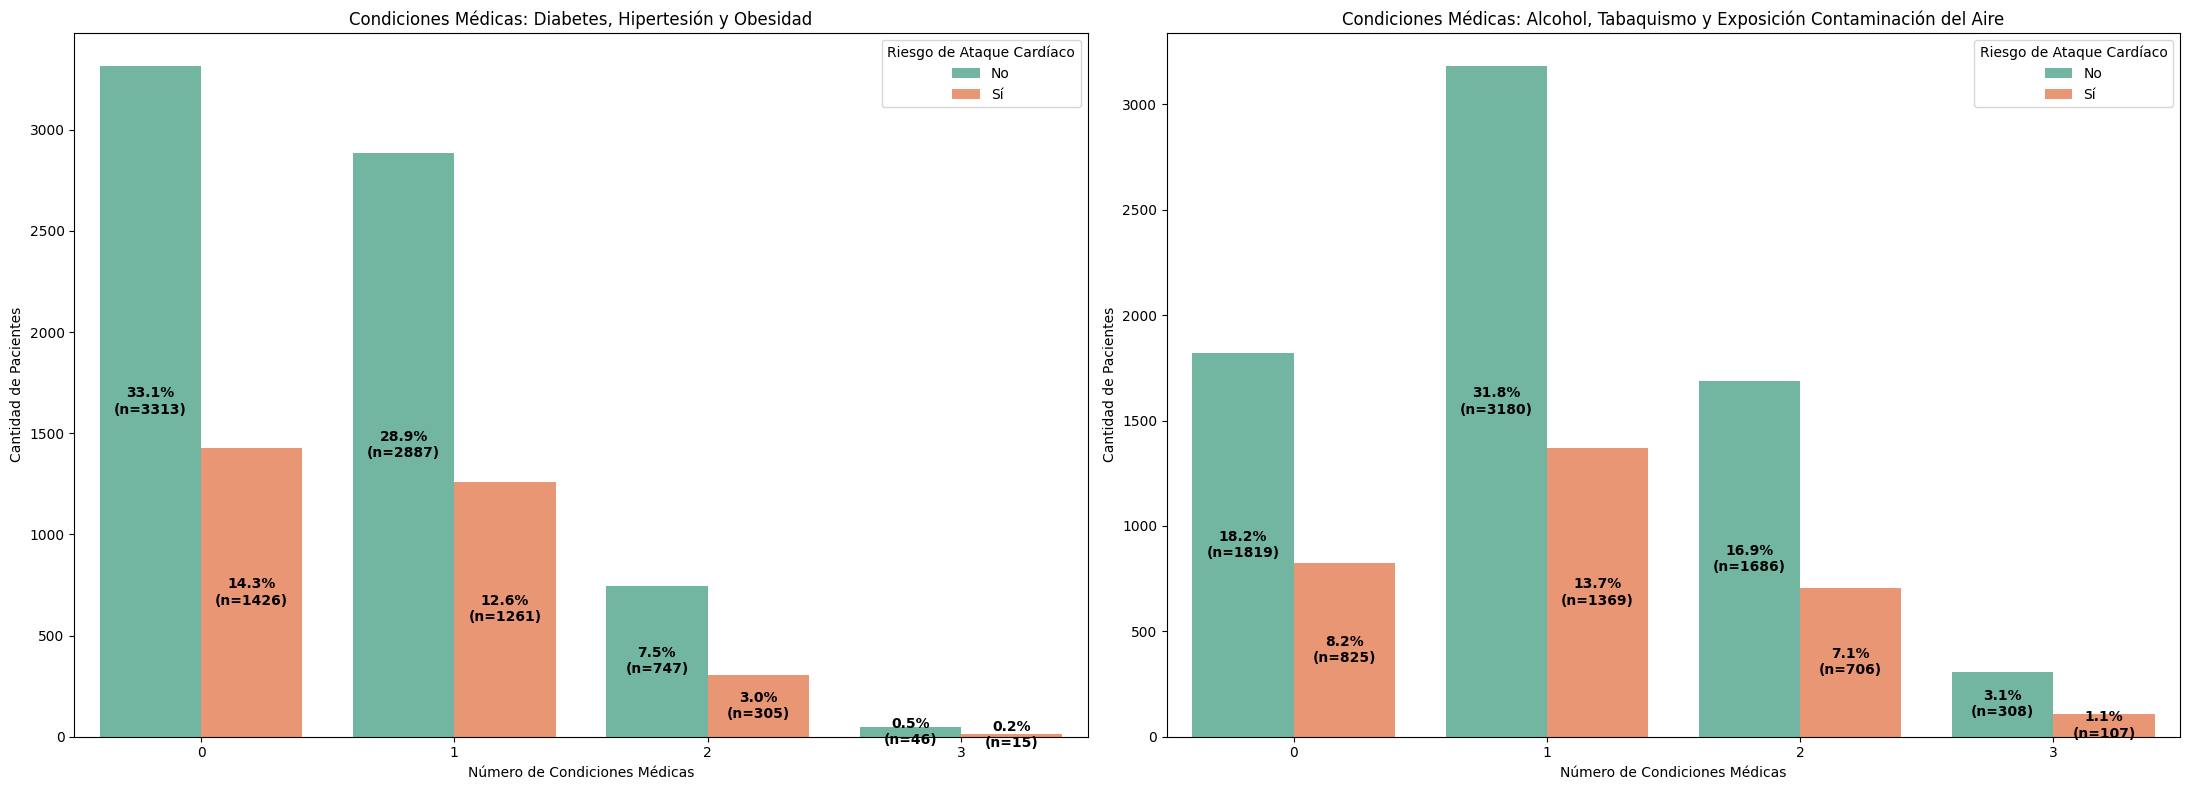

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear las variables combinadas
heartAttackPrediction_India['Condiciones_Medicas_1'] = (
    heartAttackPrediction_India['Diabetes'] + heartAttackPrediction_India['Hypertension'] + heartAttackPrediction_India['Obesity']
)
heartAttackPrediction_India['Condiciones_Medicas_2'] = (
    heartAttackPrediction_India['Alcohol_Consumption'] + heartAttackPrediction_India['Smoking'] + heartAttackPrediction_India['Air_Pollution_Exposure']
)

# Etiquetas para la leyenda
heartAttackPrediction_India['Heart_Attack_Risk_Label'] = heartAttackPrediction_India['Heart_Attack_Risk'].map({0: 'No', 1: 'Sí'})

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

# Función para graficar con etiquetas sobre el total de pacientes
def plot_bar_total_pct(ax, df, x_var, hue_var, title, xlabel, palette):
    # Agrupar datos
    grouped = df.groupby([x_var, hue_var]).size().reset_index(name='count')
    total_pacientes = grouped['count'].sum()
    grouped['percentage'] = (grouped['count'] / total_pacientes * 100).round(1)

    # Plot
    barplot = sns.barplot(data=grouped, x=x_var, y='count', hue=hue_var, palette=palette, ax=ax)

    # Añadir porcentajes y n
    for bar in barplot.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2

            # Obtener x e y originales
            cat = int(bar.get_x() + bar.get_width() / 2 + 0.5)
            label = bar.get_label()
            hue = bar.get_facecolor()

            # Determinar etiqueta 'No' o 'Sí' por el color
            hue_val = 'Sí' if hue[0] > 0.9 else 'No'

            # Buscar la fila correspondiente
            match = grouped[(grouped[x_var] == cat) & (grouped[hue_var] == hue_val)]
            if not match.empty:
                pct = match['percentage'].values[0]
                count = match['count'].values[0]
                ax.text(x, y, f'{pct:.1f}%\n(n={count})', ha='center', va='center', color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')
    ax.legend(title='Riesgo de Ataque Cardíaco', loc='upper right')

# Gráfico 1
plot_bar_total_pct(
    ax=axs[0],
    df=heartAttackPrediction_India,
    x_var='Condiciones_Medicas_1',
    hue_var='Heart_Attack_Risk_Label',
    title='Condiciones Médicas: Diabetes, Hipertesión y Obesidad',
    xlabel='Número de Condiciones Médicas',
    palette='Set2'
)

# Gráfico 2
plot_bar_total_pct(
    ax=axs[1],
    df=heartAttackPrediction_India,
    x_var='Condiciones_Medicas_2',
    hue_var='Heart_Attack_Risk_Label',
    title='Condiciones Médicas: Alcohol, Tabaquismo y Exposición Contaminación del Aire',
    xlabel='Número de Condiciones Médicas',
    palette='Set2'
)

plt.tight_layout()
plt.show()

---
---
---
---

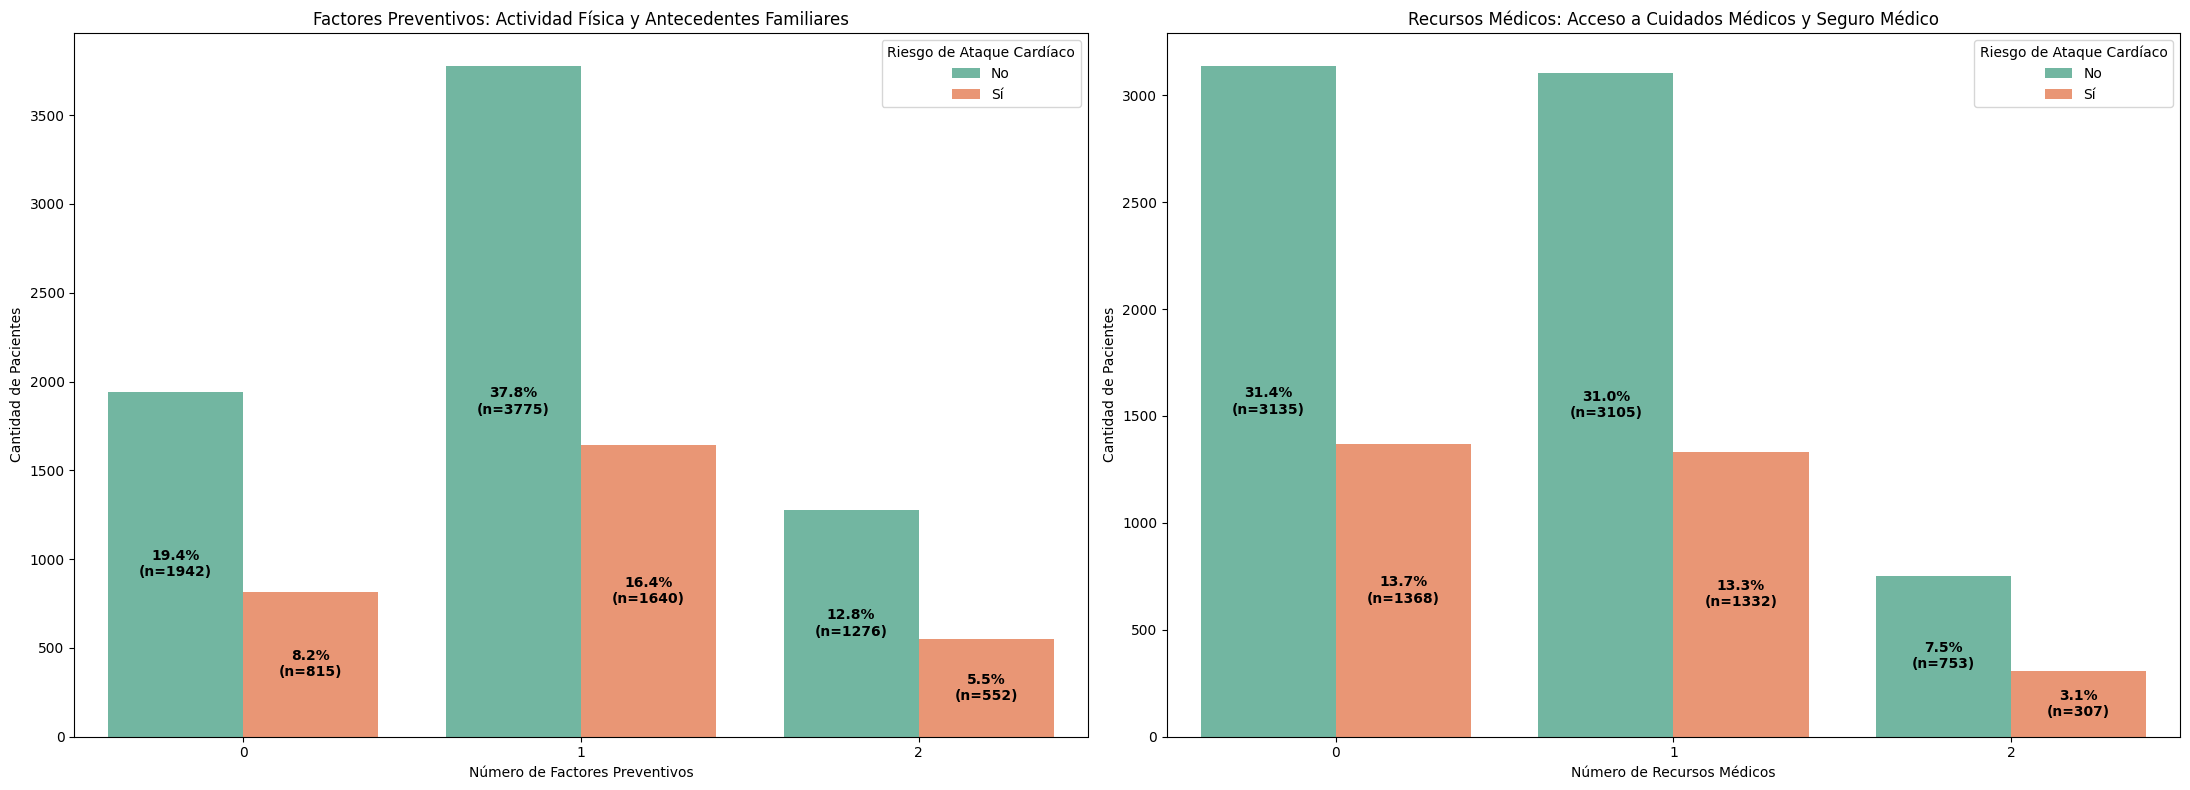

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear las variables combinadas
heartAttackPrediction_India['Factores_Preventivos'] = (
    heartAttackPrediction_India['Physical_Activity'] + heartAttackPrediction_India['Family_History']
)
heartAttackPrediction_India['Recursos_Medicos'] = (
    heartAttackPrediction_India['Healthcare_Access'] + heartAttackPrediction_India['Health_Insurance']
)

# Etiquetas para la leyenda
heartAttackPrediction_India['Heart_Attack_Risk_Label'] = heartAttackPrediction_India['Heart_Attack_Risk'].map({0: 'No', 1: 'Sí'})

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

# Función para graficar con etiquetas sobre el total de pacientes
def plot_bar_total_pct(ax, df, x_var, hue_var, title, xlabel, palette):
    # Agrupar datos
    grouped = df.groupby([x_var, hue_var]).size().reset_index(name='count')
    total_pacientes = grouped['count'].sum()
    grouped['percentage'] = (grouped['count'] / total_pacientes * 100).round(1)

    # Plot
    barplot = sns.barplot(data=grouped, x=x_var, y='count', hue=hue_var, palette=palette, ax=ax)

    # Añadir porcentajes y n
    for bar in barplot.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2

            # Obtener x e y originales
            cat = int(bar.get_x() + bar.get_width() / 2 + 0.5)
            label = bar.get_label()
            hue = bar.get_facecolor()

            # Determinar etiqueta 'No' o 'Sí' por el color
            hue_val = 'Sí' if hue[0] > 0.9 else 'No'

            # Buscar la fila correspondiente
            match = grouped[(grouped[x_var] == cat) & (grouped[hue_var] == hue_val)]
            if not match.empty:
                pct = match['percentage'].values[0]
                count = match['count'].values[0]
                ax.text(x, y, f'{pct:.1f}%\n(n={count})', ha='center', va='center', color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')
    ax.legend(title='Riesgo de Ataque Cardíaco', loc='upper right')

# Gráfico 1
plot_bar_total_pct(
    ax=axs[0],
    df=heartAttackPrediction_India,
    x_var='Factores_Preventivos',
    hue_var='Heart_Attack_Risk_Label',
    title='Factores Preventivos: Actividad Física y Antecedentes Familiares',
    xlabel='Número de Factores Preventivos',
    palette='Set2'
)

# Gráfico 2
plot_bar_total_pct(
    ax=axs[1],
    df=heartAttackPrediction_India,
    x_var='Recursos_Medicos',
    hue_var='Heart_Attack_Risk_Label',
    title='Recursos Médicos: Acceso a Cuidados Médicos y Seguro Médico',
    xlabel='Número de Recursos Médicos',
    palette='Set2'
)

plt.tight_layout()
plt.show()

---
---
---
---

## **Distribucion por Estados de la India**

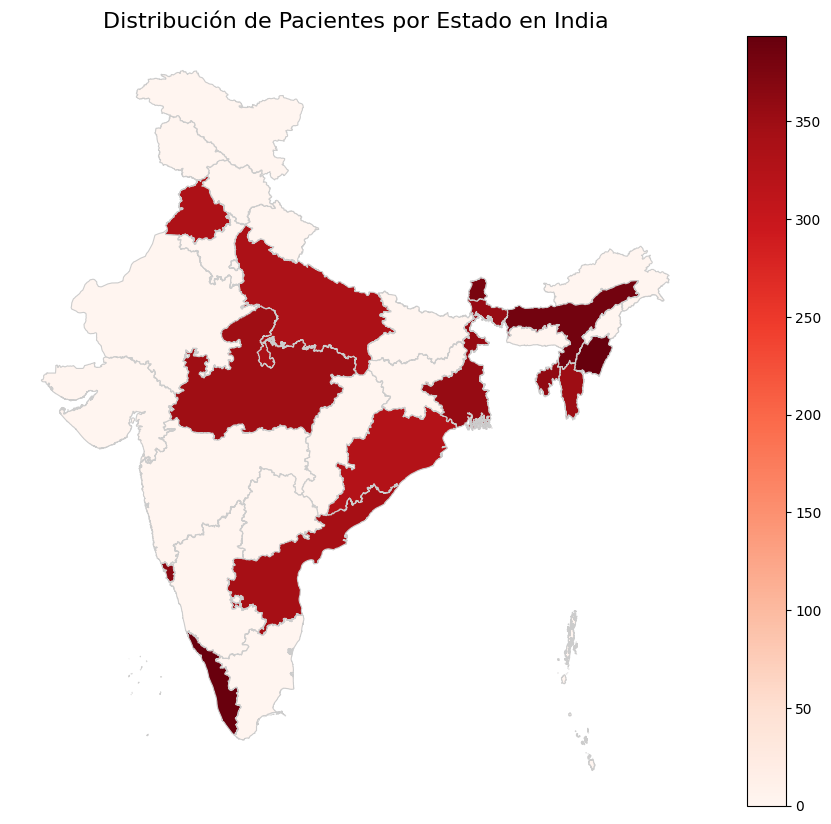

In [185]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar shapefile
shapefile_path = '../Codigo/geoBoundaries-IND-ADM1-all/geoBoundaries-IND-ADM1.shp'
india_states = gpd.read_file(shapefile_path)

# 2. Agrupar tus datos reales por estado
state_counts = heartAttackPrediction_India['State_Name'].value_counts().reset_index()
state_counts.columns = ['State_Name', 'Patient_Count']

# 3. Asegurar consistencia en los nombres
india_states['shapeName'] = india_states['shapeName'].str.lower().str.strip()
state_counts['State_Name'] = state_counts['State_Name'].str.lower().str.strip()

# 4. Unir los datos de pacientes con el mapa
merged = india_states.merge(state_counts, left_on='shapeName', right_on='State_Name', how='left')
merged['Patient_Count'] = merged['Patient_Count'].fillna(0)

# 5. Graficar heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Patient_Count',
            cmap='Reds',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True)
ax.set_title('Distribución de Pacientes por Estado en India', fontsize=16)
ax.axis('off')

plt.show()

In [183]:
print(india_states.columns)

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


In [186]:
# Mostrar todos los estados únicos del dataset
estados_unicos = heartAttackPrediction_India['State_Name'].unique()
print("Estados únicos en el dataset:")
for estado in sorted(estados_unicos):
    print(f"- {estado}")


Estados únicos en el dataset:
- Andhra Pradesh
- Arunachal Pradesh
- Assam
- Bihar
- Chhattisgarh
- Goa
- Gujarat
- Haryana
- Himachal Pradesh
- Jharkhand
- Karnataka
- Kerala
- Madhya Pradesh
- Maharashtra
- Manipur
- Meghalaya
- Mizoram
- Nagaland
- Odisha
- Punjab
- Rajasthan
- Sikkim
- Tamil Nadu
- Telangana
- Tripura
- Uttar Pradesh
- Uttarakhand
- West Bengal


In [187]:
# Conteo de pacientes por estado
conteo_estados = heartAttackPrediction_India['State_Name'].value_counts()
print("Cantidad de pacientes por estado:")
print(conteo_estados)

Cantidad de pacientes por estado:
State_Name
Chhattisgarh         399
Meghalaya            396
Manipur              394
Arunachal Pradesh    392
Kerala               392
Assam                384
Sikkim               379
Goa                  366
Bihar                365
Karnataka            362
Tripura              361
Maharashtra          359
West Bengal          357
Telangana            356
Uttarakhand          350
Mizoram              350
Tamil Nadu           349
Madhya Pradesh       348
Nagaland             347
Himachal Pradesh     347
Andhra Pradesh       342
Haryana              338
Uttar Pradesh        335
Punjab               333
Rajasthan            326
Odisha               326
Gujarat              324
Jharkhand            323
Name: count, dtype: int64


---
---
---
---

## **Pie Charts** 

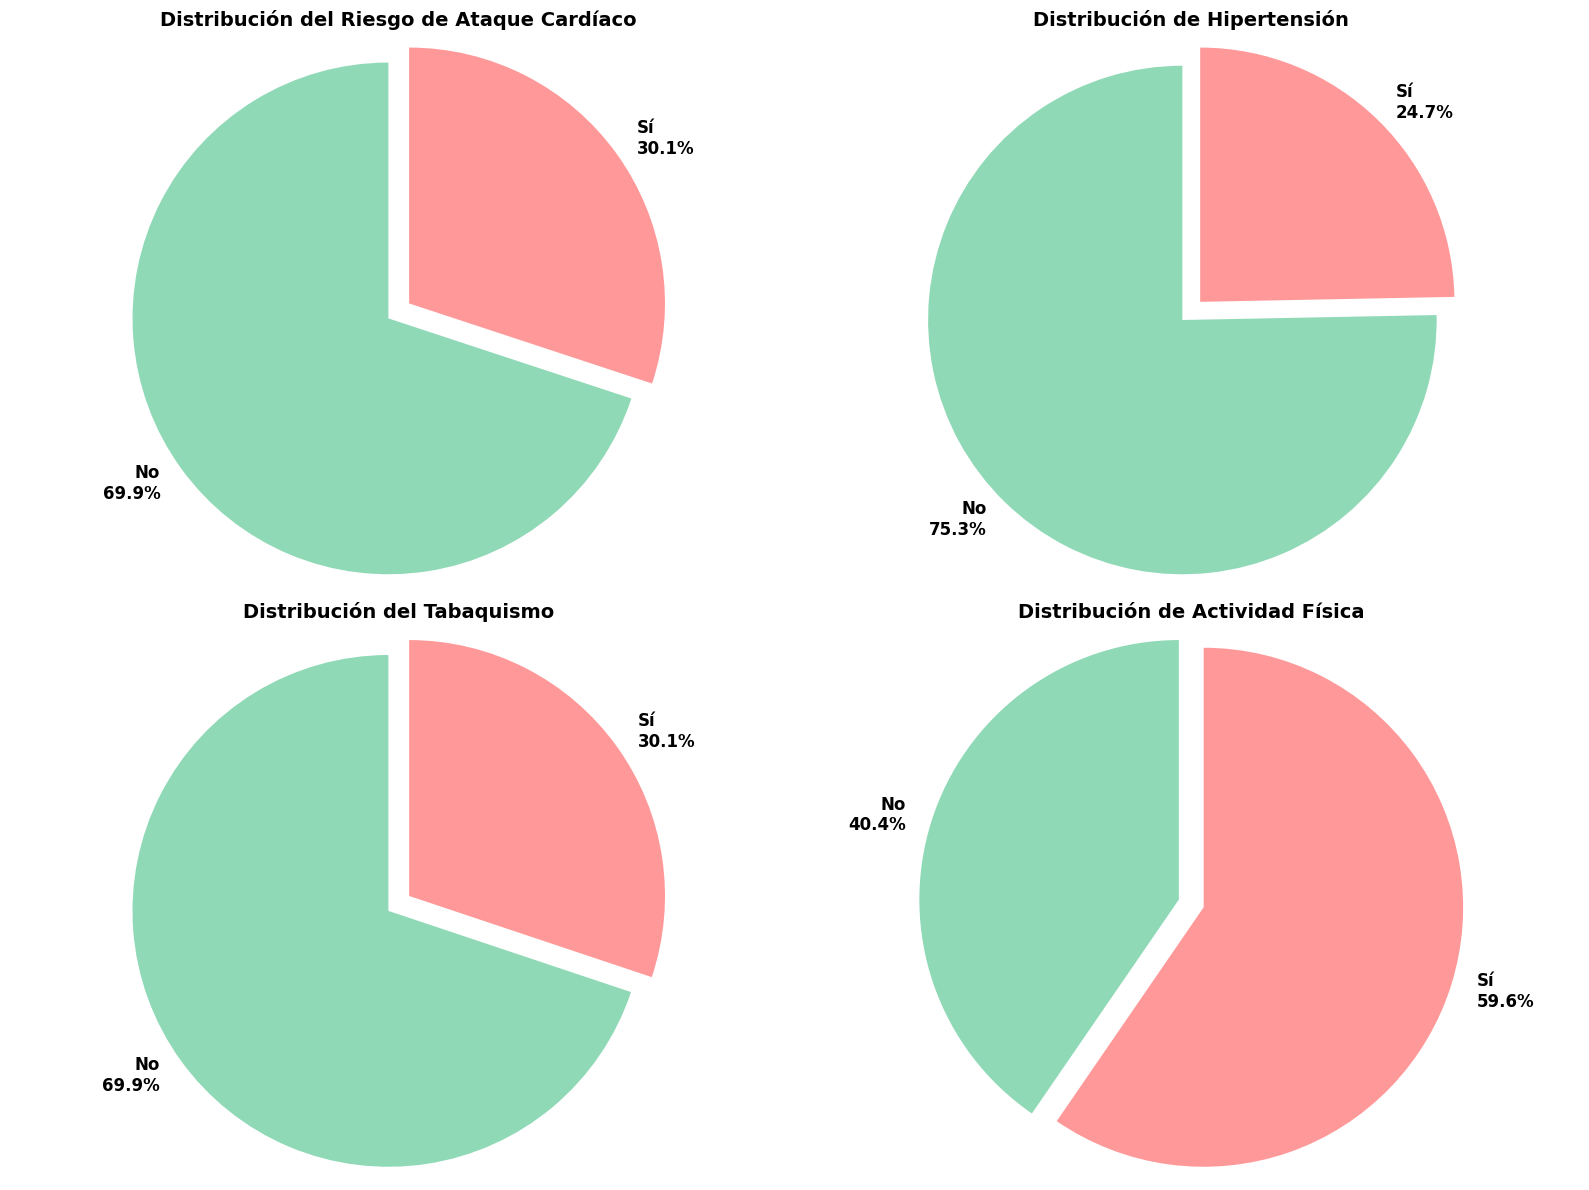

In [188]:
import matplotlib.pyplot as plt

# Variables seleccionadas
vars_pie = ['Heart_Attack_Risk', 'Hypertension', 'Smoking', 'Physical_Activity']
titles = [
    'Distribución del Riesgo de Ataque Cardíaco',
    'Distribución de Hipertensión',
    'Distribución del Tabaquismo',
    'Distribución de Actividad Física'
]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, var in enumerate(vars_pie):
    counts = heartAttackPrediction_India[var].value_counts().sort_index()
    labels = ['No', 'Sí']
    sizes = counts.values
    explode = (0.05, 0.05)  # separa ambas secciones para destacarlas
    colors = ['#8fd9b6', '#ff9999']  # verde claro / rosa

    axs[i].pie(
        sizes,
        labels=[f'{l}\n{p:.1f}%' for l, p in zip(labels, sizes / sizes.sum() * 100)],
        autopct=None,
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    axs[i].axis('equal')
    axs[i].set_title(titles[i], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
---
---
---

## **Ataques Cardiacos por ...**

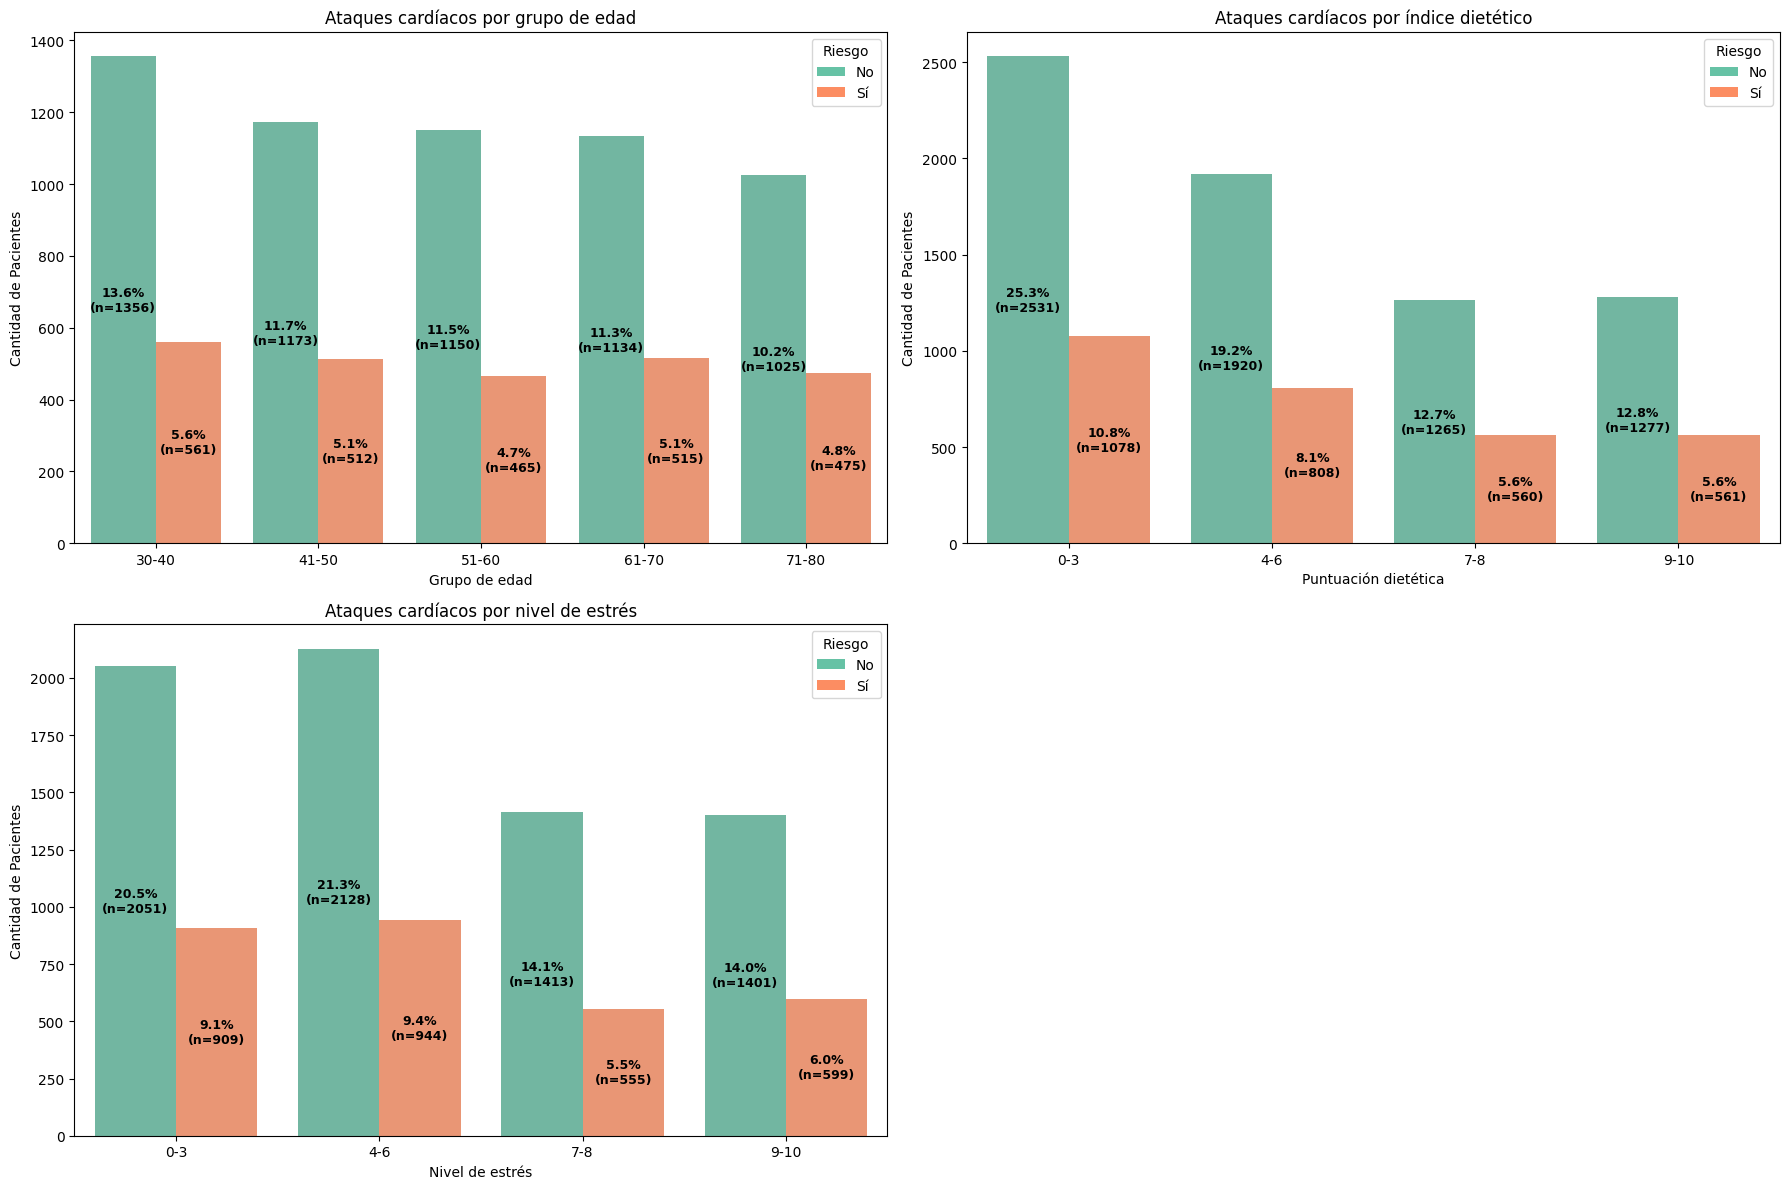

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Crear nuevas columnas de rangos categorizados
heartAttackPrediction_India['Age_Group'] = pd.cut(
    heartAttackPrediction_India['Age'],
    bins=[29, 40, 50, 60, 70, 80],
    labels=['30-40', '41-50', '51-60', '61-70', '71-80'],
    right=True
)

heartAttackPrediction_India['Diet_Score_Group'] = pd.cut(
    heartAttackPrediction_India['Diet_Score'],
    bins=[-1, 3, 6, 8, 10],
    labels=['0-3', '4-6', '7-8', '9-10'],
    right=True
)

heartAttackPrediction_India['Stress_Level_Group'] = pd.cut(
    heartAttackPrediction_India['Stress_Level'],
    bins=[-1, 3, 6, 8, 10],
    labels=['0-3', '4-6', '7-8', '9-10'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Crear figura 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

# Función para graficar con porcentajes y n
def plot_with_percentages(ax, x_col, title, xlabel, palette):
    data = heartAttackPrediction_India.copy()
    grouped = data.groupby([x_col, 'Heart_Attack_Risk']).size().reset_index(name='count')

    # Gráfico
    sns.barplot(data=grouped, x=x_col, y='count', hue='Heart_Attack_Risk', palette=palette, ax=ax)

    # Etiquetas dentro de las barras
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2
                ax.text(x, y, f"{(height / total_pacientes) * 100:.1f}%\n(n={int(height)})",
                        ha='center', va='center', fontsize=9, color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')

    # Crear leyenda personalizada con los colores reales de 'Set2'
    legend_elements = [
        Patch(facecolor=sns.color_palette(palette)[0], label='No'),
        Patch(facecolor=sns.color_palette(palette)[1], label='Sí')
    ]
    ax.legend(handles=legend_elements, title='Riesgo')

# Gráficos en 3 de los 4 espacios
plot_with_percentages(axs[0], 'Age_Group', 'Ataques cardíacos por grupo de edad', 'Grupo de edad', 'Set2')
plot_with_percentages(axs[1], 'Diet_Score_Group', 'Ataques cardíacos por índice dietético', 'Puntuación dietética', 'Set2')
plot_with_percentages(axs[2], 'Stress_Level_Group', 'Ataques cardíacos por nivel de estrés', 'Nivel de estrés', 'Set2')

# Dejar el cuarto gráfico vacío
axs[3].axis('off')

plt.tight_layout()
plt.show()

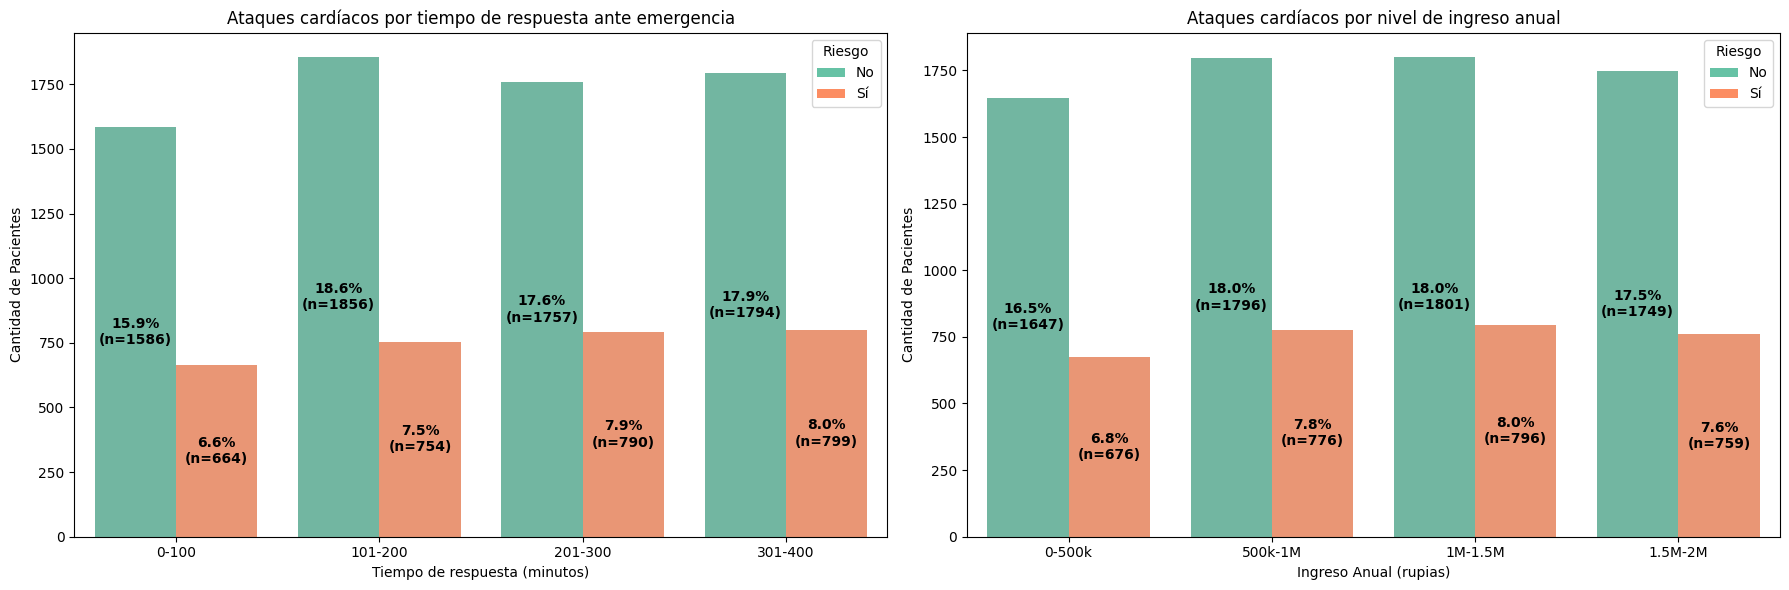

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Crear columnas categorizadas para cada variable
heartAttackPrediction_India['Response_Time_Group'] = pd.cut(
    heartAttackPrediction_India['Emergency_Response_Time'],
    bins=[-1, 100, 200, 300, 400],
    labels=['0-100', '101-200', '201-300', '301-400'],
    right=True
)

heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[-1, 500000, 1000000, 1500000, 2000000],
    labels=['0-500k', '500k-1M', '1M-1.5M', '1.5M-2M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Crear figura 2x2
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs = axs.flatten()

# Función para graficar
def plot_with_percentages(ax, x_col, title, xlabel, palette):
    data = heartAttackPrediction_India.copy()
    grouped = data.groupby([x_col, 'Heart_Attack_Risk']).size().reset_index(name='count')

    # Gráfico
    sns.barplot(data=grouped, x=x_col, y='count', hue='Heart_Attack_Risk', palette=palette, ax=ax)

    # Etiquetas dentro de las barras
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2
                ax.text(x, y, f"{(height / total_pacientes) * 100:.1f}%\n(n={int(height)})",
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')

    # Leyenda personalizada
    legend_elements = [
        Patch(facecolor=sns.color_palette(palette)[0], label='No'),
        Patch(facecolor=sns.color_palette(palette)[1], label='Sí')
    ]
    ax.legend(handles=legend_elements, title='Riesgo')

# Gráfico 1: Tiempo de respuesta ante emergencia
plot_with_percentages(
    ax=axs[0],
    x_col='Response_Time_Group',
    title='Ataques cardíacos por tiempo de respuesta ante emergencia',
    xlabel='Tiempo de respuesta (minutos)',
    palette='Set2'
)

# Gráfico 2: Ingreso anual
plot_with_percentages(
    ax=axs[1],
    x_col='Income_Group',
    title='Ataques cardíacos por nivel de ingreso anual',
    xlabel='Ingreso Anual (rupias)',
    palette='Set2'
)

plt.tight_layout()
plt.show()


---
---
---
---

## **Graficos Top 10 ...**

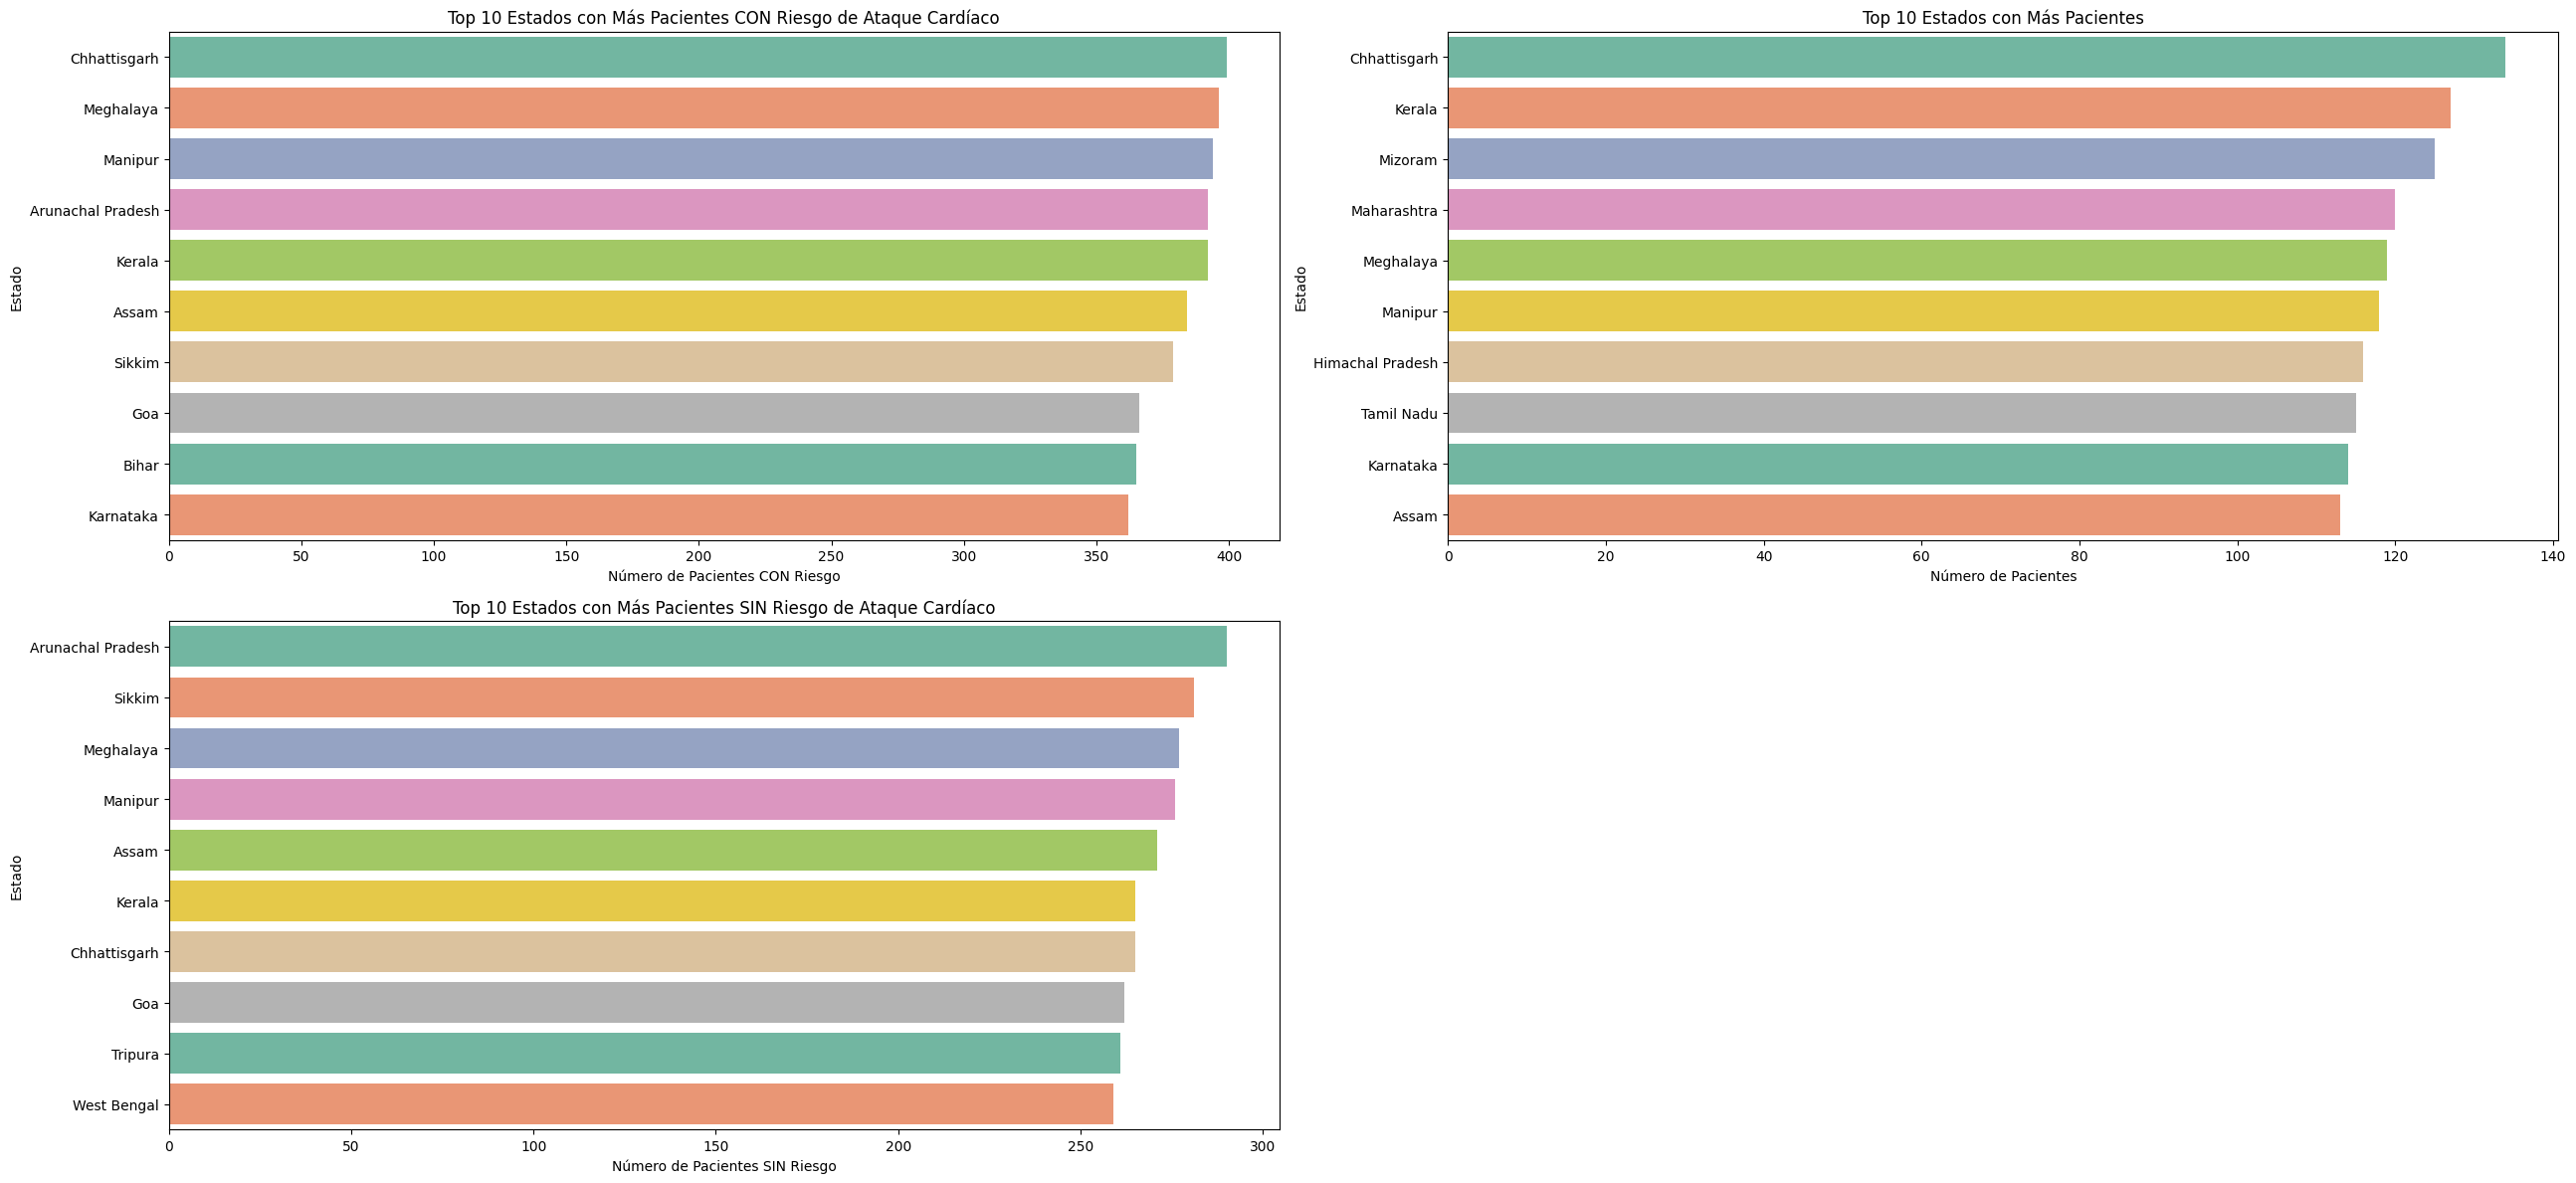

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Top 10 estados con más pacientes
top_states_total = (
    heartAttackPrediction_India['State_Name']
    .value_counts()
    .head(10)
    .reset_index(name='Patient_Count')
    .rename(columns={'index': 'State_Name'})
)

# 2. Top 10 estados con más pacientes CON riesgo de ataque cardíaco
top_states_risk = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 1]
    .groupby('State_Name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='AtRisk_Count')
)

# 2. Top 10 estados con más pacientes SIN riesgo de ataque cardíaco
top_states_without_risk = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 0]
    .groupby('State_Name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='AtNoRisk_Count')
)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(26, 12))

# Gráfico 1: Total de pacientes por estado
sns.barplot(data=top_states_total, y='State_Name', x='Patient_Count', palette='Set2', ax=axs[0,0])
axs[0,1].set_title('Top 10 Estados con Más Pacientes')
axs[0,1].set_xlabel('Número de Pacientes')
axs[0,1].set_ylabel('Estado')

# Gráfico 2: Pacientes CON riesgo por estado
sns.barplot(data=top_states_risk, y='State_Name', x='AtRisk_Count', palette='Set2', ax=axs[0,1])
axs[0,0].set_title('Top 10 Estados con Más Pacientes CON Riesgo de Ataque Cardíaco')
axs[0,0].set_xlabel('Número de Pacientes CON Riesgo')
axs[0,0].set_ylabel('Estado')

# Gráfico 2: Pacientes SIN riesgo por estado
sns.barplot(data=top_states_without_risk, y='State_Name', x='AtNoRisk_Count', palette='Set2', ax=axs[1,0])
axs[1,0].set_title('Top 10 Estados con Más Pacientes SIN Riesgo de Ataque Cardíaco')
axs[1,0].set_xlabel('Número de Pacientes SIN Riesgo')
axs[1,0].set_ylabel('Estado')

# Dejar el cuarto gráfico vacío
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

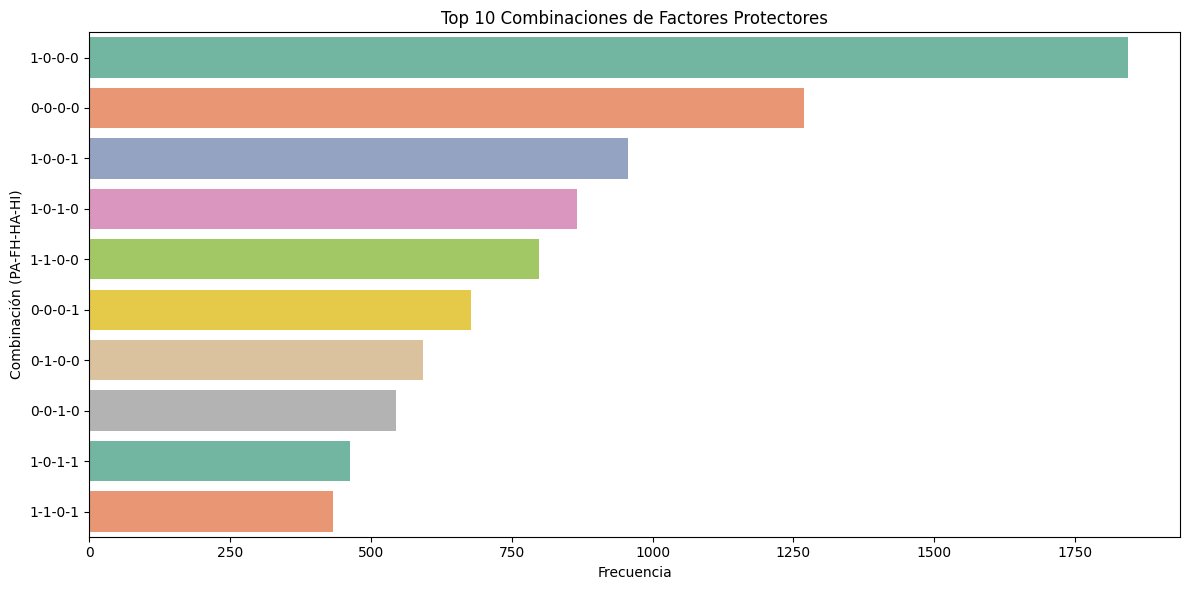

In [19]:
protective_factors = ['Physical_Activity', 'Family_History', 'Healthcare_Access', 'Health_Insurance']

combo_protect = (
    heartAttackPrediction_India[protective_factors]
    .astype(str)
    .agg('-'.join, axis=1)
    .value_counts()
    .head(10)
    .reset_index(name='Count')
    .rename(columns={'index': 'Combination'})
)

plt.figure(figsize=(12, 6))
sns.barplot(data=combo_protect, x='Count', y='Combination', palette='Set2')
plt.title('Top 10 Combinaciones de Factores Protectores')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación (PA-FH-HA-HI)')
plt.tight_layout()
plt.show()

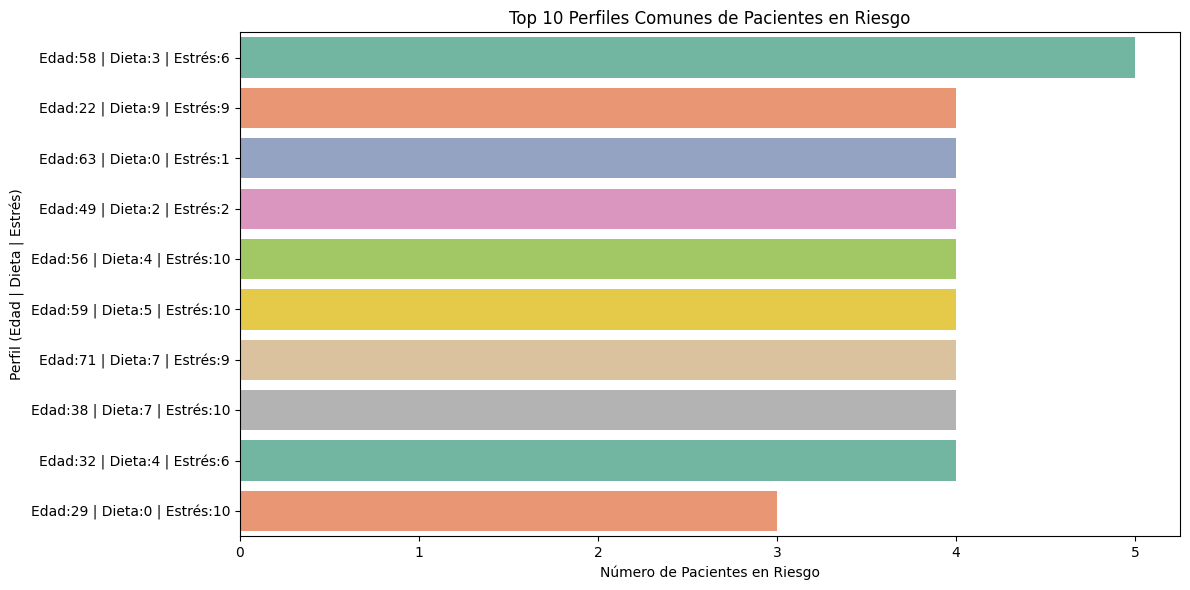

In [20]:
profile_data = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 1]
    .copy()
)

profile_data['Perfil'] = (
    'Edad:' + profile_data['Age'].astype(str) +
    ' | Dieta:' + profile_data['Diet_Score'].astype(str) +
    ' | Estrés:' + profile_data['Stress_Level'].astype(str)
)

top_profiles = (
    profile_data['Perfil']
    .value_counts()
    .head(10)
    .reset_index(name='Count')
    .rename(columns={'index': 'Perfil'})
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_profiles, x='Count', y='Perfil', palette='Set2')
plt.title('Top 10 Perfiles Comunes de Pacientes en Riesgo')
plt.xlabel('Número de Pacientes en Riesgo')
plt.ylabel('Perfil (Edad | Dieta | Estrés)')
plt.tight_layout()
plt.show()

---
---
---
---

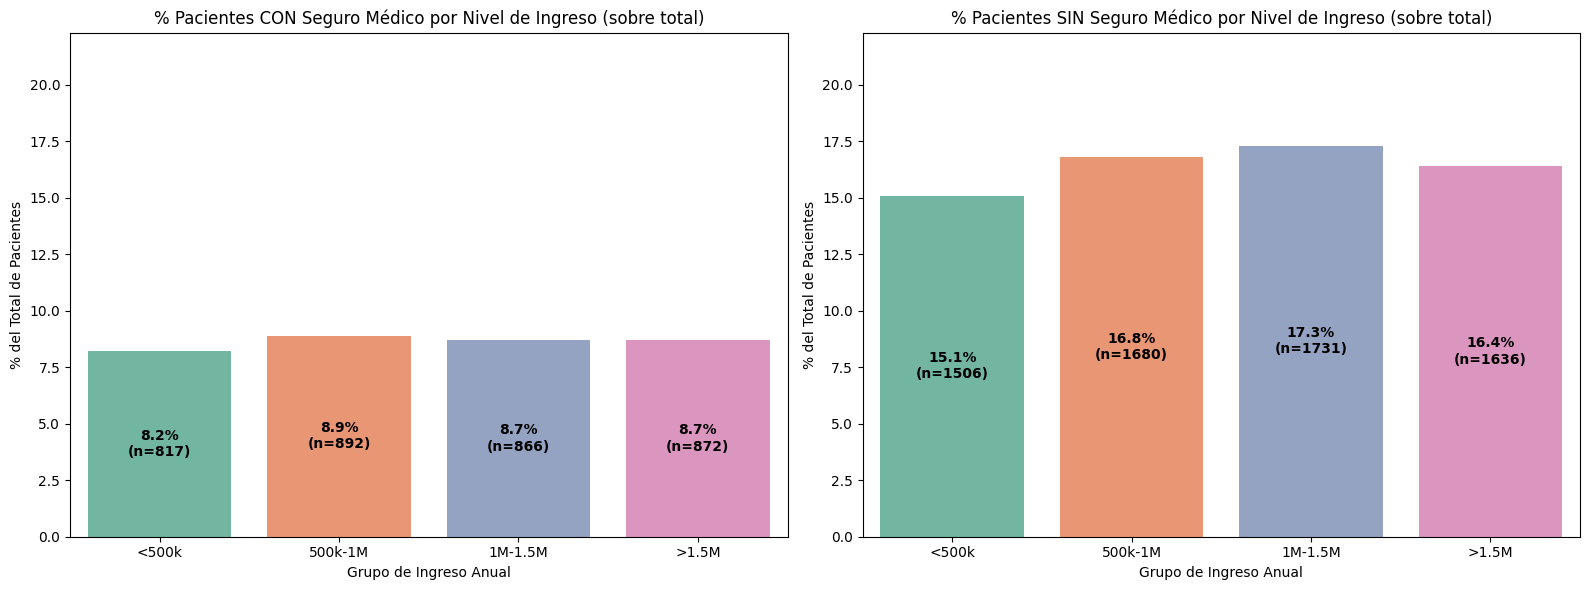

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear grupos de ingreso
heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[0, 500000, 1000000, 1500000, 2000000],
    labels=['<500k', '500k-1M', '1M-1.5M', '>1.5M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Agrupar por Income_Group y calcular conteos de pacientes con y sin seguro
grouped = heartAttackPrediction_India.groupby('Income_Group')['Health_Insurance'].agg(
    insured_count='sum',
    total_group='count'
).reset_index()

grouped['uninsured_count'] = grouped['total_group'] - grouped['insured_count']
grouped['pct_insured'] = (grouped['insured_count'] / total_pacientes * 100).round(1)
grouped['pct_uninsured'] = (grouped['uninsured_count'] / total_pacientes * 100).round(1)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: % asegurados
sns.barplot(data=grouped, x='Income_Group', y='pct_insured', palette='Set2', ax=axs[0])
axs[0].set_title('% Pacientes CON Seguro Médico por Nivel de Ingreso (sobre total)')
axs[0].set_xlabel('Grupo de Ingreso Anual')
axs[0].set_ylabel('% del Total de Pacientes')
axs[0].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[0].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'insured_count']
    axs[0].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

# Gráfico 2: % no asegurados
sns.barplot(data=grouped, x='Income_Group', y='pct_uninsured', palette='Set2', ax=axs[1])
axs[1].set_title('% Pacientes SIN Seguro Médico por Nivel de Ingreso (sobre total)')
axs[1].set_xlabel('Grupo de Ingreso Anual')
axs[1].set_ylabel('% del Total de Pacientes')
axs[1].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[1].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'uninsured_count']
    axs[1].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

plt.tight_layout()
plt.show()


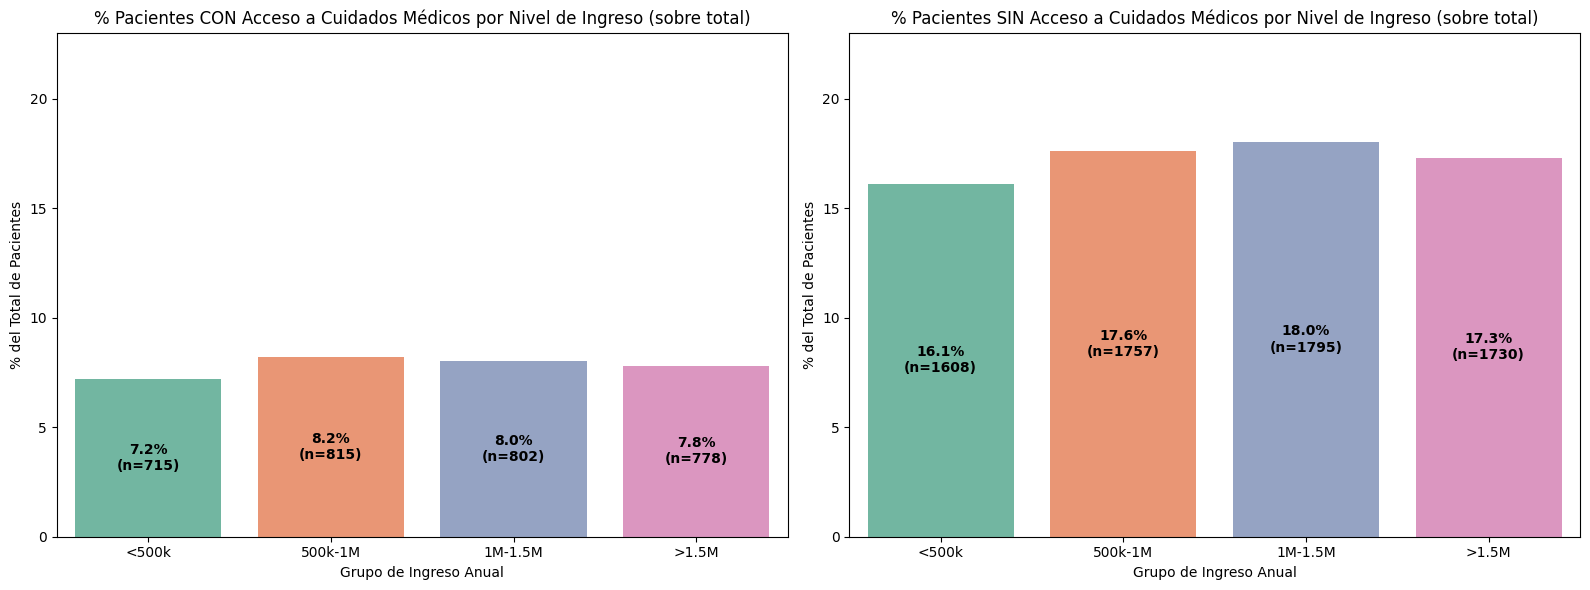

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear grupos de ingreso
heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[0, 500000, 1000000, 1500000, 2000000],
    labels=['<500k', '500k-1M', '1M-1.5M', '>1.5M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Agrupar por Income_Group y calcular conteos de pacientes con y sin acceso a cuidados medicos
grouped = heartAttackPrediction_India.groupby('Income_Group')['Healthcare_Access'].agg(
    insured_count='sum',
    total_group='count'
).reset_index()

grouped['uninsured_count'] = grouped['total_group'] - grouped['insured_count']
grouped['pct_insured'] = (grouped['insured_count'] / total_pacientes * 100).round(1)
grouped['pct_uninsured'] = (grouped['uninsured_count'] / total_pacientes * 100).round(1)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: % reciben cuidados medicos 
sns.barplot(data=grouped, x='Income_Group', y='pct_insured', palette='Set2', ax=axs[0])
axs[0].set_title('% Pacientes CON Acceso a Cuidados Médicos por Nivel de Ingreso (sobre total)')
axs[0].set_xlabel('Grupo de Ingreso Anual')
axs[0].set_ylabel('% del Total de Pacientes')
axs[0].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[0].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'insured_count']
    axs[0].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

# Gráfico 2: % no reciben cuidados medicos
sns.barplot(data=grouped, x='Income_Group', y='pct_uninsured', palette='Set2', ax=axs[1])
axs[1].set_title('% Pacientes SIN Acceso a Cuidados Médicos por Nivel de Ingreso (sobre total)')
axs[1].set_xlabel('Grupo de Ingreso Anual')
axs[1].set_ylabel('% del Total de Pacientes')
axs[1].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[1].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'uninsured_count']
    axs[1].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

plt.tight_layout()
plt.show()


---
---
---
---

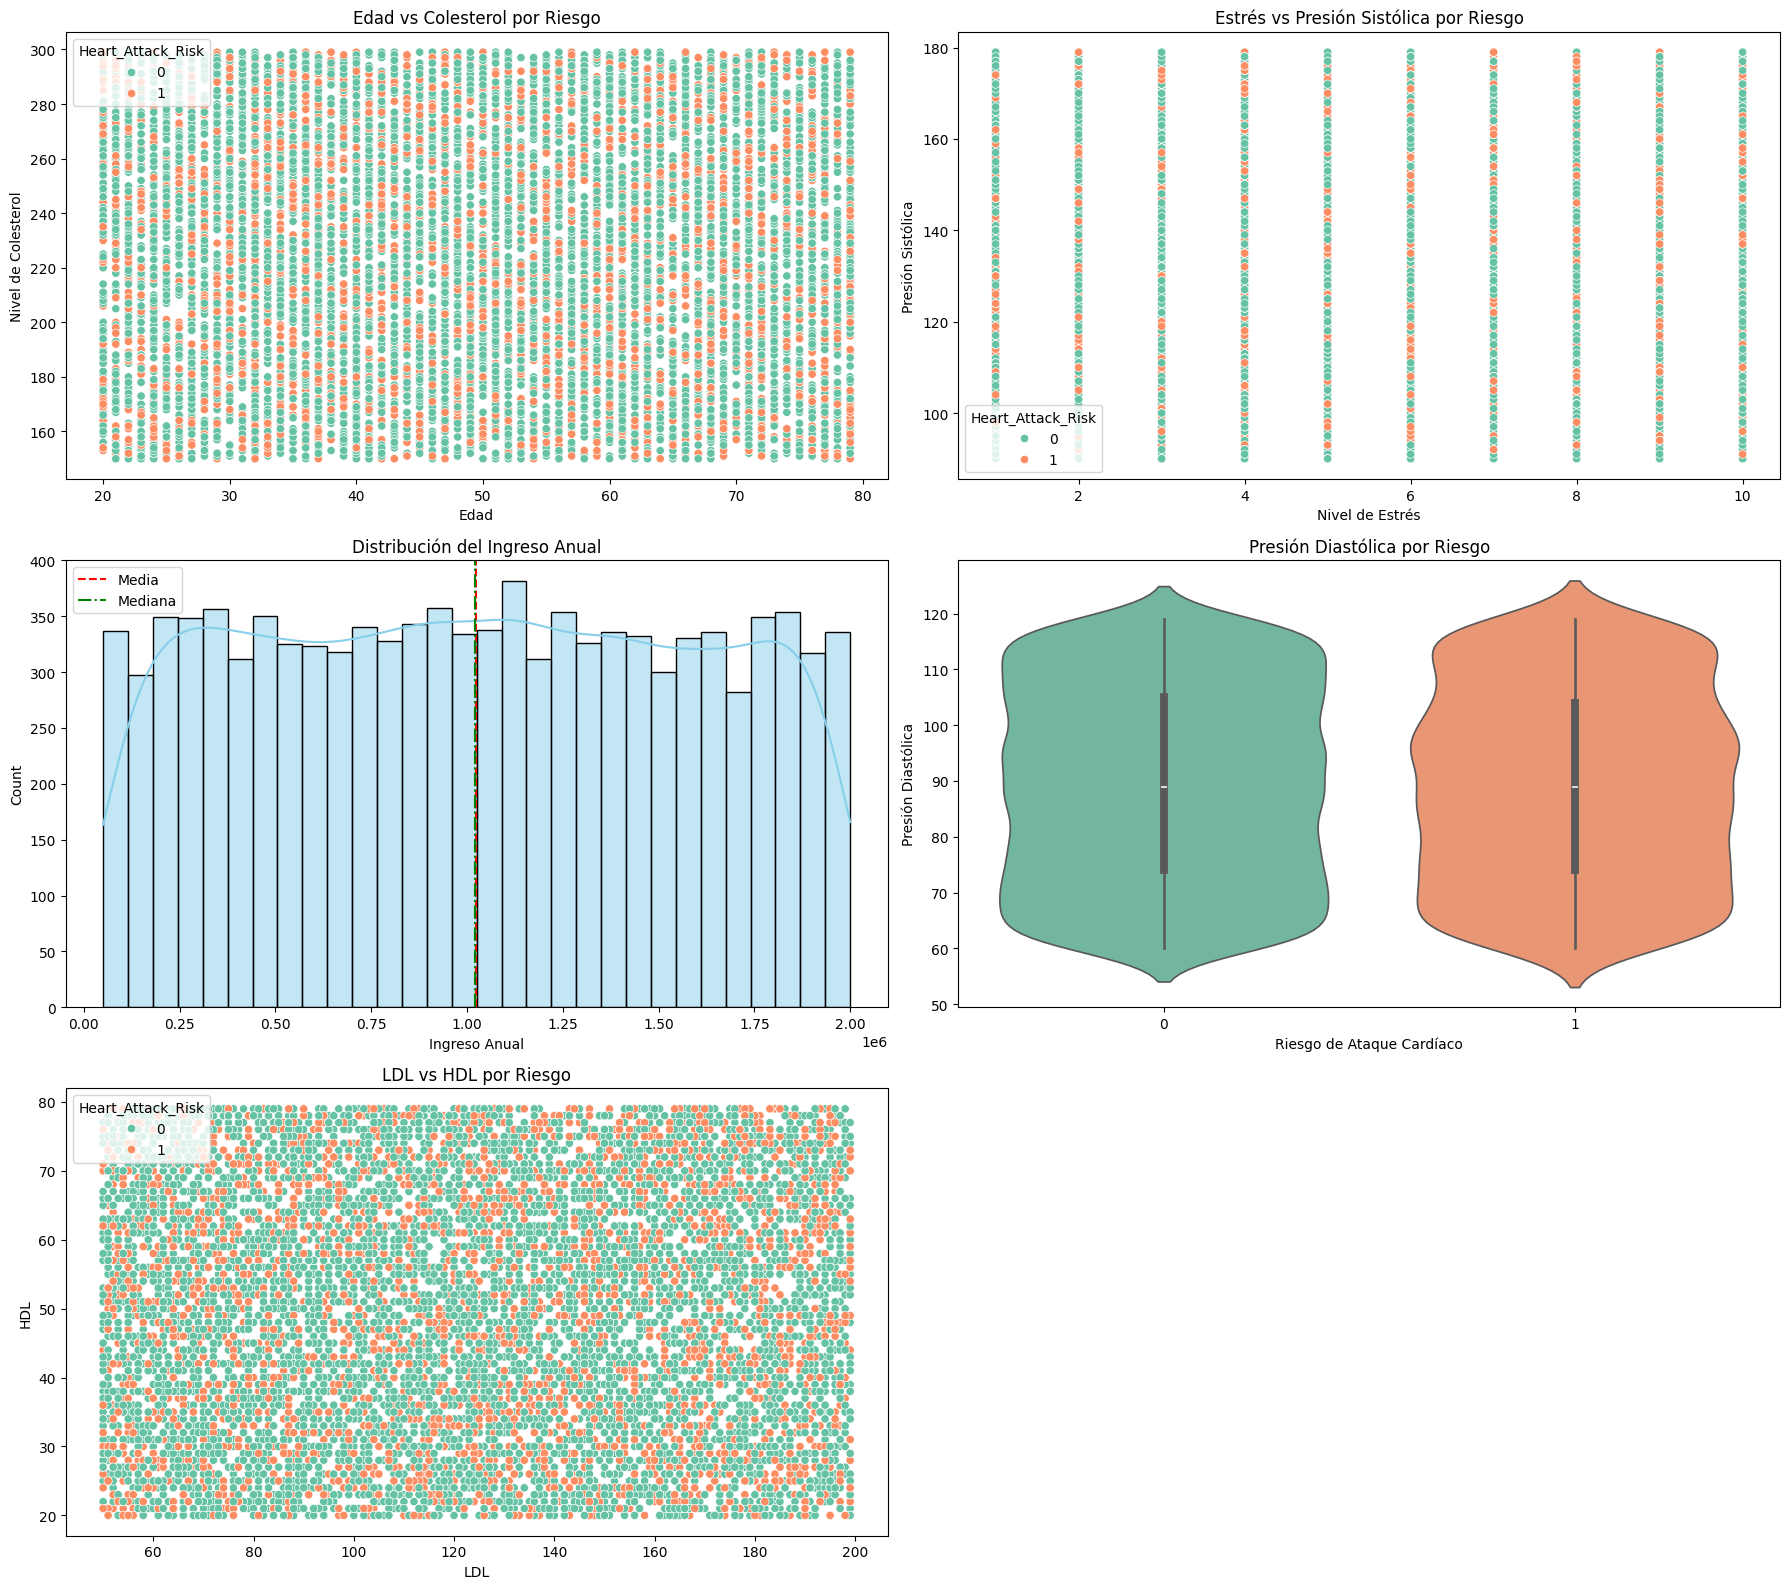

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subplots 3x2 para visualizaciones interesantes
fig, axs = plt.subplots(3, 2, figsize=(18, 16))

# Gráfico 1: Relación entre Edad y Colesterol
sns.scatterplot(data=heartAttackPrediction_India, x='Age', y='Cholesterol_Level', hue='Heart_Attack_Risk', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Edad vs Colesterol por Riesgo')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Nivel de Colesterol')

# Gráfico 2: Relación entre Estrés y Presión Sistólica
sns.scatterplot(data=heartAttackPrediction_India, x='Stress_Level', y='Systolic_BP', hue='Heart_Attack_Risk', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Estrés vs Presión Sistólica por Riesgo')
axs[0, 1].set_xlabel('Nivel de Estrés')
axs[0, 1].set_ylabel('Presión Sistólica')

# Gráfico 3: Histograma de Ingresos con línea de media y mediana
sns.histplot(data=heartAttackPrediction_India, x='Annual_Income', bins=30, kde=True, ax=axs[1, 0], color='skyblue')
axs[1, 0].axvline(heartAttackPrediction_India['Annual_Income'].mean(), color='red', linestyle='--', label='Media')
axs[1, 0].axvline(heartAttackPrediction_India['Annual_Income'].median(), color='green', linestyle='-.', label='Mediana')
axs[1, 0].set_title('Distribución del Ingreso Anual')
axs[1, 0].set_xlabel('Ingreso Anual')
axs[1, 0].legend()

# Gráfico 4: Boxenplot de Presión Diastólica por riesgo
sns.violinplot(data=heartAttackPrediction_India, x='Heart_Attack_Risk', y='Diastolic_BP', palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Presión Diastólica por Riesgo')
axs[1, 1].set_xlabel('Riesgo de Ataque Cardíaco')
axs[1, 1].set_ylabel('Presión Diastólica')

# Gráfico 5: Relación LDL vs HDL por Riesgo
sns.scatterplot(data=heartAttackPrediction_India, x='LDL_Level', y='HDL_Level', hue='Heart_Attack_Risk', palette='Set2', ax=axs[2, 0])
axs[2, 0].set_title('LDL vs HDL por Riesgo')
axs[2, 0].set_xlabel('LDL')
axs[2, 0].set_ylabel('HDL')

# Gráfico 6: Eliminar (no usar)
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

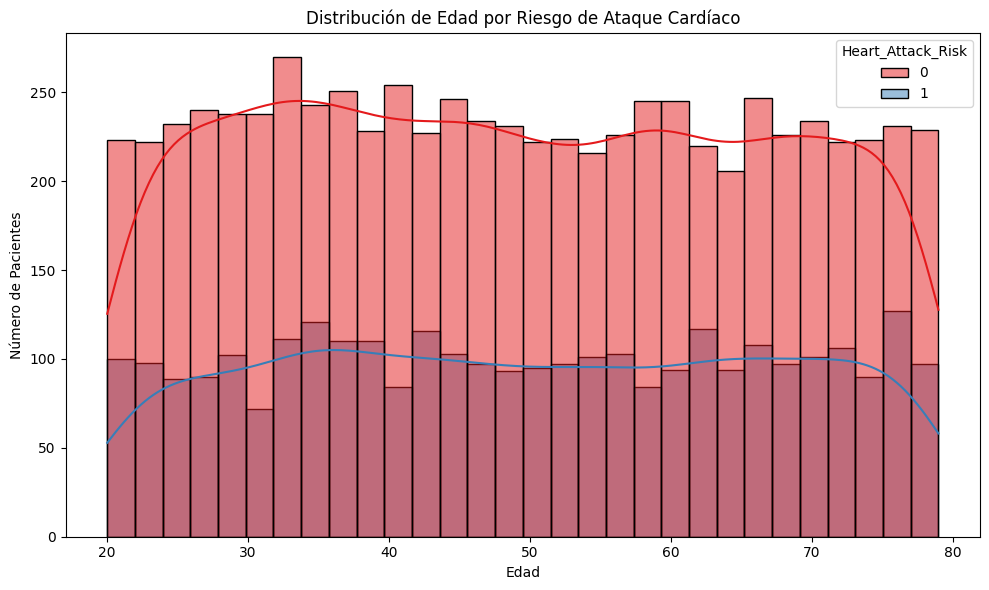

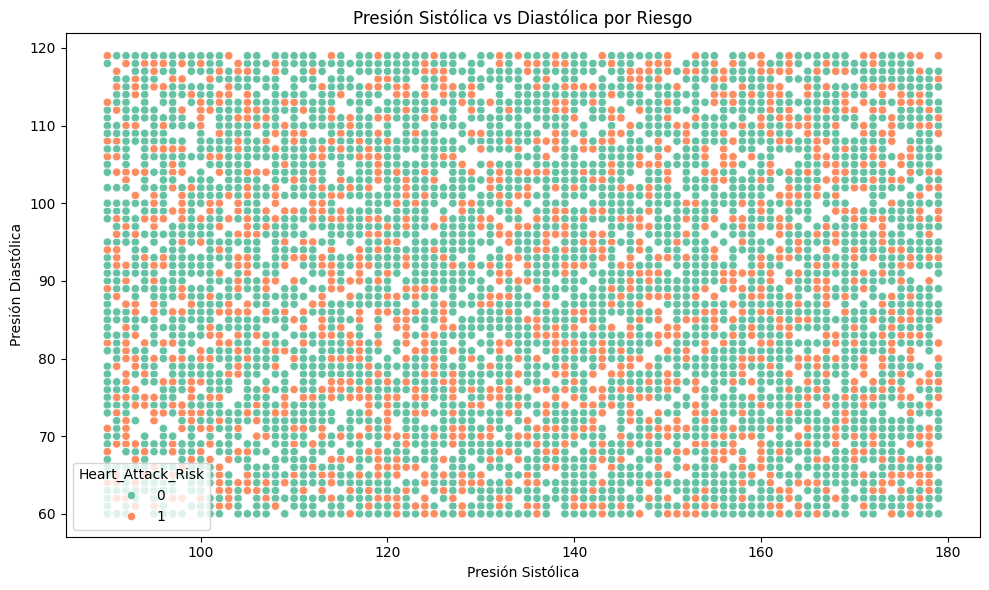

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Histograma de Age con KDE separado por Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.histplot(data=heartAttackPrediction_India, x='Age', hue='Heart_Attack_Risk', kde=True, palette='Set1', bins=30)
plt.title('Distribución de Edad por Riesgo de Ataque Cardíaco')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.tight_layout()
plt.show()

# Gráfico 2: Diagrama de dispersión Systolic vs Diastolic BP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heartAttackPrediction_India, x='Systolic_BP', y='Diastolic_BP', hue='Heart_Attack_Risk', palette='Set2')
plt.title('Presión Sistólica vs Diastólica por Riesgo')
plt.xlabel('Presión Sistólica')
plt.ylabel('Presión Diastólica')
plt.tight_layout()
plt.show()

---
---
---
---

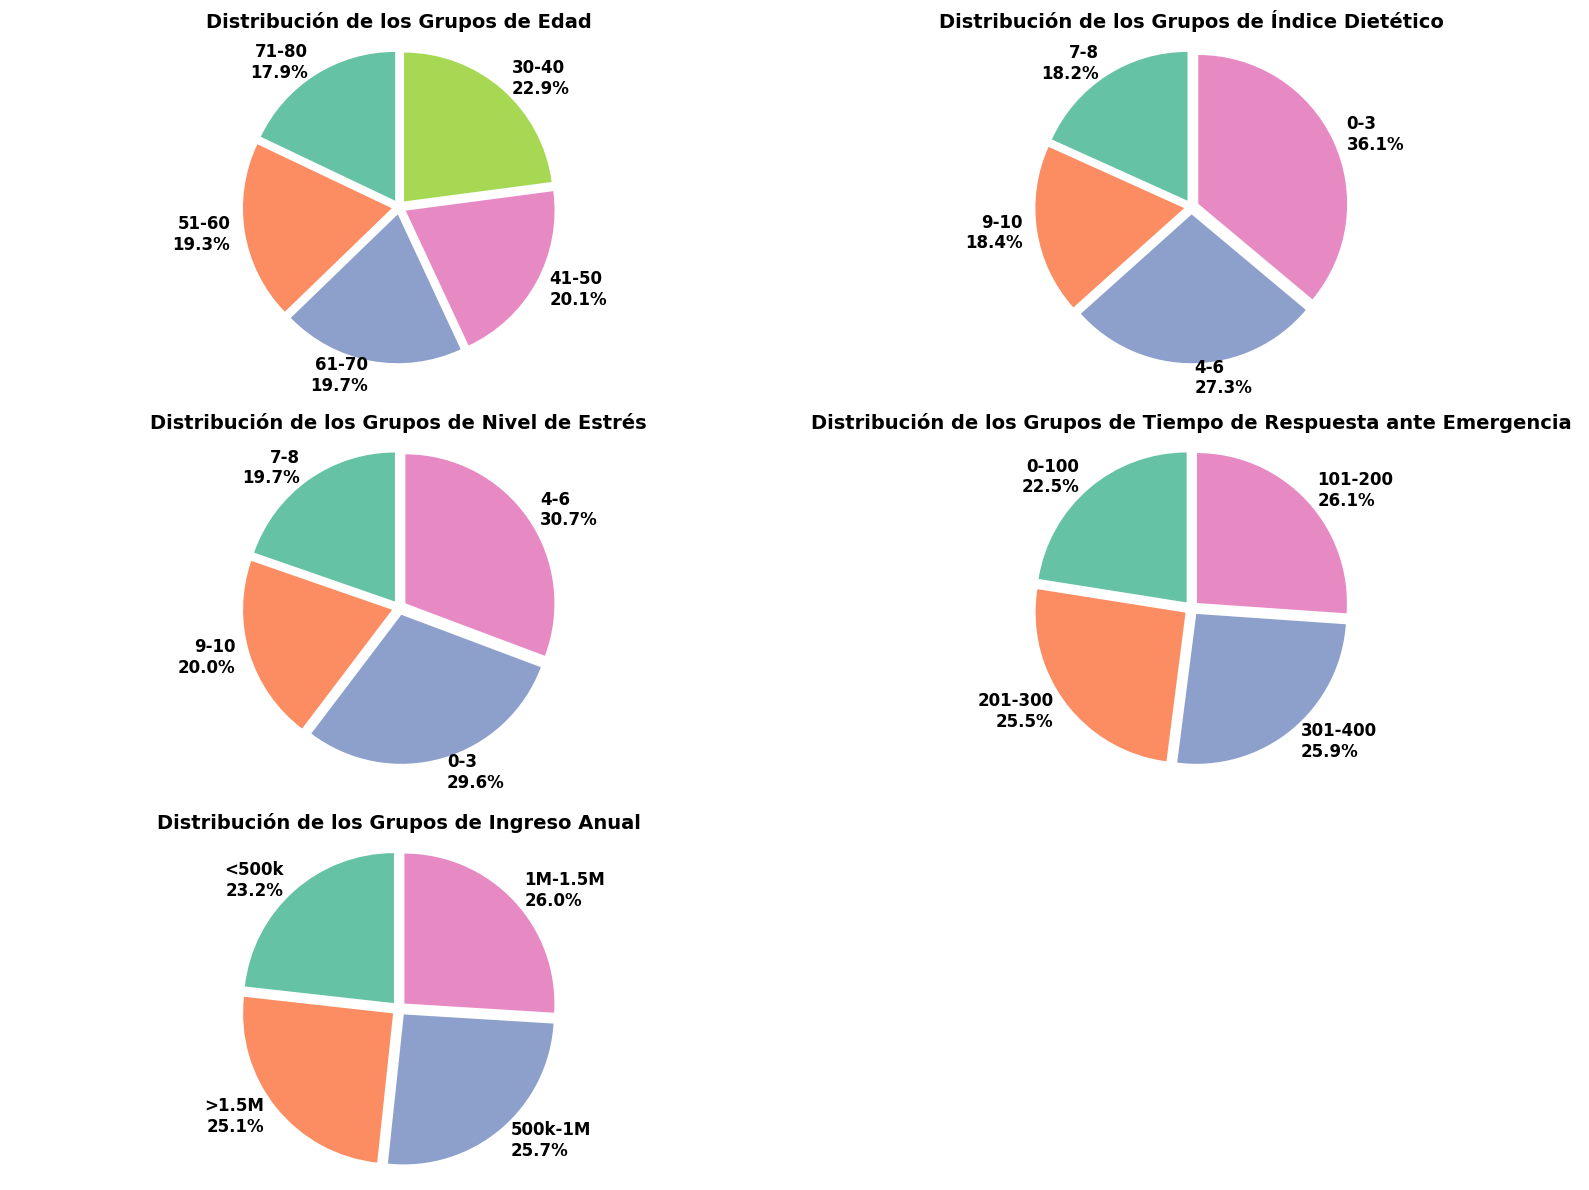

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables y títulos
vars_pie = ['Age_Group', 'Diet_Score_Group', 'Stress_Level_Group', 'Response_Time_Group', 'Income_Group']
titles = [
    'Distribución de los Grupos de Edad',
    'Distribución de los Grupos de Índice Dietético',
    'Distribución de los Grupos de Nivel de Estrés',
    'Distribución de los Grupos de Tiempo de Respuesta ante Emergencia',
    'Distribución de los Grupos de Ingreso Anual'
]

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

for i, var in enumerate(vars_pie):
    counts = heartAttackPrediction_India[var].value_counts(normalize=True).sort_values() * 100
    sizes = counts.values
    labels = [f'{idx}\n{pct:.1f}%' for idx, pct in zip(counts.index, sizes)]

    axs[i].pie(
        sizes,
        labels=labels,
        autopct=None,
        startangle=90,
        explode=[0.05]*len(sizes),
        colors=sns.color_palette('Set2', n_colors=len(sizes)),
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    axs[i].axis('equal')
    axs[i].set_title(titles[i], fontsize=14, fontweight='bold')

# Sexto gráfico vacío
axs[5].axis('off')

plt.tight_layout()
plt.show()

---
---
---
---

# **MODELOS DE IA - FASE PRELIMINAR**

---
---
---
---

## **MODELOS MACHINE LEARNING**

**Logistic Regression, Random Forest, Gradient Boosting, SVM, XGBoost, LightGBM, CatBoost**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTETomek
import pandas as pd

# Separar variable objetivo
X = heartAttackPrediction_India.drop('Heart_Attack_Risk', axis=1)
y = heartAttackPrediction_India['Heart_Attack_Risk']

# Separar variables por tipo
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
])

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Selección de características
selector = SelectKBest(score_func=f_classif, k=30)
X_selected = selector.fit_transform(X_processed, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, test_size=0.2, random_state=42)

# Balancear con SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Diccionario con modelos y sus grids de hiperparámetros
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    },
    'SVM (RBF)': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.01, 0.1, 1],
            'kernel': ['rbf']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.001, 0.01, 0.1],
            'num_leaves': [31, 50, 100],
            'max_depth': [-1, 10, 20]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'iterations': [100, 200, 300],
            'learning_rate': [0.001, 0.01, 0.1],
            'depth': [3, 5, 7]
        }
    }
}

# Búsqueda de hiperparámetros con GridSearchCV
best_models = {}
for name, cfg in param_grids.items():
    print(f"Ajustando hiperparámetros para: {name}")
    grid = GridSearchCV(cfg['model'], cfg['params'], scoring='roc_auc', cv=3, n_jobs=-1)
    grid.fit(X_train_bal, y_train_bal)
    best_models[name] = grid.best_estimator_
    print(f"Mejor configuración para {name}: {grid.best_params_}")

Ajustando hiperparámetros para: Logistic Regression
Mejor configuración para Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Ajustando hiperparámetros para: Random Forest
Mejor configuración para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Ajustando hiperparámetros para: Gradient Boosting
Mejor configuración para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Ajustando hiperparámetros para: SVM (RBF)
Mejor configuración para SVM (RBF): {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Ajustando hiperparámetros para: XGBoost
Mejor configuración para XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Ajustando hiperparámetros para: LightGBM
[LightGBM] [Info] Number of positive: 5464, number of negative: 5464
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003128 second

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluar los modelos optimizados
for nombre, modelo in best_models.items():
    print(f"\nEvaluación del modelo optimizado: {nombre}")
    
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    # AUC
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc:.4f}")
    
    # Clasification Report
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
    
    # Matriz de confusión
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Evaluación del modelo optimizado: Logistic Regression
AUC: 0.5048
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59      1399
           1       0.31      0.50      0.38       601

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.58      0.51      0.53      2000

Matriz de confusión:
 [[711 688]
 [298 303]]

Evaluación del modelo optimizado: Random Forest
AUC: 0.4937
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81      1399
           1       0.27      0.03      0.06       601

    accuracy                           0.68      2000
   macro avg       0.48      0.50      0.43      2000
weighted avg       0.57      0.68      0.58      2000

Matriz de confusión:
 [[1345   54]
 [ 581   20]]

Evaluación del modelo optimizado: Gradient Boosting
AUC: 0.4900
Repor

---
---
---
---

## **MODELOS DEEP LEARNING**

##### **TabNet**

In [8]:
# ------------------ LIBRERÍAS ------------------
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import torch

# ------------------ CARGA Y PREPROCESAMIENTO ------------------
df = heartAttackPrediction_India.copy()

# Eliminar columnas innecesarias
df = df.drop(columns=["Patient_ID"])

# Codificar variables categóricas
cat_cols = ["Gender", "State_Name"]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separar variables numéricas para escalar
num_cols = [
    'Diastolic_BP', 'Annual_Income', 'Emergency_Response_Time',
    'Systolic_BP', 'Cholesterol_Level', 'Triglyceride_Level',
    'LDL_Level', 'HDL_Level'
]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separar variables y objetivo
X = df.drop(columns=["Heart_Attack_Risk"])
y = df["Heart_Attack_Risk"].values

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# ------------------ TABNET MODEL ------------------
clf = TabNetClassifier(
    n_d=32,                
    n_a=32,                
    n_steps=5,             
    gamma=1.5,             
    n_independent=2,      
    n_shared=2,            
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', 
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# ------------------ ENTRENAMIENTO ------------------
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# ------------------ PREDICCIONES Y MÉTRICAS ------------------
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(f"\nAUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

epoch 0  | loss: 0.80705 | val_0_auc: 0.47261 |  0:00:01s
epoch 1  | loss: 0.6701  | val_0_auc: 0.53493 |  0:00:03s
epoch 2  | loss: 0.64667 | val_0_auc: 0.50254 |  0:00:05s
epoch 3  | loss: 0.63022 | val_0_auc: 0.49868 |  0:00:06s
epoch 4  | loss: 0.62107 | val_0_auc: 0.49478 |  0:00:08s
epoch 5  | loss: 0.61654 | val_0_auc: 0.52594 |  0:00:10s
epoch 6  | loss: 0.61457 | val_0_auc: 0.52389 |  0:00:11s
epoch 7  | loss: 0.61665 | val_0_auc: 0.50404 |  0:00:13s
epoch 8  | loss: 0.61895 | val_0_auc: 0.52209 |  0:00:14s
epoch 9  | loss: 0.62122 | val_0_auc: 0.49294 |  0:00:16s
epoch 10 | loss: 0.61556 | val_0_auc: 0.48016 |  0:00:18s
epoch 11 | loss: 0.61491 | val_0_auc: 0.52231 |  0:00:20s
epoch 12 | loss: 0.61564 | val_0_auc: 0.50765 |  0:00:21s
epoch 13 | loss: 0.61362 | val_0_auc: 0.50497 |  0:00:24s
epoch 14 | loss: 0.61245 | val_0_auc: 0.50954 |  0:00:25s
epoch 15 | loss: 0.61438 | val_0_auc: 0.50711 |  0:00:27s
epoch 16 | loss: 0.6139  | val_0_auc: 0.4966  |  0:00:29s
epoch 17 | los

**CNN 1D**

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar tu DataFrame
df = heartAttackPrediction_India.copy()

# Eliminar columnas irrelevantes
df = df.drop(columns=["Patient_ID"])

# Codificar variables categóricas
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["State_Name"] = LabelEncoder().fit_transform(df["State_Name"])

# Escalado de variables numéricas
num_cols = [
    'Diastolic_BP', 'Annual_Income', 'Emergency_Response_Time',
    'Systolic_BP', 'Cholesterol_Level', 'Triglyceride_Level',
    'LDL_Level', 'HDL_Level'
]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separar variables predictoras y target
X = df.drop(columns=["Heart_Attack_Risk"]).values
y = df["Heart_Attack_Risk"].values

# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reestructurar para CNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir modelo CNN
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluación
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6499 - loss: 0.7066 - val_accuracy: 0.6750 - val_loss: 0.6462 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7072 - loss: 0.6211 - val_accuracy: 0.6750 - val_loss: 0.6320 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7015 - loss: 0.6221 - val_accuracy: 0.6750 - val_loss: 0.6345 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7036 - loss: 0.6138 - val_accuracy: 0.6750 - val_loss: 0.6317 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7011 - loss: 0.6200 - val_accuracy: 0.6750 - val_loss: 0.6322 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7018 - loss: 0.6103 - val_accuracy: 0.6750 - val_loss: 0.6328 - learning_rate: 0.0010
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6986 - loss: 0

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Dividir con stratify para asegurar ambas clases en test y train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al X_train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Escalar después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Reshape para CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Calcular class_weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_res),
    y=y_train_res
)
class_weights = {i: weights[i] for i in range(len(weights))}

# Modelo CNN
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=5, mode='max')

# Entrenamiento
history = model.fit(
    X_train_cnn, y_train_res,
    validation_split=0.2,  # nota: esto es sobre X_train_res, que ya está balanceado
    epochs=100,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Predicciones
y_pred_prob = model.predict(X_test_cnn).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluación
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 0.5247 - accuracy: 0.6215 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8452 - learning_rate: 0.0010
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - AUC: 0.5312 - accuracy: 0.6208 - loss: 0.6632 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - AUC: 0.5568 - accuracy: 0.6143 - loss: 0.6622 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.9129 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - AUC: 0.5620 - accuracy: 0.6347 - loss: 0.6514 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - AUC: 0.5800 - accuracy: 0.6250 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_accuracy: 0.0045 - val_loss: 0.8085 - learning_rate: 0.0010
Epoch 6/100
140/140 ━━━━━━━━━━━━━

---
---
---
---

## **VARIABLE RIESGO ATAQUE CARDIACO**

In [17]:
# Convertir variables binarias a 1/0
binarias = ['Heart_Attack_History', 'Heart_Attack_Risk', 'Hypertension', 'Diabetes', 'Obesity',
            'Family_History', 'Smoking', 'Alcohol_Consumption', 'Air_Pollution_Exposure']
heartAttackPrediction_India[binarias] = heartAttackPrediction_India[binarias].replace({'Yes': 1, 'No': 0})

# Crear columnas auxiliares con condiciones numéricas discretizadas
heartAttackPrediction_India['Cond_Colesterol_Alto'] = (heartAttackPrediction_India['Cholesterol_Level'] >= 240).astype(int)
heartAttackPrediction_India['Cond_Tension_Sistolica'] = (heartAttackPrediction_India['Systolic_BP'] >= 140).astype(int)
heartAttackPrediction_India['Cond_Tension_Diastolica'] = (heartAttackPrediction_India['Diastolic_BP'] >= 90).astype(int)
heartAttackPrediction_India['Cond_Dieta_Mala'] = (heartAttackPrediction_India['Diet_Score'] < 7).astype(int)
heartAttackPrediction_India['Cond_Estres_Alto'] = (heartAttackPrediction_India['Stress_Level'] > 7).astype(int)
heartAttackPrediction_India['Cond_Edad_Avanzada'] = (heartAttackPrediction_India['Age'] > 60).astype(int)

# Sumar factores de riesgo (binarios + numéricos)
factores_totales = heartAttackPrediction_India[
    ['Hypertension', 'Diabetes', 'Obesity', 'Family_History', 'Smoking', 'Alcohol_Consumption',
     'Air_Pollution_Exposure', 'Cond_Colesterol_Alto', 'Cond_Tension_Sistolica',
     'Cond_Tension_Diastolica', 'Cond_Dieta_Mala', 'Cond_Estres_Alto', 'Cond_Edad_Avanzada']
].sum(axis=1)

# Definir variable de alto riesgo clínico
heartAttackPrediction_India['High_Clinical_Risk'] = (
    (heartAttackPrediction_India['Heart_Attack_History'] == 1) |
    (factores_totales >= 6)
).astype(int)

heartAttackPrediction_India['High_Clinical_Risk'].value_counts()

High_Clinical_Risk
0    6048
1    3952
Name: count, dtype: int64

In [18]:
heartAttackPrediction_India.to_csv('HeartAttackPredictionIndia_Updated.csv', index=False)

In [19]:
HeartAttackPredictionIndia_Updated = pd.read_csv('../Codigo/HeartAttackPredictionIndia_Updated.csv')
HeartAttackPredictionIndia_Updated.fillna(0, inplace=True)
HeartAttackPredictionIndia_Updated.head()

Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Annual_Income  \
0        1                    0                  0  ...         611025   
1        0                    1                  1  ...         174527   
2        0                    0                  1  ...        1760112   
3        0                    0                  1  ...        1398213   
4        0                    0                  1  ...          97987   

   Health_Insurance  Heart_Attack_Risk  High_Clinical_Risk  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 1                  0                   1   
3                 0                  0                   1   
4                 0                  1                   0   

   Cond_Colesterol_Alto  Cond_Tension_Sistolica  Cond_Tension_Diastolica  \
0                     1                       0                        1   
1                     1                       0                        1   
2                     1                       0                        1   
3                     0                       0                        0   
4                     1                       1                        1   

   Cond_Dieta_Mala  Cond_Estres_Alto  Cond_Edad_Avanzada  
0                0                 0                   0  
1                1                 0                   0  
2                1                 1                   1  
3                0                 0                   0  
4                1                 1                   0  

[5 rows x 33 columns]

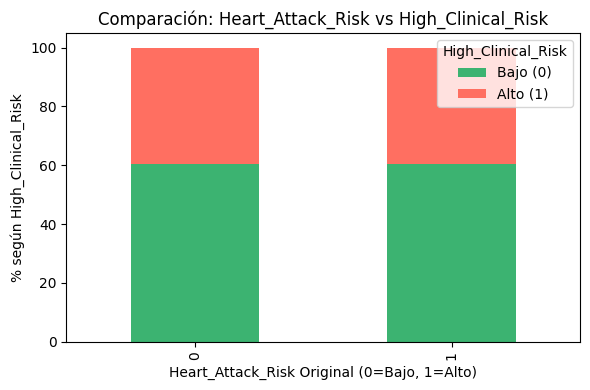

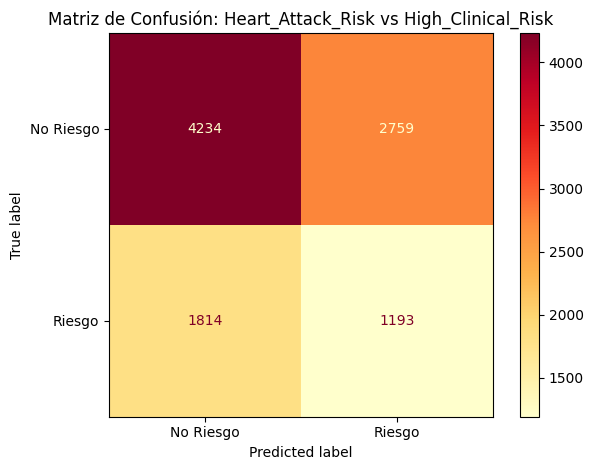

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualización comparativa con la etiqueta original 
fig, ax = plt.subplots(figsize=(6, 4))
comparacion = pd.crosstab(heartAttackPrediction_India['Heart_Attack_Risk'], heartAttackPrediction_India['High_Clinical_Risk'], normalize='index') * 100
comparacion.plot(kind='bar', stacked=True, color=['#3CB371', '#FF6F61'], ax=ax)
plt.title('Comparación: Heart_Attack_Risk vs High_Clinical_Risk')
plt.xlabel('Heart_Attack_Risk Original (0=Bajo, 1=Alto)')
plt.ylabel('% según High_Clinical_Risk')
plt.legend(['Bajo (0)', 'Alto (1)'], title='High_Clinical_Risk')
plt.tight_layout()
plt.show()

# Matriz de confusión entre ambas etiquetas 
y_true = heartAttackPrediction_India['Heart_Attack_Risk']
y_pred = heartAttackPrediction_India['High_Clinical_Risk']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Riesgo', 'Riesgo'])
disp.plot(cmap='YlOrRd')
plt.title('Matriz de Confusión: Heart_Attack_Risk vs High_Clinical_Risk')
plt.tight_layout()
plt.show()

---
---
---
---

# **MODELOS DE IA DEFINITIVOS**

---
---
---
---

## **MODELOS DE MACHINE LEARNING**

**Random Forest, XGBoost, SVM, LightGBM**


Optimizando hiperparámetros para: Random Forest
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Random Forest - AUC: 0.9912
Accuracy: 0.9390
F1 Score: 0.9181
Confusion Matrix:
 [[1194   16]
 [ 106  684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      1210
           1       0.98      0.87      0.92       790

    accuracy                           0.94      2000
   macro avg       0.95      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

Mejores hiperparámetros: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 207}


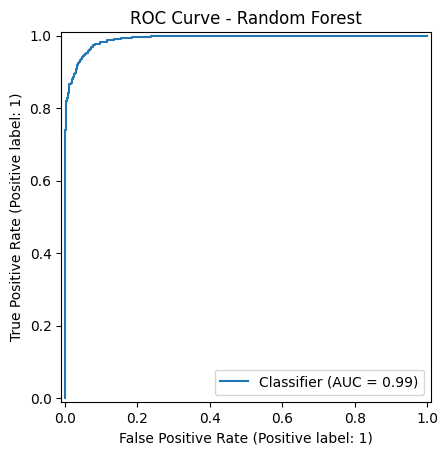

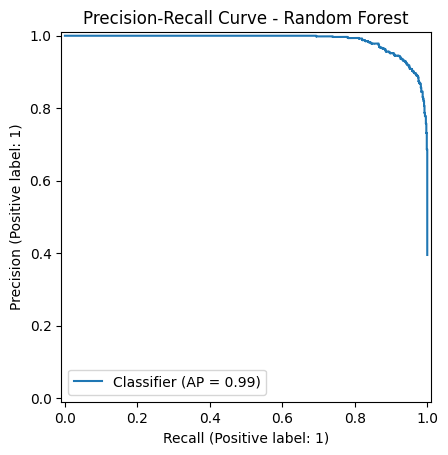


Optimizando hiperparámetros para: XGBoost
Fitting 3 folds for each of 25 candidates, totalling 75 fits

XGBoost - AUC: 1.0000
Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
 [[1210    0]
 [   0  790]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Mejores hiperparámetros: {'colsample_bytree': 0.9439761626945282, 'learning_rate': 0.14606150771755597, 'max_depth': 3, 'n_estimators': 266, 'subsample': 0.6053059844639466}


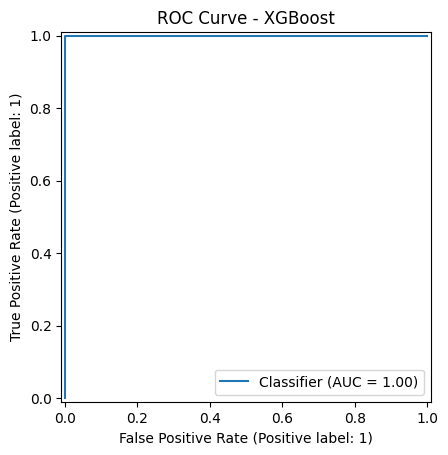

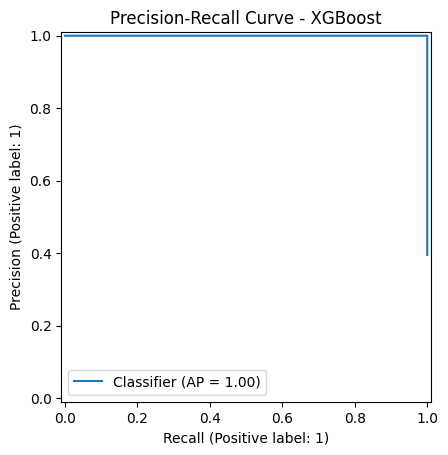


Optimizando hiperparámetros para: SVM
Fitting 3 folds for each of 25 candidates, totalling 75 fits

SVM - AUC: 1.0000
Accuracy: 0.9985
F1 Score: 0.9981
Confusion Matrix:
 [[1210    0]
 [   3  787]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Mejores hiperparámetros: {'C': 6.932635188254582, 'gamma': 'auto', 'kernel': 'rbf'}


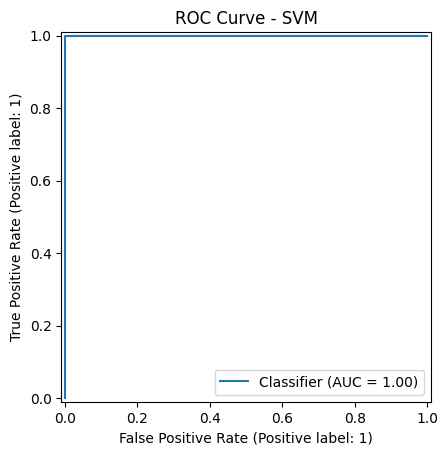

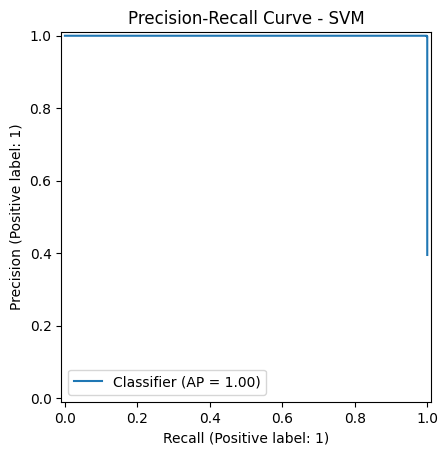


Optimizando hiperparámetros para: LightGBM
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 3225, number of negative: 3225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7217
[LightGBM] [Info] Number of data points in the train set: 6450, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3226, number of negative: 3225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7219
[LightGBM] [Info] Number of data points in the train set: 6451, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500078 -> initscore=0.000310
[LightGBM] [Info] Start

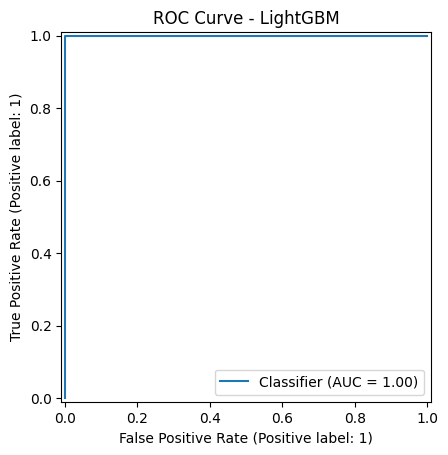

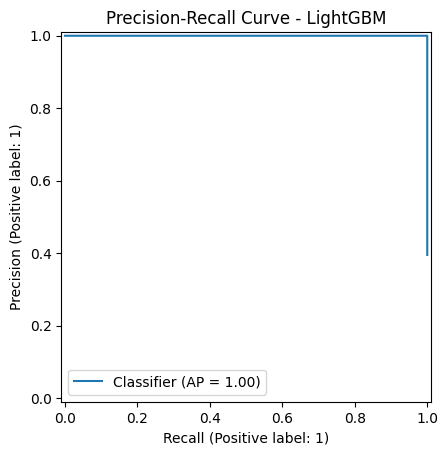

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from scipy.stats import randint, uniform

# ----------------------------
# PREPROCESADO
# ----------------------------
X = heartAttackPrediction_India.drop(columns=['Heart_Attack_Risk', 'High_Clinical_Risk'])
y = heartAttackPrediction_India['High_Clinical_Risk']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# -------------------------------------------
# FUNCIÓN DE ENTRENAMIENTO Y EVALUACIÓN
# -------------------------------------------
def optimizar_y_evaluar(nombre, modelo, param_dist, n_iter=20):
    print(f"\nOptimizando hiperparámetros para: {nombre}")
    search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=n_iter, 
                                scoring='roc_auc', cv=3, verbose=1, n_jobs=1, random_state=42)
    search.fit(X_train_bal, y_train_bal)
    mejor_modelo = search.best_estimator_

    y_pred_prob = mejor_modelo.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_pred_prob > 0.5).astype(int)

    print(f"\n{nombre} - AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Mejores hiperparámetros:", search.best_params_)

    RocCurveDisplay.from_predictions(y_test, y_pred_prob)
    plt.title(f'ROC Curve - {nombre}')
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob)
    plt.title(f'Precision-Recall Curve - {nombre}')
    plt.show()

# ----------------------------
# MODELOS Y ESPACIOS DE BÚSQUEDA
# ----------------------------
espacios = {
    'Random Forest': {
        'modelo': RandomForestClassifier(random_state=42, n_jobs=-1),
        'param_dist': {
            'n_estimators': randint(100, 300),
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 5)
        }
    },
    'XGBoost': {
        'modelo': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_dist': {
            'n_estimators': randint(100, 300),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 10),
            'subsample': uniform(0.6, 0.4),
            'colsample_bytree': uniform(0.6, 0.4)
        }
    },
    'SVM': {
        'modelo': SVC(probability=True, random_state=42),
        'param_dist': {
            'C': uniform(0.1, 10),
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    },
    'LightGBM': {
        'modelo': LGBMClassifier(random_state=42),
        'param_dist': {
            'n_estimators': randint(100, 300),
            'learning_rate': uniform(0.01, 0.2),
            'num_leaves': randint(20, 100),
            'max_depth': randint(3, 15)
        }
    }
}

# ----------------------------
# EJECUTAR OPTIMIZACIÓN
# ----------------------------
for nombre, config in espacios.items():
    optimizar_y_evaluar(nombre, config['modelo'], config['param_dist'], n_iter=25)

---
---
---
---

## **MODELOS DE DEEP LEARNING**

**Red Neuronal Profunda Densa con Regularización**

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.6380 - accuracy: 0.6245 - loss: 0.6502 - val_AUC: 0.9621 - val_accuracy: 0.8900 - val_loss: 0.2990 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9360 - accuracy: 0.8692 - loss: 0.3102 - val_AUC: 0.9948 - val_accuracy: 0.9700 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9794 - accuracy: 0.9281 - loss: 0.1782 - val_AUC: 0.9984 - val_accuracy: 0.9844 - val_loss: 0.0648 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9915 - accuracy: 0.9527 - loss: 0.1166 - val_AUC: 0.9993 - val_accuracy: 0.9919 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9955 - accuracy: 0.9674 - loss: 0.0831 - val_AUC: 0.9996 - val_accuracy: 0.9944 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9969 - accura

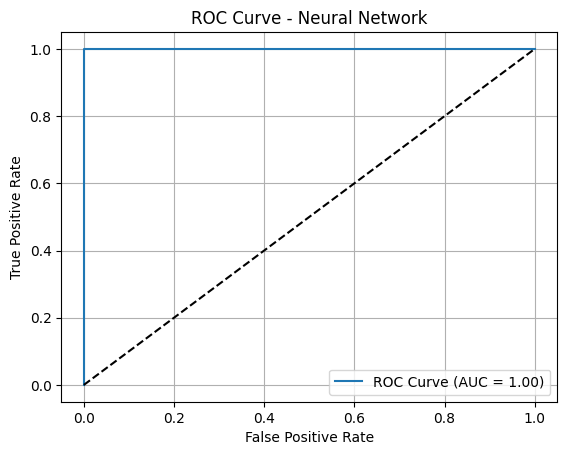

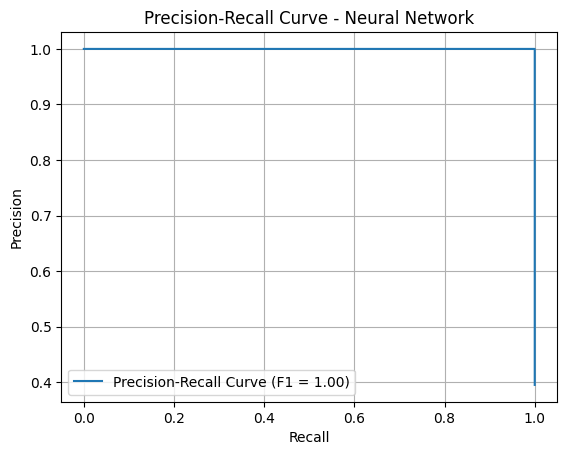

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------
# 1. Preparación de datos
# -------------------------------------
# Variables predictoras
X = heartAttackPrediction_India.drop(columns=['High_Clinical_Risk'])
X = pd.get_dummies(X, drop_first=True)  # Codificación one-hot

# Variable objetivo
y = heartAttackPrediction_India['High_Clinical_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------------
# 2. Red Neuronal
# -------------------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # salida binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=5, mode='max')

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -------------------------------------
# 3. Evaluación
# -------------------------------------
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------------
# 4. Curvas ROC y PR
# -------------------------------------
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall Curve (F1 = {f1_score(y_test, y_pred):.2f})")
plt.title("Precision-Recall Curve - Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

**CNN 1D para datos tabulares con SMOTE y regularización L2**

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - AUC: 0.8289 - accuracy: 0.7584 - loss: 0.7561 - val_AUC: 0.9714 - val_accuracy: 0.9613 - val_loss: 0.4141 - learning_rate: 0.0010
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.9575 - accuracy: 0.8865 - loss: 0.4590 - val_AUC: 0.9866 - val_accuracy: 0.9411 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.9780 - accuracy: 0.9127 - loss: 0.3795 - val_AUC: 0.9923 - val_accuracy: 0.9638 - val_loss: 0.2871 - learning_rate: 0.0010
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - AUC: 0.9836 - accuracy: 0.9306 - loss: 0.3431 - val_AUC: 0.9941 - val_accuracy: 0.9571 - val_loss: 0.2809 - learning_rate: 0.0010
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.9871 - accuracy: 0.9407 - loss: 0.3148 - val_AUC: 0.9968 - val_accuracy: 0.9700 - val_loss: 0.2459 - learning_rate: 0.0010
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - AUC: 0.9901 - 

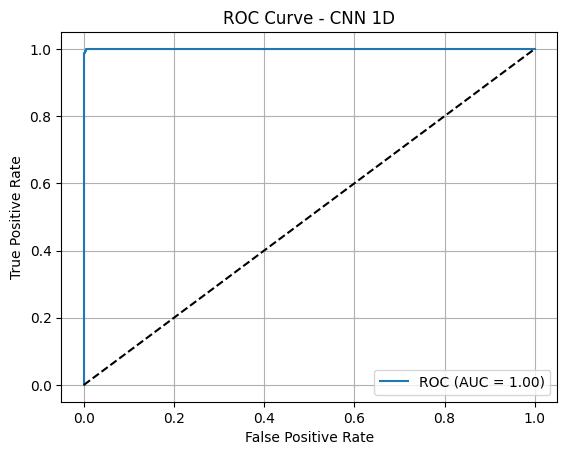

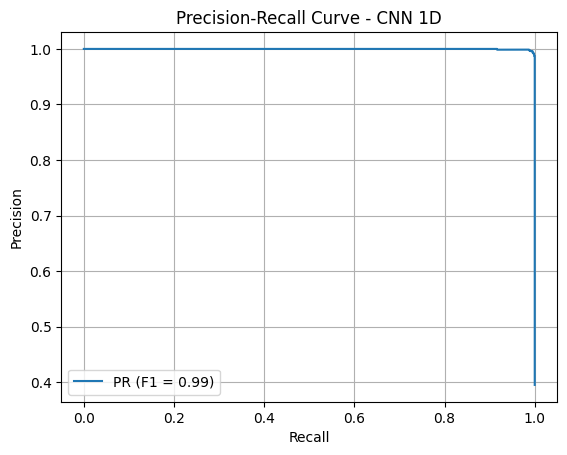

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# -------------------------------
# 1. Preparación de los datos
# -------------------------------
# Separar X e y
X = heartAttackPrediction_India.drop(columns=['High_Clinical_Risk'])
X = pd.get_dummies(X, drop_first=True)
y = heartAttackPrediction_India['High_Clinical_Risk']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convertir para CNN (añadir dimensión de canales)
X_train_res_cnn = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ----------------------
# 2. CNN 1D
# ----------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_res.shape[1], 1),
           kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=5, mode='max')

# Entrenamiento
history = model.fit(
    X_train_res_cnn, y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -------------------------------
# 3. Evaluación
# -------------------------------
y_pred_prob = model.predict(X_test_cnn).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------
# 4. Curvas
# -------------------------------
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - CNN 1D")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label=f"PR (F1 = {f1_score(y_test, y_pred):.2f})")
plt.title("Precision-Recall Curve - CNN 1D")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

**CNN 1D con Más capas convolucionales para capturar patrones jerárquicos. Regularización L2 en capas Conv1D y Dense. BatchNormalization después de convoluciones. Dropout para prevenir overfitting. GlobalAveragePooling1D en lugar de Flatten (mejor generalización). EarlyStopping + ReduceLROnPlateau como callbacks. SMOTE antes del entrenamiento para balancear clases.**

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - AUC: 0.7110 - accuracy: 0.6577 - loss: 0.9678 - val_AUC: 0.7907 - val_accuracy: 0.5052 - val_loss: 1.8238 - learning_rate: 0.0010
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - AUC: 0.7858 - accuracy: 0.7237 - loss: 0.8417 - val_AUC: 0.8174 - val_accuracy: 0.5052 - val_loss: 1.9665 - learning_rate: 0.0010
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - AUC: 0.8197 - accuracy: 0.7596 - loss: 0.7607 - val_AUC: 0.8262 - val_accuracy: 0.5052 - val_loss: 1.8340 - learning_rate: 0.0010
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 0.8316 - accuracy: 0.7669 - loss: 0.7039 - val_AUC: 0.8462 - val_accuracy: 0.5987 - val_loss: 0.9360 - learning_rate: 0.0010
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 0.8414 - accuracy: 0.7802 - loss: 0.6625 - val_AUC: 0.8611 - val_accuracy: 0.7903 - val_loss: 0.6071 - learning_rate: 0.0010
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 0.8513 -

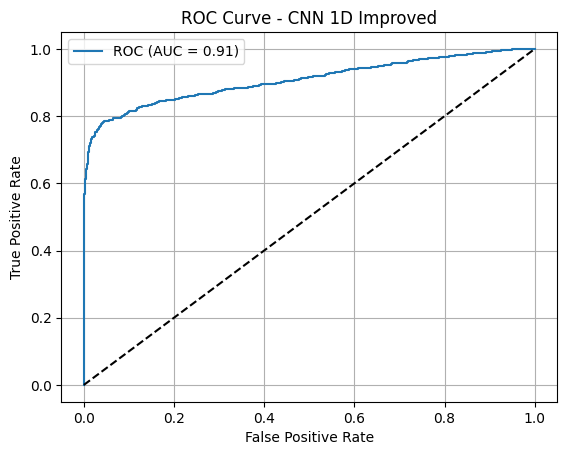

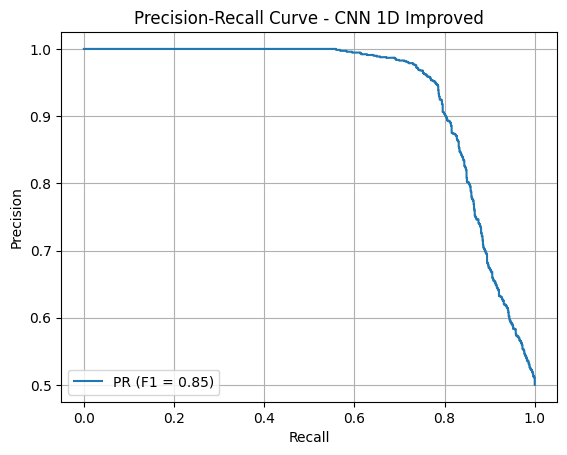

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ----------------------------
# PREPROCESAMIENTO
# ----------------------------
# Codificar variables categóricas
X = heartAttackPrediction_India.drop(['Heart_Attack_History', 'High_Clinical_Risk'], axis=1)
y = heartAttackPrediction_India['High_Clinical_Risk']

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# SMOTE para balancear
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Reshape para CNN 1D (samples, timesteps, features)
X_res_cnn = X_res.reshape(X_res.shape[0], X_res.shape[1], 1)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_res_cnn, y_res, test_size=0.2, random_state=42, stratify=y_res)

# ----------------------------
# MODELO CNN 1D MEJORADO
# ----------------------------
model = Sequential([
    Conv1D(64, 5, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    
    Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    
    Conv1D(256, 3, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    GlobalAveragePooling1D(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='AUC')]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# ----------------------------
# ENTRENAMIENTO
# ----------------------------
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ----------------------------
# EVALUACIÓN
# ----------------------------
y_pred_prob = model.predict(X_test).flatten()
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

print(f"AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------
# CURVAS
# -------------------------------
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - CNN 1D Improved")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label=f"PR (F1 = {f1_score(y_test, y_pred):.2f})")
plt.title("Precision-Recall Curve - CNN 1D Improved")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

**Modelo ResNet Tabular con conexiones residuales, regularización L2, EarlyStopping, ReduceLROnPlateau y evaluación detallada.**

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 0.6503 - accuracy: 0.6177 - loss: 1.4252 - val_AUC: 0.9678 - val_accuracy: 0.9044 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - AUC: 0.9172 - accuracy: 0.8456 - loss: 0.9156 - val_AUC: 0.9890 - val_accuracy: 0.9275 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.9627 - accuracy: 0.8970 - loss: 0.7595 - val_AUC: 0.9953 - val_accuracy: 0.9531 - val_loss: 0.6015 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.9829 - accuracy: 0.9312 - loss: 0.6410 - val_AUC: 0.9982 - val_accuracy: 0.9681 - val_loss: 0.5346 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.9849 - accuracy: 0.9366 - loss: 0.5908 - val_AUC: 0.9997 - val_accuracy: 0.9875 - val_loss: 0.4704 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.9931 - 

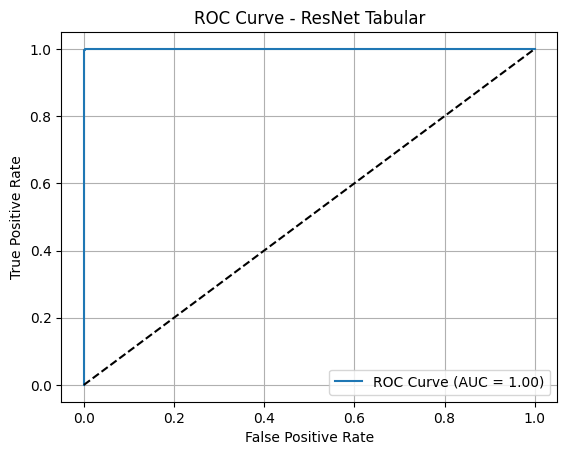

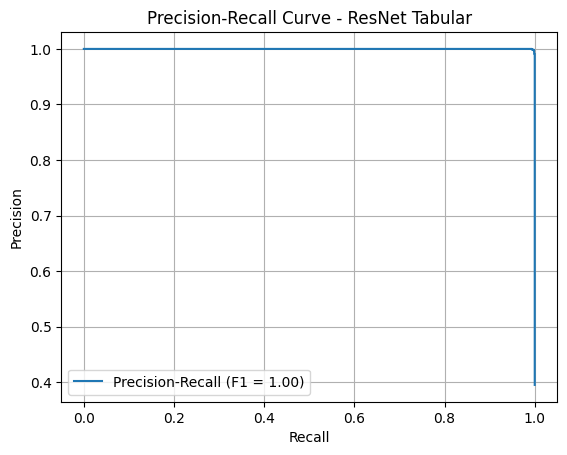

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# PREPROCESADO
# Separar X e y
X = heartAttackPrediction_India.drop(columns=['High_Clinical_Risk'])
X = pd.get_dummies(X, drop_first=True)
y = heartAttackPrediction_India['High_Clinical_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DEFINICIÓN DE BLOQUE RESIDUAL
def residual_block(x, units, l2_lambda=0.001):
    shortcut = x
    x = Dense(units, kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(units, kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# ARQUITECTURA RESNET TABULAR
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = residual_block(x, 128)
x = Dropout(0.3)(x)
x = residual_block(x, 128)
x = Dropout(0.3)(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])

# ENTRENAMIENTO
early_stop = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=5, mode='max')

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# EVALUACIÓN
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# CURVAS ROC Y PR
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - ResNet Tabular")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall (F1 = {f1_score(y_test, y_pred):.2f})")
plt.title("Precision-Recall Curve - ResNet Tabular")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

---
---
---
---

## **TRANSFORMERS**

**TabTransformer con PyTorch y CategoryEmbedding**

Epoch 1 - Loss: 0.2729
Epoch 2 - Loss: 0.4058
Epoch 3 - Loss: 0.0473
Epoch 4 - Loss: 0.0023
Epoch 5 - Loss: 0.1284
Epoch 6 - Loss: 0.1052
Epoch 7 - Loss: 0.0125
Epoch 8 - Loss: 0.1201
Epoch 9 - Loss: 0.0003
Epoch 10 - Loss: 0.0001
Epoch 11 - Loss: 0.0553
Epoch 12 - Loss: 0.0013
Epoch 13 - Loss: 0.0023
Epoch 14 - Loss: 0.0005
Epoch 15 - Loss: 0.0008
Epoch 16 - Loss: 0.0011
Epoch 17 - Loss: 0.0451
Epoch 18 - Loss: 0.0927
Epoch 19 - Loss: 0.0562
Epoch 20 - Loss: 0.0598
AUC: 0.9996317606444189
Accuracy: 0.981
F1 Score: 0.9753566796368353
Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1210
         1.0       1.00      0.95      0.98       790

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1210    0]
 [  38  752]]


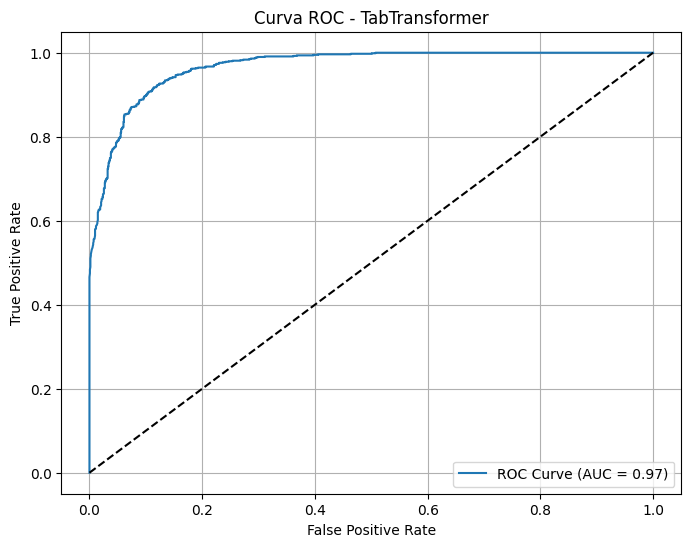

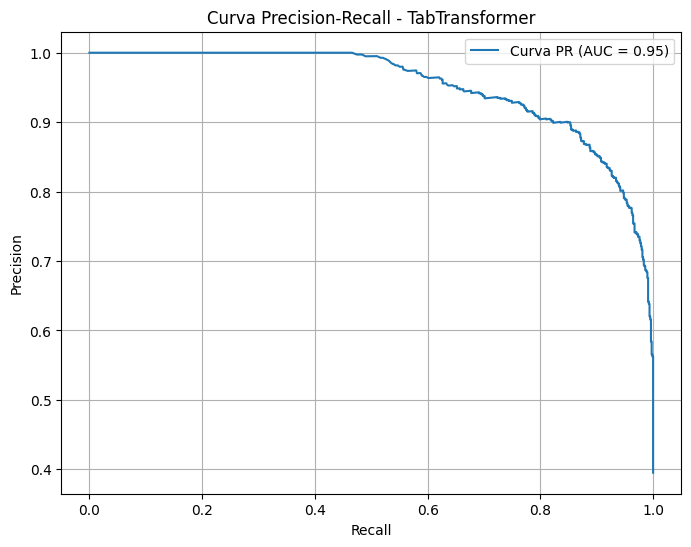

In [39]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, f1_score, accuracy_score, confusion_matrix
from category_encoders import OrdinalEncoder
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# -----------------------------
# 1. Preprocesamiento
# -----------------------------
# Separar variables
X = heartAttackPrediction_India.drop(columns=['High_Clinical_Risk'])
y = heartAttackPrediction_India['High_Clinical_Risk']

# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Codificación ordinal para categóricas
encoder = OrdinalEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X)

# Escalado para numéricas
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# -----------------------------
# 2. Dataset para PyTorch
# -----------------------------
class TabDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TabDataset(X_train, y_train)
test_dataset = TabDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 3. Modelo TabTransformer 
# -----------------------------
class TabTransformer(nn.Module):
    def __init__(self, input_dim):
        super(TabTransformer, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=4, dropout=0.2)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = x.unsqueeze(1)  # [batch, seq=1, features]
        x = self.transformer_encoder(x)
        x = x.squeeze(1)
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = TabTransformer(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 4. Entrenamiento
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(20):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

# -----------------------------
# 5. Evaluación
# -----------------------------
model.eval()
y_pred_probs = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).squeeze()
        y_pred_probs.extend(outputs.cpu().numpy())
        y_true.extend(y_batch.numpy())

y_pred = np.array(y_pred_probs) > 0.5

print("AUC:", roc_auc_score(y_true, y_pred_probs))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 6. Curvas ROC y PR
# -----------------------------
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - TabTransformer")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Curva PR (AUC = {pr_auc:.2f})")
plt.title("Curva Precision-Recall - TabTransformer")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

**TabTransformer con Regularización, Embeddings automáticos para variables categóricas, y Callbacks (early stopping y reducción de LR).**

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - AUC: 0.9298 - accuracy: 0.8547 - loss: 0.3147 - val_AUC: 0.9698 - val_accuracy: 0.9006 - val_loss: 0.2200 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - AUC: 0.9753 - accuracy: 0.9139 - loss: 0.1942 - val_AUC: 0.9758 - val_accuracy: 0.9169 - val_loss: 0.1943 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - AUC: 0.9827 - accuracy: 0.9234 - loss: 0.1640 - val_AUC: 0.9720 - val_accuracy: 0.9013 - val_loss: 0.2354 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - AUC: 0.9805 - accuracy: 0.9219 - loss: 0.1748 - val_AUC: 0.9739 - val_accuracy: 0.9131 - val_loss: 0.2043 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - AUC: 0.9864 - accuracy: 0.9336 - loss: 0.1455 - val_AUC: 0.9725 - val_accuracy: 0.9100 - val_loss: 0.2267 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - AUC: 0.9885 -

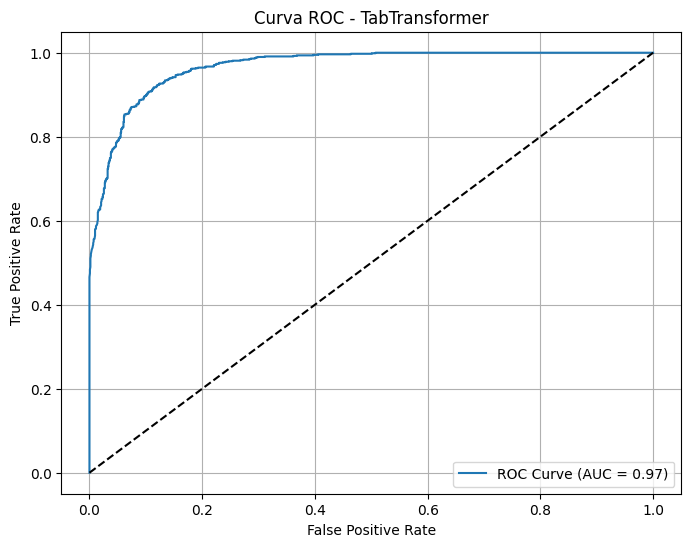

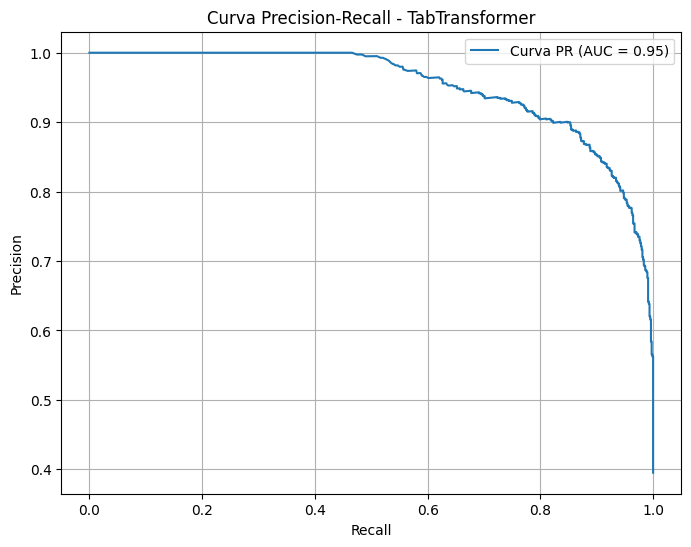

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from category_encoders import OrdinalEncoder
import tensorflow as tf
from tensorflow.keras import layers, Model

# -----------------------------
# 1. PREPROCESAMIENTO
# -----------------------------
X = heartAttackPrediction_India.drop(columns=['High_Clinical_Risk'])
y = heartAttackPrediction_India['High_Clinical_Risk']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Split antes de codificar
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), test_size=0.2, stratify=y, random_state=42
)

# Convertir a category para que los índices empiecen en 0
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Codificar con .cat.codes
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in cat_cols:
    X_train_encoded[col] = X_train[col].cat.codes
    X_test_encoded[col] = X_test[col].cat.codes

# Escalado de columnas numéricas
scaler = StandardScaler()
X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Variables para el modelo
X_train_num = X_train_encoded[num_cols].values.astype("float32")
X_test_num = X_test_encoded[num_cols].values.astype("float32")
X_train_cat = X_train_encoded[cat_cols].values.astype("int32")
X_test_cat = X_test_encoded[cat_cols].values.astype("int32")
num_categories = [X_train[col].nunique() for col in cat_cols]


# -----------------------------
# 2. DEFINICIÓN DEL MODELO
# -----------------------------
class TabTransformer(Model):
    def __init__(self, num_categories, d_model=64, num_heads=4, ff_dim=128, num_transformer_blocks=2):
        super().__init__()
        self.cat_embedding_layers = [
            layers.Embedding(input_dim=cat_size, output_dim=d_model) for cat_size in num_categories
        ]
        self.numeric_proj = layers.Dense(d_model)
        self.transformer_blocks = []

        for _ in range(num_transformer_blocks):
            mha = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
            norm1 = layers.LayerNormalization()
            ffn = tf.keras.Sequential([
                layers.Dense(ff_dim, activation='relu'),
                layers.Dense(d_model)
            ])
            norm2 = layers.LayerNormalization()
            self.transformer_blocks.append((mha, norm1, ffn, norm2))

        self.flatten = layers.Flatten()
        self.dropout = layers.Dropout(0.3)
        self.output_layer = layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(1e-4))

    def call(self, inputs):
        x_num, x_cat = inputs
        cat_embeds = [emb(x_cat[:, i]) for i, emb in enumerate(self.cat_embedding_layers)]
        cat_stack = tf.stack(cat_embeds, axis=1)
        num_proj = tf.expand_dims(self.numeric_proj(x_num), 1)
        x = tf.concat([cat_stack, num_proj], axis=1)

        for mha, norm1, ffn, norm2 in self.transformer_blocks:
            attn_output = mha(query=x, value=x, key=x)
            x = norm1(x + attn_output)
            x = norm2(x + ffn(x))

        x = self.flatten(x)
        x = self.dropout(x)
        return self.output_layer(x)

# -----------------------------
# 3. COMPILACIÓN Y ENTRENAMIENTO
# -----------------------------
model = TabTransformer(num_categories)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=5, mode='max')

history = model.fit(
    [X_train_num, X_train_cat], y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -----------------------------
# 4. EVALUACIÓN
# -----------------------------
y_pred_prob = model.predict([X_test_num, X_test_cat]).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 5. CURVAS ROC y PR
# -----------------------------
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - TabTransformer")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Curva PR (AUC = {pr_auc:.2f})")
plt.title("Curva Precision-Recall - TabTransformer")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

**FT Transformer**

AUC: 0.9747159744743172
Accuracy: 0.9125
F1 Score: 0.8884639898024219
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      1210
         1.0       0.89      0.88      0.89       790

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Confusion Matrix:
 [[1128   82]
 [  93  697]]


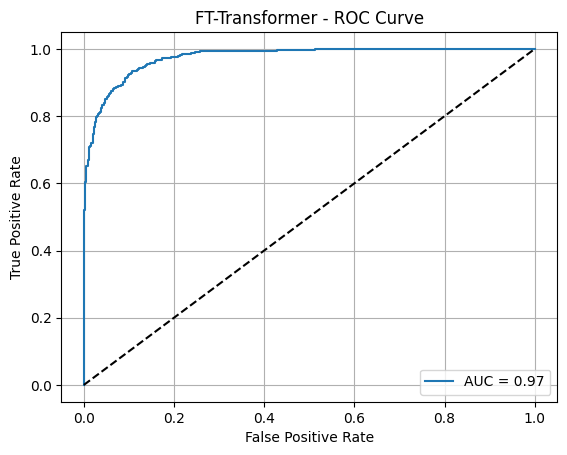

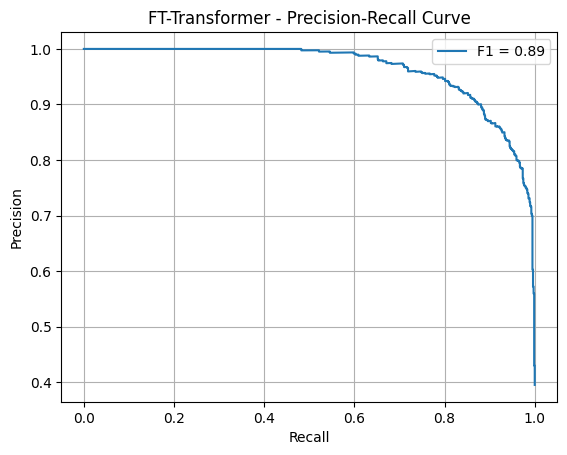

In [36]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from torch import nn
from torch.utils.data import Dataset, DataLoader

# ---------------------------------------
# 1. Preprocesamiento del dataset
# ---------------------------------------
df = heartAttackPrediction_India.copy()
target = "High_Clinical_Risk"

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [col for col in df.select_dtypes(include=["int64", "float64"]).columns if col != target]

# Codificación y escalado
encoder = OrdinalEncoder(cols=cat_cols)
df[cat_cols + num_cols] = encoder.fit_transform(df[cat_cols + num_cols])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Asegurar valores válidos para embeddings
for col in cat_cols:
    df[col] = df[col].clip(0, df[col].max() - 1)

# División de datos
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Datos numéricos y categóricos
X_train_cat = X_train[cat_cols].values.astype("int64")
X_train_num = X_train[num_cols].values.astype("float32")
X_test_cat = X_test[cat_cols].values.astype("int64")
X_test_num = X_test[num_cols].values.astype("float32")
y_train = y_train.values.astype("float32")
y_test = y_test.values.astype("float32")

num_categories = [int(df[col].nunique()) for col in cat_cols]

# ---------------------------------------
# 2. Dataset PyTorch
# ---------------------------------------
class TabularDataset(Dataset):
    def __init__(self, num, cat, labels):
        self.num = torch.tensor(num)
        self.cat = torch.tensor(cat)
        self.labels = torch.tensor(labels).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.num[idx], self.cat[idx], self.labels[idx]

train_dataset = TabularDataset(X_train_num, X_train_cat, y_train)
test_dataset = TabularDataset(X_test_num, X_test_cat, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# ---------------------------------------
# 3. FT-Transformer
# ---------------------------------------
class FTTransformer(nn.Module):
    def __init__(self, num_categories, num_numerical, dim=32, num_heads=2, num_layers=1, dropout=0.1):
        super().__init__()
        self.cat_embed = nn.ModuleList([
            nn.Embedding(cat_size + 1, dim) for cat_size in num_categories
        ])
        self.num_proj = nn.Linear(num_numerical, dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=num_heads, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(dim * (len(num_categories) + 1), 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x_num, x_cat):
        cat_emb = torch.stack([emb(x_cat[:, i]) for i, emb in enumerate(self.cat_embed)], dim=1)
        num_proj = self.num_proj(x_num).unsqueeze(1)
        x = torch.cat([cat_emb, num_proj], dim=1)
        x = self.transformer(x)
        return self.head(x)

# ---------------------------------------
# 4. Entrenamiento
# ---------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FTTransformer(num_categories=num_categories, num_numerical=X_train_num.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

for epoch in range(10):
    model.train()
    for x_num, x_cat, y in train_loader:
        x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x_num, x_cat)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

# ---------------------------------------
# 5. Evaluación y Gráficos
# ---------------------------------------
model.eval()
probs, preds = [], []
with torch.no_grad():
    for x_num, x_cat, _ in test_loader:
        x_num, x_cat = x_num.to(device), x_cat.to(device)
        out = model(x_num, x_cat).cpu().numpy().ravel()
        probs.extend(out)
        preds.extend((out > 0.5).astype(int))

print("AUC:", roc_auc_score(y_test, probs))
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

# ROC
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FT-Transformer - ROC Curve")
plt.grid(True)
plt.legend()
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, probs)
plt.figure()
plt.plot(recall, precision, label=f"F1 = {f1_score(y_test, preds):.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("FT-Transformer - Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()

**SAINT**

Epoch 1: Loss = 0.2916
Epoch 2: Loss = 0.2042
Epoch 3: Loss = 0.1951
Epoch 4: Loss = 0.1734
Epoch 5: Loss = 0.1656
Epoch 6: Loss = 0.1564
Epoch 7: Loss = 0.1466
Epoch 8: Loss = 0.1432
Epoch 9: Loss = 0.1325
Epoch 10: Loss = 0.1255
Epoch 11: Loss = 0.1137
Epoch 12: Loss = 0.1111
Epoch 13: Loss = 0.1031
Epoch 14: Loss = 0.1034
Epoch 15: Loss = 0.0958
Epoch 16: Loss = 0.0907
Epoch 17: Loss = 0.0918
Epoch 18: Loss = 0.0778
Epoch 19: Loss = 0.0800
Epoch 20: Loss = 0.0654
Epoch 21: Loss = 0.0656
Epoch 22: Loss = 0.0631
Epoch 23: Loss = 0.0574
Epoch 24: Loss = 0.0578
Epoch 25: Loss = 0.0566
Epoch 26: Loss = 0.0515
Epoch 27: Loss = 0.0491
Epoch 28: Loss = 0.0468
Epoch 29: Loss = 0.0445
Epoch 30: Loss = 0.0384
AUC: 0.9677209959200753
Accuracy: 0.9065
F1 Score: 0.8824638592080453
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1210
         1.0       0.88      0.89      0.88       790

    accuracy                   

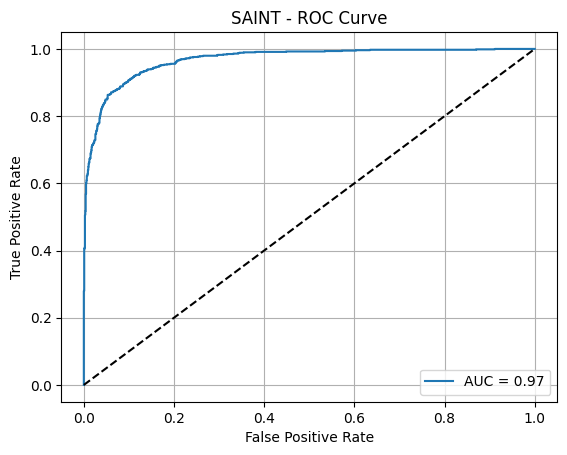

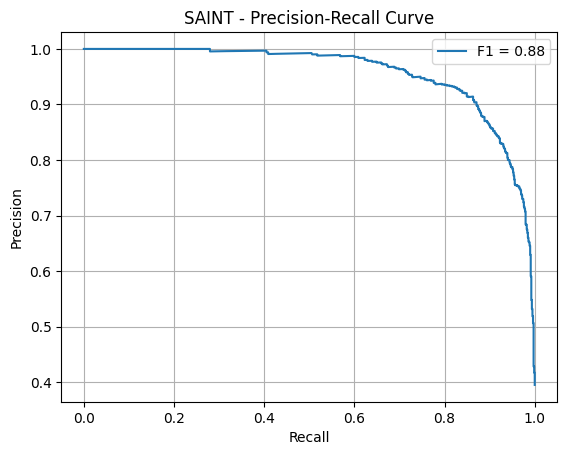

In [37]:
import torch
import pandas as pd
import numpy as np
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn

# -------------------------
# 1. Preprocesamiento
# -------------------------
df = heartAttackPrediction_India.copy()
target = "High_Clinical_Risk"

# Columnas categóricas y numéricas
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [col for col in df.select_dtypes(include=["int64", "float64"]).columns if col != target]

# Codificación y escalado
encoder = OrdinalEncoder(cols=cat_cols)
df[cat_cols + num_cols] = encoder.fit_transform(df[cat_cols + num_cols])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separación
X = df.drop(columns=[target])
y = df[target].values.astype("float32") 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Conversión a arrays NumPy
X_train_cat = X_train[cat_cols].values.astype("int64")
X_train_num = X_train[num_cols].values.astype("float32")
X_test_cat = X_test[cat_cols].values.astype("int64")
X_test_num = X_test[num_cols].values.astype("float32")

num_categories = [int(df[col].nunique()) for col in cat_cols]

# -------------------------
# 2. Dataset PyTorch
# -------------------------
class TabularDataset(Dataset):
    def __init__(self, num, cat, labels):
        self.num = torch.tensor(num)
        self.cat = torch.tensor(cat)
        self.labels = torch.tensor(labels).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.num[idx], self.cat[idx], self.labels[idx]

train_dataset = TabularDataset(X_train_num, X_train_cat, y_train)
test_dataset = TabularDataset(X_test_num, X_test_cat, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# -------------------------
# 3. Modelo SAINT
# -------------------------
class SAINT(nn.Module):
    def __init__(self, num_categories, num_numerical, dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.cat_embed = nn.ModuleList([
            nn.Embedding(cat_size + 1, dim) for cat_size in num_categories
        ])
        self.num_proj = nn.Linear(num_numerical, dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=num_heads, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(dim * (len(num_categories) + 1), 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x_num, x_cat):
        cat_emb = torch.stack([emb(x_cat[:, i]) for i, emb in enumerate(self.cat_embed)], dim=1)
        num_proj = self.num_proj(x_num).unsqueeze(1)
        x = torch.cat([cat_emb, num_proj], dim=1)
        x = self.transformer(x)
        return self.head(x)

# -------------------------
# 4. Entrenamiento
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SAINT(num_categories, X_train_num.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

for epoch in range(30):
    model.train()
    running_loss = 0
    for x_num, x_cat, y in train_loader:
        x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x_num, x_cat)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}")

# -------------------------
# 5. Evaluación
# -------------------------
model.eval()
probs, preds = [], []
with torch.no_grad():
    for x_num, x_cat, _ in test_loader:
        x_num, x_cat = x_num.to(device), x_cat.to(device)
        out = model(x_num, x_cat).cpu().numpy().ravel()
        probs.extend(out)
        preds.extend((out > 0.5).astype(int))

# -------------------------
# 6. Métricas
# -------------------------
print("AUC:", roc_auc_score(y_test, probs))
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

# ROC
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SAINT - ROC Curve")
plt.grid(True)
plt.legend()
plt.show()

# PR
precision, recall, _ = precision_recall_curve(y_test, probs)
plt.figure()
plt.plot(recall, precision, label=f"F1 = {f1_score(y_test, preds):.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SAINT - Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()